In [1]:
import pandas as pd

from tqdm import tqdm
import numpy as np

In [2]:
!pwd

/12tb_dsk1/danish/Analysis_GRN_ROSMAP/GRN_ROSMAP_20_May_2024_Plaques_and_Clinical/community_detection_Tf


In [3]:
AD_filtered_data = pd.read_csv('../../GRN_ROSMAP_20_May_2024_Plaques_and_Clinical/data_output/communtiy_detection/AD_filtered_data.csv', index_col=0)

In [4]:
AD_filtered_data

02_120405  292_120430  630_120524  \
ENSG00000001167_ENSG00000000460   5.985459    5.934636    5.161099   
ENSG00000001167_ENSG00000001167   5.350591    5.062648    4.557060   
ENSG00000001167_ENSG00000003056   6.520921    6.919805    6.648899   
ENSG00000001167_ENSG00000004799   5.590399    5.827155    6.164714   
ENSG00000001167_ENSG00000006007   5.920805    6.301645    6.251546   
...                                    ...         ...         ...   
ENSG00000278129_ENSG00000273367  16.430995   16.227798   16.649548   
ENSG00000278129_ENSG00000273674  14.047174   14.266015   14.594015   
ENSG00000278129_ENSG00000274561  13.946036   14.540649   14.198020   
ENSG00000278129_ENSG00000278576  15.331664   14.663971   14.781036   
ENSG00000278129_ENSG00000280088  14.668447   14.160469   13.794935   

                                 706_120605  550_120517  469_120514  \
ENSG00000001167_ENSG00000000460    5.737668    5.895314    6.073197   
ENSG00000001167_ENSG00000001167    5.509585    5.661389    5.574527   
ENSG00000001167_ENSG00000003056    6.454927    6.559185    6.503796   
ENSG00000001167_ENSG00000004799    6.254959    5.894357    5.778266   
ENSG00000001167_ENSG00000006007    5.616704    6.151455    6.220123   
...                                     ...         ...         ...   
ENSG00000278129_ENSG00000273367   16.206657   16.226697   16.431712   
ENSG00000278129_ENSG00000273674   14.457960   14.535199   14.402175   
ENSG00000278129_ENSG00000274561   13.919722   14.288854   14.440560   
ENSG00000278129_ENSG00000278576   14.598280   14.698348   15.046257   
ENSG00000278129_ENSG00000280088   14.101097   14.259367   14.255767   

                                 628_120524  444_120507  497_120515  \
ENSG00000001167_ENSG00000000460    5.395301    5.631331    5.814801   
ENSG00000001167_ENSG00000001167    5.484929    5.489274    4.761987   
ENSG00000001167_ENSG00000003056    6.379102    6.603543    6.476422   
ENSG00000001167_ENSG00000004799    5.868804    6.085176    5.290961   
ENSG00000001167_ENSG00000006007    5.795967    6.516315    6.220755   
...                                     ...         ...         ...   
ENSG00000278129_ENSG00000273367   16.416674   16.592054   16.533721   
ENSG00000278129_ENSG00000273674   14.757733   14.540036   14.562084   
ENSG00000278129_ENSG00000274561   14.425756   14.400320   15.002753   
ENSG00000278129_ENSG00000278576   14.696814   14.287603   14.996469   
ENSG00000278129_ENSG00000280088   14.276844   14.359741   14.432653   

                                 554_120517  ...  309_120430  173_120424  \
ENSG00000001167_ENSG00000000460    5.883712  ...    7.102765    5.814896   
ENSG00000001167_ENSG00000001167    5.630748  ...    6.407937    5.729522   
ENSG00000001167_ENSG00000003056    6.578095  ...    7.366880    6.702557   
ENSG00000001167_ENSG00000004799    5.889637  ...    6.324199    5.487434   
ENSG00000001167_ENSG00000006007    6.453902  ...    7.129080    6.560771   
...                                     ...  ...         ...         ...   
ENSG00000278129_ENSG00000273367   16.374709  ...   16.356372   16.365761   
ENSG00000278129_ENSG00000273674   14.438379  ...   14.702641   14.766647   
ENSG00000278129_ENSG00000274561   14.445982  ...   14.427226   14.395543   
ENSG00000278129_ENSG00000278576   14.667327  ...   14.741588   14.632009   
ENSG00000278129_ENSG00000280088   14.305977  ...   14.470541   14.181381   

                                 607_120523  434_120507  942_131101  \
ENSG00000001167_ENSG00000000460    6.601987    6.131108    5.961877   
ENSG00000001167_ENSG00000001167    5.642024    5.551864    5.472029   
ENSG00000001167_ENSG00000003056    6.867758    6.609404    6.572440   
ENSG00000001167_ENSG00000004799    5.652827    5.558739    5.817846   
ENSG00000001167_ENSG00000006007    6.918467    6.261928    6.224332   
...                                     ...         ...         ...   
ENSG00000278129_ENSG00000273367   16.381008   16.066534   16.113293   
ENSG0

In [5]:
AD_filtered_data.columns

Index(['02_120405', '292_120430', '630_120524', '706_120605', '550_120517',
       '469_120514', '628_120524', '444_120507', '497_120515', '554_120517',
       '708_120531', '721_120531', '427_120507', '531_120516', '420_120507',
       '104_120418', '459_120514', '606_120523', '28_120411', '12_120410',
       '193_120424', '695_120605', '196_120424', '237_120426', '243_120426',
       '214_120425', '520_120515', '228_120425', '310_120430', '689_120604',
       '407_120503', '318_120501', '704_120605', '76_120417', '646_120524',
       '635_120524', '429_120507', '604_120523', '553_120517', '511_120515',
       '663_120530', '545_120516', '482_120514', '929_131031', '568_120521',
       '326_120501', '77_120417', '232_120425', '286_120430', '602_120523',
       '202_120424', '181_120424', '321_120501', '364_120502', '24_120411',
       '591_120522', '952_131107', '486_120515', '624_120524', '70_120417',
       '715_120531', '705_120605', '384_120503', '703_120605', '56_120417',
       

In [6]:
import os

In [7]:
l = os.listdir('../../GRN_ROSMAP_20_May_2024_Plaques_and_Clinical/data_output/tf_matrix_similarity/')


In [8]:
l = [i.split('.')[0] for i in l]

In [9]:
set(AD_filtered_data.columns)- set(l)

set()

In [10]:
data = pd.read_csv('../../GRN_ROSMAP_20_May_2024_Plaques_and_Clinical/data_output/tf_matrix_similarity/12_120410.csv', index_col=0)

In [11]:
(data==10.0).sum()

reg_ENSG00000001167      6
reg_ENSG00000004848      2
reg_ENSG00000005513      2
reg_ENSG00000006047      3
reg_ENSG00000006194     80
                      ... 
reg_ENSG00000267508      1
reg_ENSG00000267680    102
reg_ENSG00000272602      1
reg_ENSG00000275111     80
reg_ENSG00000278129      1
Length: 662, dtype: int64

In [12]:
data.sum().sum()

445900.0

In [13]:
data = pd.read_csv('../../GRN_ROSMAP_20_May_2024_Plaques_and_Clinical/data_output/tf_matrix_similarity/02_120405.csv', index_col=0)
data

reg_ENSG00000001167  reg_ENSG00000004848  \
reg_ENSG00000001167                 10.0                  0.0   
reg_ENSG00000004848                  0.0                 10.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006194                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  1.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000005513  reg_ENSG00000006047  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                 10.0                  0.0   
reg_ENSG00000006047                  0.0                 10.0   
reg_ENSG00000006194                  0.0                  2.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  9.0                  0.0   
reg_ENSG00000272602                  0.0                  2.0   
reg_ENSG00000275111                  0.0                  2.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000006194  reg_ENSG00000006468  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  2.0                  0.0   
reg_ENSG00000006194                 10.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  2.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  6.0                  0.0   
reg_ENSG00000275111                 10.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000007372  reg_ENSG00000007866  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  1.0   
reg_ENSG00000006047                  1.0                  0.0   
reg_ENSG00000006194                  3.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  1.0                  1.0   
reg_ENSG00000267680                  0.0                  1.0   
reg_ENSG00000272602                  3.0                  0.0   
reg_ENSG00000275111                  3.0                  0.0   
reg_ENSG00000278129                  2.0                  1.0   

                     reg_ENSG00000008441  reg_ENSG00000009709  ...  \
reg_ENSG00000001167                  0.0                  0.0  ...   
reg_ENSG00000004848                  0.0                  1.0  ...   
reg_ENSG00000005513                  0.0                  0.0  ...   
reg_ENSG00000006047                  0.0                  1.0  ...   
reg_ENSG00000006194                  0.0                  5.0  ...   
...                                  ...                  ...  ...   
reg_ENSG00000267508                  0.0                  2.0  ...   
reg_ENSG00000267680                  0.0                  0.0  ...   
reg_ENSG00000272602                  0.0                  6.0  ...   
reg_ENSG00000275111                  0.0                  5.0  ...   
reg_ENSG00000278129                  0.0                  0.0  ...   

                     reg_ENSG00000256294  reg_ENSG000002

In [15]:
data = np.round(data/14)


In [16]:
data

reg_ENSG00000001167  reg_ENSG00000004848  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006194                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000005513  reg_ENSG00000006047  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006194                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000006194  reg_ENSG00000006468  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006194                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000007372  reg_ENSG00000007866  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006194                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000008441  reg_ENSG00000009709  ...  \
reg_ENSG00000001167                  0.0                  0.0  ...   
reg_ENSG00000004848                  0.0                  0.0  ...   
reg_ENSG00000005513                  0.0                  0.0  ...   
reg_ENSG00000006047                  0.0                  0.0  ...   
reg_ENSG00000006194                  0.0                  0.0  ...   
...                                  ...                  ...  ...   
reg_ENSG00000267508                  0.0                  0.0  ...   
reg_ENSG00000267680                  0.0                  0.0  ...   
reg_ENSG00000272602                  0.0                  0.0  ...   
reg_ENSG00000275111                  0.0                  0.0  ...   
reg_ENSG00000278129                  0.0                  0.0  ...   

                     reg_ENSG00000256294  reg_ENSG000002

In [17]:
(data == 1.0).sum().sum()

0

In [18]:
rows_col= os.listdir('../../GRN_ROSMAP_20_May_2024_Plaques_and_Clinical/data_output/tf_matrix_similarity/')

In [19]:
rows = cols = len(rows_col) # number of rowsprint
    

tf_matrix_2 = pd.DataFrame(np.zeros((rows, cols)), columns=[f'{i}' for i in rows_col])
tf_matrix_1 = pd.DataFrame(np.zeros((rows, cols)), columns=[f'{i}' for i in rows_col])

In [20]:
tf_matrix_2.index  = rows_col
tf_matrix_1.index  = rows_col

In [21]:
tf_matrix_2.columns

Index(['624_120524.csv', '545_120516.csv', '254_120426.csv', '289_120430.csv',
       '434_120507.csv', '482_120514.csv', '637_120524.csv', '554_120517.csv',
       '24_120411.csv', '708_120531.csv', '318_120501.csv', '34_120416.csv',
       '364_120502.csv', '649_120529.csv', '486_120515.csv', '23_120411.csv',
       '711_120531.csv', '196_120424.csv', '232_120425.csv', '309_120430.csv',
       '553_120517.csv', '77_120417.csv', '424_120507.csv', '28_120411.csv',
       '607_120523.csv', '703_120605.csv', '704_120605.csv', '197_120424.csv',
       '630_120524.csv', '173_120424.csv', '721_120531.csv', '497_120515.csv',
       '706_120605.csv', '444_120507.csv', '494_120515.csv', '229_120425.csv',
       '407_120503.csv', '181_120424.csv', '70_120417.csv', '715_120531.csv',
       '420_120507.csv', '427_120507.csv', '214_120425.csv', '104_120418.csv',
       '310_120430.csv', '695_120605.csv', '363_120502.csv', '202_120424.csv',
       '286_120430.csv', '689_120604.csv', '617_120524.csv

In [22]:
for i in tqdm(os.listdir('../../GRN_ROSMAP_20_May_2024_Plaques_and_Clinical/data_output/tf_matrix_similarity/')):
    if '.csv' not in i:
        continue
    if '.ipynb_checkpoints' in i:
        continue
    for j in os.listdir('../../GRN_ROSMAP_20_May_2024_Plaques_and_Clinical/data_output/tf_matrix_similarity/'):
        if '.csv' not in j:
            continue
        
        #print(i,j)

        data_1 = pd.read_csv('../../GRN_ROSMAP_20_May_2024_Plaques_and_Clinical/data_output/tf_matrix_similarity/'+ i,index_col=0)
        #print(data_1)
        data_1 = np.round(data_1/14)  #14 make sure 70 percent

        data_2 = pd.read_csv('../../GRN_ROSMAP_20_May_2024_Plaques_and_Clinical/data_output/tf_matrix_similarity/'+ j,index_col=0)
        data_2 = np.round(data_2/14)
        norm = max(data_1.sum().sum(),data_2.sum().sum())

        data = data_1+data_2
        number_1 = (data == 1.0).sum().sum()
        number_2 = (data == 2.0).sum().sum()
        #print(norm)
        tf_matrix_1.loc[i,j] = number_1/norm
        tf_matrix_2.loc[i,j] = number_2/norm

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [03:59<00:00,  2.55s/it]


In [23]:
tf_matrix_2.columns

Index(['624_120524.csv', '545_120516.csv', '254_120426.csv', '289_120430.csv',
       '434_120507.csv', '482_120514.csv', '637_120524.csv', '554_120517.csv',
       '24_120411.csv', '708_120531.csv', '318_120501.csv', '34_120416.csv',
       '364_120502.csv', '649_120529.csv', '486_120515.csv', '23_120411.csv',
       '711_120531.csv', '196_120424.csv', '232_120425.csv', '309_120430.csv',
       '553_120517.csv', '77_120417.csv', '424_120507.csv', '28_120411.csv',
       '607_120523.csv', '703_120605.csv', '704_120605.csv', '197_120424.csv',
       '630_120524.csv', '173_120424.csv', '721_120531.csv', '497_120515.csv',
       '706_120605.csv', '444_120507.csv', '494_120515.csv', '229_120425.csv',
       '407_120503.csv', '181_120424.csv', '70_120417.csv', '715_120531.csv',
       '420_120507.csv', '427_120507.csv', '214_120425.csv', '104_120418.csv',
       '310_120430.csv', '695_120605.csv', '363_120502.csv', '202_120424.csv',
       '286_120430.csv', '689_120604.csv', '617_120524.csv

In [24]:
data[data == 2].sum()

reg_ENSG00000001167     10.0
reg_ENSG00000004848     12.0
reg_ENSG00000005513      4.0
reg_ENSG00000006047      8.0
reg_ENSG00000006194    190.0
                       ...  
reg_ENSG00000267508      4.0
reg_ENSG00000267680    226.0
reg_ENSG00000272602      2.0
reg_ENSG00000275111    194.0
reg_ENSG00000278129      2.0
Length: 662, dtype: float64

In [25]:
(data == 2.0).sum()

reg_ENSG00000001167      5
reg_ENSG00000004848      6
reg_ENSG00000005513      2
reg_ENSG00000006047      4
reg_ENSG00000006194     95
                      ... 
reg_ENSG00000267508      2
reg_ENSG00000267680    113
reg_ENSG00000272602      1
reg_ENSG00000275111     97
reg_ENSG00000278129      1
Length: 662, dtype: int64

In [26]:
tf_matrix_2

624_120524.csv  545_120516.csv  254_120426.csv  \
624_120524.csv        1.000000        0.843529        0.803186   
545_120516.csv        0.843529        1.000000        0.724444   
254_120426.csv        0.803186        0.724444        1.000000   
289_120430.csv        0.832771        0.762418        0.833386   
434_120507.csv        0.871037        0.873464        0.781509   
...                        ...             ...             ...   
635_120524.csv        0.860153        0.790327        0.845276   
531_120516.csv        0.871132        0.862745        0.760320   
326_120501.csv        0.869109        0.811765        0.806027   
323_120501.csv        0.848334        0.768693        0.843111   
304_120430.csv        0.868815        0.789216        0.840977   

                289_120430.csv  434_120507.csv  482_120514.csv  \
624_120524.csv        0.832771        0.871037        0.882224   
545_120516.csv        0.762418        0.873464        0.827320   
254_120426.csv        0.833386        0.781509        0.800015   
289_120430.csv        1.000000        0.820665        0.831936   
434_120507.csv        0.820665        1.000000        0.861841   
...                        ...             ...             ...   
635_120524.csv        0.905669        0.857242        0.855550   
531_120516.csv        0.823833        0.918066        0.872194   
326_120501.csv        0.867959        0.863374        0.847387   
323_120501.csv        0.848791        0.831882        0.828220   
304_120430.csv        0.882048        0.844353        0.820348   

                637_120524.csv  554_120517.csv  24_120411.csv  708_120531.csv  \
624_120524.csv        0.854206        0.856923       0.882616        0.847602   
545_120516.csv        0.825948        0.797974       0.830131        0.876797   
254_120426.csv        0.821227        0.816858       0.800238        0.757592   
289_120430.csv        0.864490        0.850438       0.864567        0.804796   
434_120507.csv        0.864070        0.853201       0.875427        0.915418   
...                        ...             ...            ...             ...   
635_120524.csv        0.894552        0.882659       0.863376        0.824447   
531_120516.csv        0.852227        0.861786       0.884727        0.886492   
326_120501.csv        0.898698        0.885979       0.891743        0.848495   
323_120501.csv        0.869831        0.868775       0.845507        0.805139   
304_120430.csv        0.903708        0.901147       0.897625        0.834204   

                ...  228_120425.csv  350_120501.csv  231_120425.csv  \
624_120524.csv  ...        0.882502        0.852078        0.850976   
545_120516.csv  ...        0.870392        0.791373        0.805163   
254_120426.csv  ...        0.787742        0.849386        0.797213   
289_120430.csv  ...        0.835334        0.882212        0.836469   
434_120507.csv  ...        0.931025        0.846652        0.825820   
...             ...             ...             ...             ...   
635_120524.csv  ...        0.862731        0.903144        0.877816   
531_120516.csv  ...        0.909900        0.849961        0.823692   
326_120501.csv  ...        0.879890        0.862886        0.852059   
323_120501.csv  ...        0.833851        0.878427        0.852497   
304_120430.csv  ...        0.863437        0.903916        0.843593   

                604_120523.csv  929_131031.csv  635_120524.csv  \
624_120524.csv        0.849948        0.862729        0.860153   
545_120516.csv        0.865033        0.819935        0.790327   
254_120426.csv        0.769697        0.787140        0.845276   
289_120430.csv        0.822431        0.843140        0.905669   
434_120507.csv        0.904075        0.862746        0.857242   
...                        ...             ...             ...   
635_120524.csv        0.840404        0.841756        1.000000   
531_120516.csv        0.913340        0.859449        0.858316   
326_120501

In [27]:

distance_matrix_2 = 1-tf_matrix_2 

In [28]:
distance_matrix_2

624_120524.csv  545_120516.csv  254_120426.csv  \
624_120524.csv        0.000000        0.156471        0.196814   
545_120516.csv        0.156471        0.000000        0.275556   
254_120426.csv        0.196814        0.275556        0.000000   
289_120430.csv        0.167229        0.237582        0.166614   
434_120507.csv        0.128963        0.126536        0.218491   
...                        ...             ...             ...   
635_120524.csv        0.139847        0.209673        0.154724   
531_120516.csv        0.128868        0.137255        0.239680   
326_120501.csv        0.130891        0.188235        0.193973   
323_120501.csv        0.151666        0.231307        0.156889   
304_120430.csv        0.131185        0.210784        0.159023   

                289_120430.csv  434_120507.csv  482_120514.csv  \
624_120524.csv        0.167229        0.128963        0.117776   
545_120516.csv        0.237582        0.126536        0.172680   
254_120426.csv        0.166614        0.218491        0.199985   
289_120430.csv        0.000000        0.179335        0.168064   
434_120507.csv        0.179335        0.000000        0.138159   
...                        ...             ...             ...   
635_120524.csv        0.094331        0.142758        0.144450   
531_120516.csv        0.176167        0.081934        0.127806   
326_120501.csv        0.132041        0.136626        0.152613   
323_120501.csv        0.151209        0.168118        0.171780   
304_120430.csv        0.117952        0.155647        0.179652   

                637_120524.csv  554_120517.csv  24_120411.csv  708_120531.csv  \
624_120524.csv        0.145794        0.143077       0.117384        0.152398   
545_120516.csv        0.174052        0.202026       0.169869        0.123203   
254_120426.csv        0.178773        0.183142       0.199762        0.242408   
289_120430.csv        0.135510        0.149562       0.135433        0.195204   
434_120507.csv        0.135930        0.146799       0.124573        0.084582   
...                        ...             ...            ...             ...   
635_120524.csv        0.105448        0.117341       0.136624        0.175553   
531_120516.csv        0.147773        0.138214       0.115273        0.113508   
326_120501.csv        0.101302        0.114021       0.108257        0.151505   
323_120501.csv        0.130169        0.131225       0.154493        0.194861   
304_120430.csv        0.096292        0.098853       0.102375        0.165796   

                ...  228_120425.csv  350_120501.csv  231_120425.csv  \
624_120524.csv  ...        0.117498        0.147922        0.149024   
545_120516.csv  ...        0.129608        0.208627        0.194837   
254_120426.csv  ...        0.212258        0.150614        0.202787   
289_120430.csv  ...        0.164666        0.117788        0.163531   
434_120507.csv  ...        0.068975        0.153348        0.174180   
...             ...             ...             ...             ...   
635_120524.csv  ...        0.137269        0.096856        0.122184   
531_120516.csv  ...        0.090100        0.150039        0.176308   
326_120501.csv  ...        0.120110        0.137114        0.147941   
323_120501.csv  ...        0.166149        0.121573        0.147503   
304_120430.csv  ...        0.136563        0.096084        0.156407   

                604_120523.csv  929_131031.csv  635_120524.csv  \
624_120524.csv        0.150052        0.137271        0.139847   
545_120516.csv        0.134967        0.180065        0.209673   
254_120426.csv        0.230303        0.212860        0.154724   
289_120430.csv        0.177569        0.156860        0.094331   
434_120507.csv        0.095925        0.137254        0.142758   
...                        ...             ...             ...   
635_120524.csv        0.159596        0.158244        0.000000   
531_120516.csv        0.086660        0.140551        0.141684   
326_120501

In [29]:
distance_matrix_2.columns

Index(['624_120524.csv', '545_120516.csv', '254_120426.csv', '289_120430.csv',
       '434_120507.csv', '482_120514.csv', '637_120524.csv', '554_120517.csv',
       '24_120411.csv', '708_120531.csv', '318_120501.csv', '34_120416.csv',
       '364_120502.csv', '649_120529.csv', '486_120515.csv', '23_120411.csv',
       '711_120531.csv', '196_120424.csv', '232_120425.csv', '309_120430.csv',
       '553_120517.csv', '77_120417.csv', '424_120507.csv', '28_120411.csv',
       '607_120523.csv', '703_120605.csv', '704_120605.csv', '197_120424.csv',
       '630_120524.csv', '173_120424.csv', '721_120531.csv', '497_120515.csv',
       '706_120605.csv', '444_120507.csv', '494_120515.csv', '229_120425.csv',
       '407_120503.csv', '181_120424.csv', '70_120417.csv', '715_120531.csv',
       '420_120507.csv', '427_120507.csv', '214_120425.csv', '104_120418.csv',
       '310_120430.csv', '695_120605.csv', '363_120502.csv', '202_120424.csv',
       '286_120430.csv', '689_120604.csv', '617_120524.csv

In [30]:
distance_matrix_2.min()

624_120524.csv    0.0
545_120516.csv    0.0
254_120426.csv    0.0
289_120430.csv    0.0
434_120507.csv    0.0
                 ... 
635_120524.csv    0.0
531_120516.csv    0.0
326_120501.csv    0.0
323_120501.csv    0.0
304_120430.csv    0.0
Length: 94, dtype: float64

In [31]:
distance_matrix_2.min().min()

0.0

/tmp/ipykernel_549082/1590232272.py:17: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = sch.linkage(distance_matrix_2, method='ward')


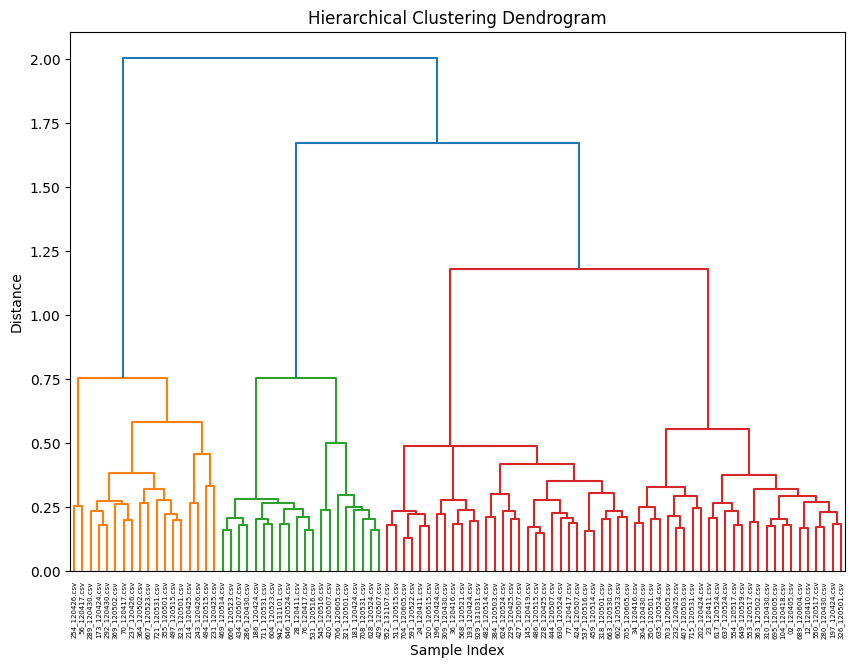

In [32]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Sample data

# Compute similarity matrix (e.g., cosine similarity)


# Convert similarity matrix to distance matrix (1 - similarity)



# Perform hierarchical clustering using the distance matrix
linked = sch.linkage(distance_matrix_2, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(linked,labels=list(tf_matrix_2.columns))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()





In [33]:
from scipy.cluster.hierarchy import ward, fcluster
cluster_dct = dict(zip(list(tf_matrix_2.columns), fcluster(linked,t=1.5, criterion='distance').tolist()))

In [34]:
cluster_dct

{'624_120524.csv': 3,
 '545_120516.csv': 2,
 '254_120426.csv': 1,
 '289_120430.csv': 1,
 '434_120507.csv': 2,
 '482_120514.csv': 3,
 '637_120524.csv': 3,
 '554_120517.csv': 3,
 '24_120411.csv': 3,
 '708_120531.csv': 2,
 '318_120501.csv': 3,
 '34_120416.csv': 3,
 '364_120502.csv': 1,
 '649_120529.csv': 3,
 '486_120515.csv': 3,
 '23_120411.csv': 3,
 '711_120531.csv': 2,
 '196_120424.csv': 3,
 '232_120425.csv': 3,
 '309_120430.csv': 3,
 '553_120517.csv': 3,
 '77_120417.csv': 3,
 '424_120507.csv': 3,
 '28_120411.csv': 2,
 '607_120523.csv': 1,
 '703_120605.csv': 3,
 '704_120605.csv': 3,
 '197_120424.csv': 3,
 '630_120524.csv': 3,
 '173_120424.csv': 1,
 '721_120531.csv': 1,
 '497_120515.csv': 1,
 '706_120605.csv': 2,
 '444_120507.csv': 3,
 '494_120515.csv': 1,
 '229_120425.csv': 3,
 '407_120503.csv': 3,
 '181_120424.csv': 2,
 '70_120417.csv': 1,
 '715_120531.csv': 3,
 '420_120507.csv': 2,
 '427_120507.csv': 3,
 '214_120425.csv': 1,
 '104_120418.csv': 3,
 '310_120430.csv': 3,
 '695_120605.csv

In [35]:
cl_dct= dict()
cluster_1 = []
cluster_2 = []
cluster_3 = []

for i,j in cluster_dct.items():
    if j == 1:
        cluster_1.append(i)
    elif j ==2:
        cluster_2.append(i)
    elif j==3:
        cluster_3.append(i)

In [36]:
cluster_1

['254_120426.csv',
 '289_120430.csv',
 '364_120502.csv',
 '607_120523.csv',
 '173_120424.csv',
 '721_120531.csv',
 '497_120515.csv',
 '494_120515.csv',
 '70_120417.csv',
 '214_120425.csv',
 '369_120502.csv',
 '355_120501.csv',
 '292_120430.csv',
 '243_120426.csv',
 '237_120426.csv',
 '56_120417.csv',
 '231_120425.csv',
 '323_120501.csv']

In [37]:
cluster_1_1 = ['254_120426.csv',
 '550_120517.csv',
 '427_120507.csv',
 '602_120523.csv',
 '186_120424.csv',
 '695_120605.csv',
 '104_120418.csv',
 '630_120524.csv',
 '237_120426.csv',
 '384_120503.csv',
 '606_120523.csv',
 '229_120425.csv',
 '511_120515.csv',
 '545_120516.csv',
 '663_120530.csv',
 '145_120419.csv',
 '708_120531.csv',
 '705_120605.csv',
 '196_120424.csv',
 '554_120517.csv']

In [38]:
set(cluster_3).intersection(set(cluster_1_1))

{'104_120418.csv',
 '145_120419.csv',
 '196_120424.csv',
 '229_120425.csv',
 '384_120503.csv',
 '427_120507.csv',
 '511_120515.csv',
 '550_120517.csv',
 '554_120517.csv',
 '602_120523.csv',
 '630_120524.csv',
 '663_120530.csv',
 '695_120605.csv',
 '705_120605.csv'}

In [39]:
'''cluster_1 : ['23_120411.csv',
 '193_120424.csv',
 '76_120417.csv',
 '197_120424.csv',
 '326_120501.csv',
 '628_120524.csv',
 '520_120515.csv',
 '214_120425.csv',
 '497_120515.csv',
 '228_120425.csv',
 '350_120501.csv',
 '363_120502.csv',
 '637_120524.csv',
 '232_120425.csv',
 '429_120507.csv',
 '56_120417.csv',
 '444_120507.csv',
 '292_120430.csv',
 '494_120515.csv',
 '304_120430.csv',
 '34_120416.csv',
 '181_120424.csv',
 '231_120425.csv',
 '703_120605.csv',
 '355_120501.csv',
 '482_120514.csv',
 '952_131107.csv',
 '704_120605.csv',
 '531_120516.csv',
 '309_120430.csv',
 '02_120405.csv',
 '173_120424.csv',
 '407_120503.csv',
 '649_120529.csv',
 '434_120507.csv',
 '635_120524.csv',
 '942_131101.csv',
 '689_120604.csv']

 cluster_2: ['243_120426.csv',
 '424_120507.csv',
 '36_120416.csv',
 '323_120501.csv',
 '24_120411.csv',
 '721_120531.csv',
 '607_120523.csv',
 '604_120523.csv',
 '286_120430.csv',
 '12_120410.csv',
 '77_120417.csv',
 '591_120522.csv',
 '715_120531.csv',
 '459_120514.csv',
 '202_120424.csv',
 '711_120531.csv',
 '706_120605.csv',
 '624_120524.csv',
 '289_120430.csv',
 '321_120501.csv',
 '310_120430.csv',
 '537_120516.csv',
 '553_120517.csv',
 '469_120514.csv',
 '486_120515.csv',
 '364_120502.csv',
 '568_120521.csv',
 '929_131031.csv',
 '318_120501.csv',
 '70_120417.csv',
 '617_120524.csv',
 '420_120507.csv',
 '280_120430.csv']

 cluster 3: 
 ['254_120426.csv',
 '550_120517.csv',
 '427_120507.csv',
 '602_120523.csv',
 '186_120424.csv',
 '695_120605.csv',
 '104_120418.csv',
 '630_120524.csv',
 '237_120426.csv',
 '384_120503.csv',
 '606_120523.csv',
 '229_120425.csv',
 '511_120515.csv',
 '545_120516.csv',
 '663_120530.csv',
 '145_120419.csv',
 '708_120531.csv',
 '705_120605.csv',
 '196_120424.csv',
 '554_120517.csv']

''' 

"cluster_1 : ['23_120411.csv',\n '193_120424.csv',\n '76_120417.csv',\n '197_120424.csv',\n '326_120501.csv',\n '628_120524.csv',\n '520_120515.csv',\n '214_120425.csv',\n '497_120515.csv',\n '228_120425.csv',\n '350_120501.csv',\n '363_120502.csv',\n '637_120524.csv',\n '232_120425.csv',\n '429_120507.csv',\n '56_120417.csv',\n '444_120507.csv',\n '292_120430.csv',\n '494_120515.csv',\n '304_120430.csv',\n '34_120416.csv',\n '181_120424.csv',\n '231_120425.csv',\n '703_120605.csv',\n '355_120501.csv',\n '482_120514.csv',\n '952_131107.csv',\n '704_120605.csv',\n '531_120516.csv',\n '309_120430.csv',\n '02_120405.csv',\n '173_120424.csv',\n '407_120503.csv',\n '649_120529.csv',\n '434_120507.csv',\n '635_120524.csv',\n '942_131101.csv',\n '689_120604.csv']\n\n cluster_2: ['243_120426.csv',\n '424_120507.csv',\n '36_120416.csv',\n '323_120501.csv',\n '24_120411.csv',\n '721_120531.csv',\n '607_120523.csv',\n '604_120523.csv',\n '286_120430.csv',\n '12_120410.csv',\n '77_120417.csv',\n '

In [40]:
tf_matrix_2

624_120524.csv  545_120516.csv  254_120426.csv  \
624_120524.csv        1.000000        0.843529        0.803186   
545_120516.csv        0.843529        1.000000        0.724444   
254_120426.csv        0.803186        0.724444        1.000000   
289_120430.csv        0.832771        0.762418        0.833386   
434_120507.csv        0.871037        0.873464        0.781509   
...                        ...             ...             ...   
635_120524.csv        0.860153        0.790327        0.845276   
531_120516.csv        0.871132        0.862745        0.760320   
326_120501.csv        0.869109        0.811765        0.806027   
323_120501.csv        0.848334        0.768693        0.843111   
304_120430.csv        0.868815        0.789216        0.840977   

                289_120430.csv  434_120507.csv  482_120514.csv  \
624_120524.csv        0.832771        0.871037        0.882224   
545_120516.csv        0.762418        0.873464        0.827320   
254_120426.csv        0.833386        0.781509        0.800015   
289_120430.csv        1.000000        0.820665        0.831936   
434_120507.csv        0.820665        1.000000        0.861841   
...                        ...             ...             ...   
635_120524.csv        0.905669        0.857242        0.855550   
531_120516.csv        0.823833        0.918066        0.872194   
326_120501.csv        0.867959        0.863374        0.847387   
323_120501.csv        0.848791        0.831882        0.828220   
304_120430.csv        0.882048        0.844353        0.820348   

                637_120524.csv  554_120517.csv  24_120411.csv  708_120531.csv  \
624_120524.csv        0.854206        0.856923       0.882616        0.847602   
545_120516.csv        0.825948        0.797974       0.830131        0.876797   
254_120426.csv        0.821227        0.816858       0.800238        0.757592   
289_120430.csv        0.864490        0.850438       0.864567        0.804796   
434_120507.csv        0.864070        0.853201       0.875427        0.915418   
...                        ...             ...            ...             ...   
635_120524.csv        0.894552        0.882659       0.863376        0.824447   
531_120516.csv        0.852227        0.861786       0.884727        0.886492   
326_120501.csv        0.898698        0.885979       0.891743        0.848495   
323_120501.csv        0.869831        0.868775       0.845507        0.805139   
304_120430.csv        0.903708        0.901147       0.897625        0.834204   

                ...  228_120425.csv  350_120501.csv  231_120425.csv  \
624_120524.csv  ...        0.882502        0.852078        0.850976   
545_120516.csv  ...        0.870392        0.791373        0.805163   
254_120426.csv  ...        0.787742        0.849386        0.797213   
289_120430.csv  ...        0.835334        0.882212        0.836469   
434_120507.csv  ...        0.931025        0.846652        0.825820   
...             ...             ...             ...             ...   
635_120524.csv  ...        0.862731        0.903144        0.877816   
531_120516.csv  ...        0.909900        0.849961        0.823692   
326_120501.csv  ...        0.879890        0.862886        0.852059   
323_120501.csv  ...        0.833851        0.878427        0.852497   
304_120430.csv  ...        0.863437        0.903916        0.843593   

                604_120523.csv  929_131031.csv  635_120524.csv  \
624_120524.csv        0.849948        0.862729        0.860153   
545_120516.csv        0.865033        0.819935        0.790327   
254_120426.csv        0.769697        0.787140        0.845276   
289_120430.csv        0.822431        0.843140        0.905669   
434_120507.csv        0.904075        0.862746        0.857242   
...                        ...             ...             ...   
635_120524.csv        0.840404        0.841756        1.000000   
531_120516.csv        0.913340        0.859449        0.858316   
326_120501

In [41]:
cluster_list = [cluster_1,cluster_2, cluster_3]

In [42]:
import pickle

# Step 2: Create a list

# Step 3: Save the list to a pickle file
with open('../../GRN_ROSMAP_20_May_2024_Plaques_and_Clinical/data_output/cluster_list.pkl', 'wb') as file:
    pickle.dump(cluster_list, file)

print("List saved to my_list.pkl")

List saved to my_list.pkl


In [43]:
import pickle

# Step 4: Load the list from the pickle file
with open('../../GRN_ROSMAP_20_May_2024_Plaques_and_Clinical/data_output/cluster_list.pkl', 'rb') as file:
    cluster_list = pickle.load(file)

print("List loaded from my_list.pkl:")
print(cluster_list)

List loaded from my_list.pkl:
[['254_120426.csv', '289_120430.csv', '364_120502.csv', '607_120523.csv', '173_120424.csv', '721_120531.csv', '497_120515.csv', '494_120515.csv', '70_120417.csv', '214_120425.csv', '369_120502.csv', '355_120501.csv', '292_120430.csv', '243_120426.csv', '237_120426.csv', '56_120417.csv', '231_120425.csv', '323_120501.csv'], ['545_120516.csv', '434_120507.csv', '708_120531.csv', '711_120531.csv', '28_120411.csv', '706_120605.csv', '181_120424.csv', '420_120507.csv', '286_120430.csv', '469_120514.csv', '628_120524.csv', '606_120523.csv', '429_120507.csv', '942_131101.csv', '646_120524.csv', '76_120417.csv', '186_120424.csv', '321_120501.csv', '604_120523.csv', '531_120516.csv'], ['624_120524.csv', '482_120514.csv', '637_120524.csv', '554_120517.csv', '24_120411.csv', '318_120501.csv', '34_120416.csv', '649_120529.csv', '486_120515.csv', '23_120411.csv', '196_120424.csv', '232_120425.csv', '309_120430.csv', '553_120517.csv', '77_120417.csv', '424_120507.csv', 

In [44]:
cluster_list[0]

['254_120426.csv',
 '289_120430.csv',
 '364_120502.csv',
 '607_120523.csv',
 '173_120424.csv',
 '721_120531.csv',
 '497_120515.csv',
 '494_120515.csv',
 '70_120417.csv',
 '214_120425.csv',
 '369_120502.csv',
 '355_120501.csv',
 '292_120430.csv',
 '243_120426.csv',
 '237_120426.csv',
 '56_120417.csv',
 '231_120425.csv',
 '323_120501.csv']

In [45]:
data = pd.read_csv('../../GRN_ROSMAP_20_May_2024_Plaques_and_Clinical/data_output/tf_matrix_similarity/02_120405.csv', index_col=0)

In [46]:
import numpy as np
from tqdm import tqdm
cluster_data_list = []


for j in cluster_list:
    cluster_data = []
    for i in tqdm(j):
        data_2 = pd.read_csv('../../GRN_ROSMAP_20_May_2024_Plaques_and_Clinical/data_output/tf_matrix_similarity/' + str(i), index_col= 0)
        #print(data_2.head())
        if isinstance(cluster_data, pd.DataFrame):
            cluster_data= cluster_data + np.round(data_2/14)
        else:
            cluster_data = np.round(data_2/14)

    cluster_data_list.append(cluster_data)  

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 56/56 [00:00<00:00, 72.12it/s]


In [47]:
cluster_data_list[1]

reg_ENSG00000001167  reg_ENSG00000004848  \
reg_ENSG00000001167                 20.0                  0.0   
reg_ENSG00000004848                  0.0                 20.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006194                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000005513  reg_ENSG00000006047  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                 20.0                  0.0   
reg_ENSG00000006047                  0.0                 20.0   
reg_ENSG00000006194                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                 14.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000006194  reg_ENSG00000006468  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006194                 20.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  4.0                  0.0   
reg_ENSG00000275111                 20.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000007372  reg_ENSG00000007866  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006194                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000008441  reg_ENSG00000009709  ...  \
reg_ENSG00000001167                  0.0                  0.0  ...   
reg_ENSG00000004848                  0.0                  0.0  ...   
reg_ENSG00000005513                  0.0                  0.0  ...   
reg_ENSG00000006047                  0.0                  0.0  ...   
reg_ENSG00000006194                  0.0                  4.0  ...   
...                                  ...                  ...  ...   
reg_ENSG00000267508                  0.0                  0.0  ...   
reg_ENSG00000267680                  0.0                  0.0  ...   
reg_ENSG00000272602                  0.0                  5.0  ...   
reg_ENSG00000275111                  0.0                  4.0  ...   
reg_ENSG00000278129                  0.0                  0.0  ...   

                     reg_ENSG00000256294  reg_ENSG000002

In [48]:
cluster_data_list[0].max().max()

18.0

### len(cluster_list[0])

In [49]:
for i,j in enumerate(cluster_data_list):
    cluster_data_list[i] = j/j.max().max()
    

In [50]:
cluster_data_list[0]

reg_ENSG00000001167  reg_ENSG00000004848  \
reg_ENSG00000001167                  1.0                  0.0   
reg_ENSG00000004848                  0.0                  1.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006194                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000005513  reg_ENSG00000006047  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  1.0                  0.0   
reg_ENSG00000006047                  0.0                  1.0   
reg_ENSG00000006194                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.5                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000006194  reg_ENSG00000006468  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006194                  1.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  1.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000007372  reg_ENSG00000007866  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006194                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000008441  reg_ENSG00000009709  ...  \
reg_ENSG00000001167                  0.0             0.000000  ...   
reg_ENSG00000004848                  0.0             0.000000  ...   
reg_ENSG00000005513                  0.0             0.000000  ...   
reg_ENSG00000006047                  0.0             0.000000  ...   
reg_ENSG00000006194                  0.0             0.166667  ...   
...                                  ...                  ...  ...   
reg_ENSG00000267508                  0.0             0.000000  ...   
reg_ENSG00000267680                  0.0             0.000000  ...   
reg_ENSG00000272602                  0.0             0.055556  ...   
reg_ENSG00000275111                  0.0             0.166667  ...   
reg_ENSG00000278129                  0.0             0.000000  ...   

                     reg_ENSG00000256294  reg_ENSG000002

In [51]:
cluster_data_list[1]

reg_ENSG00000001167  reg_ENSG00000004848  \
reg_ENSG00000001167                  1.0                  0.0   
reg_ENSG00000004848                  0.0                  1.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006194                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000005513  reg_ENSG00000006047  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  1.0                  0.0   
reg_ENSG00000006047                  0.0                  1.0   
reg_ENSG00000006194                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.7                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000006194  reg_ENSG00000006468  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006194                  1.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.2                  0.0   
reg_ENSG00000275111                  1.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000007372  reg_ENSG00000007866  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006194                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000008441  reg_ENSG00000009709  ...  \
reg_ENSG00000001167                  0.0                 0.00  ...   
reg_ENSG00000004848                  0.0                 0.00  ...   
reg_ENSG00000005513                  0.0                 0.00  ...   
reg_ENSG00000006047                  0.0                 0.00  ...   
reg_ENSG00000006194                  0.0                 0.20  ...   
...                                  ...                  ...  ...   
reg_ENSG00000267508                  0.0                 0.00  ...   
reg_ENSG00000267680                  0.0                 0.00  ...   
reg_ENSG00000272602                  0.0                 0.25  ...   
reg_ENSG00000275111                  0.0                 0.20  ...   
reg_ENSG00000278129                  0.0                 0.00  ...   

                     reg_ENSG00000256294  reg_ENSG000002

In [52]:
dct_sim = dict()
dct_inf = dict()


for i,j in enumerate(cluster_data_list):
    for l,m in enumerate(cluster_data_list):
        if (m-j).sum().sum() ==0:
            print(i,l)
            continue
        diff = j - m
        abs_diff = diff.abs()
        
        element_wise_min = np.minimum(j, m)
        #print(element_wise_min)
# Step 4: Divide the absolute differences by the element-wise minimum
        
        
        result = abs_diff / element_wise_min
        result = result.fillna(0)
        inf_mask = np.isinf(result)

# Stack the DataFrame to get multi-index Series of inf values
        inf_positions = inf_mask.stack()
        
        # Filter the positions to only those that are True (i.e., inf values)
        inf_positions = inf_positions[inf_positions]
        
        # Convert the filtered positions to a DataFrame for better readability
        inf_positions_df = inf_positions.reset_index()
        inf_positions_df.columns = ['Row', 'Column', 'IsInf']
        
        # Drop the IsInf column as it is not needed
        inf_positions_df = inf_positions_df.drop(columns=['IsInf'])
        
        #print(inf_positions_df)
        result = result.replace([np.inf, -np.inf], 0)
        dct_sim[str(i)+'_'+str(l)] = result 
        dct_inf[str(i)+'_'+str(l)] = inf_positions_df
        

0 0
1 1
2 2


In [53]:
dct_sim['0_1']

reg_ENSG00000001167  reg_ENSG00000004848  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006194                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000005513  reg_ENSG00000006047  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006194                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.4                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000006194  reg_ENSG00000006468  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006194                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000007372  reg_ENSG00000007866  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006194                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000008441  reg_ENSG00000009709  ...  \
reg_ENSG00000001167                  0.0                  0.0  ...   
reg_ENSG00000004848                  0.0                  0.0  ...   
reg_ENSG00000005513                  0.0                  0.0  ...   
reg_ENSG00000006047                  0.0                  0.0  ...   
reg_ENSG00000006194                  0.0                  0.2  ...   
...                                  ...                  ...  ...   
reg_ENSG00000267508                  0.0                  0.0  ...   
reg_ENSG00000267680                  0.0                  0.0  ...   
reg_ENSG00000272602                  0.0                  3.5  ...   
reg_ENSG00000275111                  0.0                  0.2  ...   
reg_ENSG00000278129                  0.0                  0.0  ...   

                     reg_ENSG00000256294  reg_ENSG000002

In [54]:
dct_sim['0_2']

reg_ENSG00000001167  reg_ENSG00000004848  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006194                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000005513  reg_ENSG00000006047  \
reg_ENSG00000001167             0.000000                  0.0   
reg_ENSG00000004848             0.000000                  0.0   
reg_ENSG00000005513             0.000000                  0.0   
reg_ENSG00000006047             0.000000                  0.0   
reg_ENSG00000006194             0.000000                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508             0.000000                  0.0   
reg_ENSG00000267680             0.392857                  0.0   
reg_ENSG00000272602             0.000000                  0.0   
reg_ENSG00000275111             0.000000                  0.0   
reg_ENSG00000278129             0.000000                  0.0   

                     reg_ENSG00000006194  reg_ENSG00000006468  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006194                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000007372  reg_ENSG00000007866  \
reg_ENSG00000001167                  0.0                  0.0   
reg_ENSG00000004848                  0.0                  0.0   
reg_ENSG00000005513                  0.0                  0.0   
reg_ENSG00000006047                  0.0                  0.0   
reg_ENSG00000006194                  0.0                  0.0   
...                                  ...                  ...   
reg_ENSG00000267508                  0.0                  0.0   
reg_ENSG00000267680                  0.0                  0.0   
reg_ENSG00000272602                  0.0                  0.0   
reg_ENSG00000275111                  0.0                  0.0   
reg_ENSG00000278129                  0.0                  0.0   

                     reg_ENSG00000008441  reg_ENSG00000009709  ...  \
reg_ENSG00000001167                  0.0             0.000000  ...   
reg_ENSG00000004848                  0.0             0.000000  ...   
reg_ENSG00000005513                  0.0             0.000000  ...   
reg_ENSG00000006047                  0.0             0.000000  ...   
reg_ENSG00000006194                  0.0             3.666667  ...   
...                                  ...                  ...  ...   
reg_ENSG00000267508                  0.0             0.000000  ...   
reg_ENSG00000267680                  0.0             0.000000  ...   
reg_ENSG00000272602                  0.0             1.571429  ...   
reg_ENSG00000275111                  0.0             2.111111  ...   
reg_ENSG00000278129                  0.0             0.000000  ...   

                     reg_ENSG00000256294  reg_ENSG000002

In [55]:
list(dct_inf.keys())

['0_1', '0_2', '1_0', '1_2', '2_0', '2_1']

In [56]:
dct_inf['0_1']

Row               Column
0     reg_ENSG00000005513  reg_ENSG00000090447
1     reg_ENSG00000005513  reg_ENSG00000124782
2     reg_ENSG00000005513  reg_ENSG00000145908
3     reg_ENSG00000005513  reg_ENSG00000163132
4     reg_ENSG00000005513  reg_ENSG00000197619
...                   ...                  ...
6855  reg_ENSG00000278129  reg_ENSG00000074219
6856  reg_ENSG00000278129  reg_ENSG00000187079
6857  reg_ENSG00000278129  reg_ENSG00000197905
6858  reg_ENSG00000278129  reg_ENSG00000198464
6859  reg_ENSG00000278129  reg_ENSG00000198482

[6860 rows x 2 columns]

In [57]:

for key in tqdm(list(dct_inf.keys())):
    l = []
    y  = []
    z = []
    for i,j in dct_inf[key].iterrows():

        
        #print(j.Row,j.Column)
        #print(j.Row)
        m = int(key.split('_')[0])
        #print(m)
        o = int(key.split('_')[1])
        #print(o)
    
        l.append(np.abs(cluster_data_list[m].loc[j.Row,j.Column]-cluster_data_list[o].loc[j.Row,j.Column]))
        y.append(cluster_data_list[m].loc[j.Row,j.Column])
        z.append(cluster_data_list[o].loc[j.Row,j.Column])
        
        
    dct_inf[key]['abs_diff'] = l
    dct_inf[key][m] = y
    dct_inf[key][o] = z
    dct_inf[key].sort_values(by ='abs_diff', ascending=False, inplace=True)
            

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.58it/s]


In [58]:
dct_inf['0_1'].iloc[0:10,]

Row               Column  abs_diff    0     1
3320  reg_ENSG00000168874  reg_ENSG00000178935      1.00  0.0  1.00
2698  reg_ENSG00000162992  reg_ENSG00000178935      1.00  0.0  1.00
4589  reg_ENSG00000178935  reg_ENSG00000168874      1.00  0.0  1.00
4585  reg_ENSG00000178935  reg_ENSG00000162992      1.00  0.0  1.00
3866  reg_ENSG00000172888  reg_ENSG00000179965      0.95  0.0  0.95
3324  reg_ENSG00000168874  reg_ENSG00000186446      0.95  0.0  0.95
5211  reg_ENSG00000186446  reg_ENSG00000168874      0.95  0.0  0.95
5207  reg_ENSG00000186446  reg_ENSG00000162992      0.95  0.0  0.95
2702  reg_ENSG00000162992  reg_ENSG00000186446      0.95  0.0  0.95
4662  reg_ENSG00000179965  reg_ENSG00000172888      0.95  0.0  0.95

In [59]:
dct_inf['0_2'].iloc[0:20,]

Row               Column  abs_diff    0         2
4752  reg_ENSG00000179965  reg_ENSG00000172888  0.535714  0.0  0.535714
4072  reg_ENSG00000172888  reg_ENSG00000179965  0.535714  0.0  0.535714
5140  reg_ENSG00000184939  reg_ENSG00000172888  0.392857  0.0  0.392857
4074  reg_ENSG00000172888  reg_ENSG00000184939  0.392857  0.0  0.392857
4690  reg_ENSG00000178935  reg_ENSG00000168874  0.375000  0.0  0.375000
3415  reg_ENSG00000168874  reg_ENSG00000178935  0.375000  0.0  0.375000
3416  reg_ENSG00000168874  reg_ENSG00000181638  0.375000  0.0  0.375000
4686  reg_ENSG00000178935  reg_ENSG00000162992  0.375000  0.0  0.375000
2821  reg_ENSG00000162992  reg_ENSG00000181638  0.375000  0.0  0.375000
2820  reg_ENSG00000162992  reg_ENSG00000178935  0.375000  0.0  0.375000
1500  reg_ENSG00000122386  reg_ENSG00000172888  0.375000  0.0  0.375000
4864  reg_ENSG00000181638  reg_ENSG00000168874  0.375000  0.0  0.375000
4061  reg_ENSG00000172888  reg_ENSG00000122386  0.375000  0.0  0.375000
4860  reg_ENSG00000181638  reg_ENSG00000162992  0.375000  0.0  0.375000
5387  reg_ENSG00000186446  reg_ENSG00000162992  0.357143  0.0  0.357143
3420  reg_ENSG00000168874  reg_ENSG00000186446  0.357143  0.0  0.357143
2825  reg_ENSG00000162992  reg_ENSG00000186446  0.357143  0.0  0.357143
4081  reg_ENSG00000172888  reg_ENSG00000197714  0.357143  0.0  0.357143
6081  reg_ENSG00000197714  reg_ENSG00000172888  0.357143  0.0  0.357143
5391  reg_ENSG00000186446  reg_ENSG00000168874  0.357143  0.0  0.357143

In [60]:
dct_inf['1_2'].iloc[0:20,]

Row               Column  abs_diff     1    2
688   reg_ENSG00000118058  reg_ENSG00000198429      0.25  0.25  0.0
3537  reg_ENSG00000198429  reg_ENSG00000118058      0.25  0.25  0.0
53    reg_ENSG00000010818  reg_ENSG00000105732      0.25  0.25  0.0
883   reg_ENSG00000124216  reg_ENSG00000118058      0.25  0.25  0.0
677   reg_ENSG00000118058  reg_ENSG00000124216      0.25  0.25  0.0
528   reg_ENSG00000105732  reg_ENSG00000010818      0.25  0.25  0.0
23    reg_ENSG00000006194  reg_ENSG00000272602      0.20  0.20  0.0
889   reg_ENSG00000124216  reg_ENSG00000185278      0.20  0.20  0.0
1197  reg_ENSG00000138378  reg_ENSG00000197647      0.20  0.20  0.0
3369  reg_ENSG00000196653  reg_ENSG00000120693      0.20  0.20  0.0
2795  reg_ENSG00000185278  reg_ENSG00000124216      0.20  0.20  0.0
4039  reg_ENSG00000272602  reg_ENSG00000136870      0.20  0.20  0.0
2806  reg_ENSG00000185278  reg_ENSG00000198429      0.20  0.20  0.0
3541  reg_ENSG00000198429  reg_ENSG00000177125      0.20  0.20  0.0
3543  reg_ENSG00000198429  reg_ENSG00000185278      0.20  0.20  0.0
2359  reg_ENSG00000177125  reg_ENSG00000198429      0.20  0.20  0.0
3017  reg_ENSG00000188295  reg_ENSG00000181894      0.20  0.20  0.0
887   reg_ENSG00000124216  reg_ENSG00000177125      0.20  0.20  0.0
2348  reg_ENSG00000177125  reg_ENSG00000124216      0.20  0.20  0.0
1160  reg_ENSG00000136870  reg_ENSG00000272602      0.20  0.20  0.0

# Cluster 0 and Cluster 1 Similarity

In [61]:
# Step 1: Unstack the DataFrame to create a Series with MultiIndex
df_unstacked = dct_sim['0_1'].unstack()

# Step 2: Sort the Series in descending order
sorted_series = df_unstacked.sort_values(ascending=False)

# Step 3: Extract the top 50 values
top_50 = sorted_series.head(50)

# Step 4: Display the indices and corresponding values
result_0_1 = top_50.reset_index()
result_0_1.columns = ['Column', 'Index', 'Value']

print(result_0_1)

                 Column                Index  Value
0   reg_ENSG00000251247  reg_ENSG00000168874   17.0
1   reg_ENSG00000198429  reg_ENSG00000178935   17.0
2   reg_ENSG00000172845  reg_ENSG00000168874   17.0
3   reg_ENSG00000162992  reg_ENSG00000172845   17.0
4   reg_ENSG00000162992  reg_ENSG00000251247   17.0
5   reg_ENSG00000172845  reg_ENSG00000162992   17.0
6   reg_ENSG00000251247  reg_ENSG00000162992   17.0
7   reg_ENSG00000178935  reg_ENSG00000198429   17.0
8   reg_ENSG00000168874  reg_ENSG00000172845   17.0
9   reg_ENSG00000168874  reg_ENSG00000251247   17.0
10  reg_ENSG00000172888  reg_ENSG00000251247   16.1
11  reg_ENSG00000137492  reg_ENSG00000251247   16.1
12  reg_ENSG00000172845  reg_ENSG00000172888   16.1
13  reg_ENSG00000251247  reg_ENSG00000137492   16.1
14  reg_ENSG00000172888  reg_ENSG00000172845   16.1
15  reg_ENSG00000251247  reg_ENSG00000172888   16.1
16  reg_ENSG00000162992  reg_ENSG00000179965   15.2
17  reg_ENSG00000147421  reg_ENSG00000170100   15.2
18  reg_ENSG

In [62]:
# Step 1: Unstack the DataFrame to create a Series with MultiIndex
df_unstacked = dct_sim['0_2'].unstack()

# Step 2: Sort the Series in descending order
sorted_series = df_unstacked.sort_values(ascending=False)

# Step 3: Extract the top 50 values
top_50 = sorted_series.head(50)

# Step 4: Display the indices and corresponding values
result_0_2 = top_50.reset_index()
result_0_2.columns = ['Column', 'Index', 'Value']

print(result_0_2)

                 Column                Index      Value
0   reg_ENSG00000256223  reg_ENSG00000167528  14.555556
1   reg_ENSG00000167528  reg_ENSG00000256223  14.555556
2   reg_ENSG00000251247  reg_ENSG00000256223  14.555556
3   reg_ENSG00000139651  reg_ENSG00000256223  14.555556
4   reg_ENSG00000256223  reg_ENSG00000251247  14.555556
5   reg_ENSG00000256223  reg_ENSG00000139651  14.555556
6   reg_ENSG00000172845  reg_ENSG00000256223  11.444444
7   reg_ENSG00000256223  reg_ENSG00000172845  11.444444
8   reg_ENSG00000166823  reg_ENSG00000251247  11.444444
9   reg_ENSG00000251247  reg_ENSG00000166823  11.444444
10  reg_ENSG00000179965  reg_ENSG00000162992  10.571429
11  reg_ENSG00000179965  reg_ENSG00000168874  10.571429
12  reg_ENSG00000168874  reg_ENSG00000179965  10.571429
13  reg_ENSG00000162992  reg_ENSG00000179965  10.571429
14  reg_ENSG00000168874  reg_ENSG00000251247   9.285714
15  reg_ENSG00000251247  reg_ENSG00000168874   9.285714
16  reg_ENSG00000083828  reg_ENSG00000153266   9

In [63]:
# Step 1: Unstack the DataFrame to create a Series with MultiIndex
df_unstacked = dct_sim['1_2'].unstack()

# Step 2: Sort the Series in descending order
sorted_series = df_unstacked.sort_values(ascending=False)

# Step 3: Extract the top 50 values
top_50 = sorted_series.head(50)

# Step 4: Display the indices and corresponding values
result_1_2 = top_50.reset_index()
result_1_2.columns = ['Column', 'Index', 'Value']

print(result_1_2)

                 Column                Index  Value
0   reg_ENSG00000118058  reg_ENSG00000198633   21.4
1   reg_ENSG00000198633  reg_ENSG00000118058   21.4
2   reg_ENSG00000118058  reg_ENSG00000006194   15.8
3   reg_ENSG00000177125  reg_ENSG00000198633   15.8
4   reg_ENSG00000137492  reg_ENSG00000170954   15.8
5   reg_ENSG00000170954  reg_ENSG00000137492   15.8
6   reg_ENSG00000185278  reg_ENSG00000198633   15.8
7   reg_ENSG00000118058  reg_ENSG00000188868   15.8
8   reg_ENSG00000188868  reg_ENSG00000118058   15.8
9   reg_ENSG00000118058  reg_ENSG00000136870   15.8
10  reg_ENSG00000006194  reg_ENSG00000118058   15.8
11  reg_ENSG00000198633  reg_ENSG00000177125   15.8
12  reg_ENSG00000198633  reg_ENSG00000185278   15.8
13  reg_ENSG00000136870  reg_ENSG00000118058   15.8
14  reg_ENSG00000177125  reg_ENSG00000213762   13.0
15  reg_ENSG00000185278  reg_ENSG00000136870   13.0
16  reg_ENSG00000213762  reg_ENSG00000185278   13.0
17  reg_ENSG00000185278  reg_ENSG00000213762   13.0
18  reg_ENSG

In [64]:
for i,j in result.iterrows():
    print(cluster_data_list[0].loc[j.Index,j.Column],cluster_data_list[1].loc[j.Index,j.Column])
    break

AttributeError: 'Series' object has no attribute 'Index'

In [65]:
import gseapy as gp
from gseapy import Msigdb
names = gp.get_library_name(organism='Human')
names


['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbatio

In [66]:
important_tf_0_1 = [i.split('_')[1] for i in list(set(list(result_0_1['Column'])[0:10] + list(result_0_1['Index'])[0:10]))]
important_tf_0_2 = [i.split('_')[1] for i in list(set(list(result_0_2['Column'])[0:10] + list(result_0_2['Index'])[0:10]))]
important_tf_1_2 = [i.split('_')[1] for i in list(set(list(result_1_2['Column'])[0:10] + list(result_1_2['Index'])[0:10]))]


aggregate_network = AD_filtered_data['424_120507']
aggregate_network = pd.DataFrame(aggregate_network)
tf_agg = []
gene_agg= []
for i in aggregate_network.index:
    tf_agg.append(i.split('_')[0])
    gene_agg.append(i.split('_')[1])


aggregate_network['TF'] = tf_agg
aggregate_network['Gene'] = gene_agg
important_TF_0_1 = list(set(important_tf_0_1).intersection(set(aggregate_network.TF.values)))
important_TF_0_2 = list(set(important_tf_0_2).intersection(set(aggregate_network.TF.values)))
important_TF_1_2 = list(set(important_tf_1_2).intersection(set(aggregate_network.TF.values)))



In [67]:

from biomart import BiomartServer

server = BiomartServer("http://www.ensembl.org/biomart")
def return_gene_name(ensemble_id):
# Connect to the Ensembl Biomart server
    
    
    # Select the appropriate dataset (human genes in this case)
    dataset = server.datasets['hsapiens_gene_ensembl']
    
    # List of Ensembl IDs to convert
    ensembl_ids = ensemble_id # Add your IDs here
        
        # Perform the query to get the gene symbols
    response = dataset.search({
            'filters': {
                'ensembl_gene_id': ensembl_ids,
            },
            'attributes': [
                'ensembl_gene_id',
                'external_gene_name',
            ]
        })
        
        # Process and display the results
    result = []    
    for line in response.iter_lines():
        decoded_line = line.decode('utf-8')
        ensembl_id, gene_symbol = decoded_line.split('\t')
        result.append(gene_symbol)
    return result

filtered_tf_set_0_1 = [return_gene_name(i)[0] for i in important_TF_0_1]
filtered_tf_set_0_2 = [return_gene_name(i)[0] for i in important_TF_0_2]
filtered_tf_set_1_2 = [return_gene_name(i)[0] for i in important_TF_1_2]
filtered_tf_set_1_2

['ZNF263',
 'THAP12',
 'ZNF189',
 'ZNF534',
 'ZBTB37',
 'ZNF415',
 'ZNF563',
 'ZBTB34',
 'KMT2A']

In [68]:
filtered_tf_set_0_1

['ATOH8', 'ZNF345', 'SP3', 'ZNF552', 'NEUROD1', 'ZNF69']

In [69]:
filtered_tf_set_0_2

['ZNF641', 'ZNF345', 'ZNF10', 'SP3', 'MESP1', 'ZNF740']

In [70]:
filtered_tf_set_1_2

['ZNF263',
 'THAP12',
 'ZNF189',
 'ZNF534',
 'ZBTB37',
 'ZNF415',
 'ZNF563',
 'ZBTB34',
 'KMT2A']

In [71]:
import gseapy as gp
from gseapy import Msigdb


def return_enriched_pathways(filtered_gene_set, adj_p_value = 0.05, gene_sets_databases =['GO_Molecular_Function_2023']):
    enr = gp.enrichr(gene_list= filtered_gene_set, gene_sets=gene_sets_databases, organism='human')
    
    dataframe = enr.results[enr.results['Adjusted P-value']<adj_p_value].sort_values(by = 'Adjusted P-value')
    return dataframe

def plot_dotplot(dataframe,size=10,top_term=5,fig_size=(3,5),title="GSEA"):
    ax = dotplot(dataframe,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=size,
              top_term=top_term,
              figsize=fig_size,
              title = title,
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )

# categorical scatterplot
def plot_barplot(dataframe,size=10,top_term=5,fig_size=(3,5),title="GSEA"):
    ax = barplot(dataframe,
                  column="Adjusted P-value",
                  group='Gene_set', # set group, so you could do a multi-sample/library comparsion
                  size=size,
                  title=title,
                  top_term=top_term,
                  figsize=fig_size,
                  #color=['darkred', 'darkblue'] # set colors for group
                  #color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
                 )

/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.

No significant results for WikiPathway_2023_Human _1_2


/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.

No significant results for OMIM_Disease _0_2
No significant results for OMIM_Disease _1_2


/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.

No significant results for GO_Cellular_Component_2023 _0_1
No significant results for GO_Cellular_Component_2023 _0_2


/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.

No significant results for DisGeNET _0_1
No significant results for DisGeNET _0_2
No significant results for DisGeNET _1_2
No significant results for Allen_Brain_Atlas_10x_scRNA_2021 _0_1
No significant results for Allen_Brain_Atlas_10x_scRNA_2021 _1_2


/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.

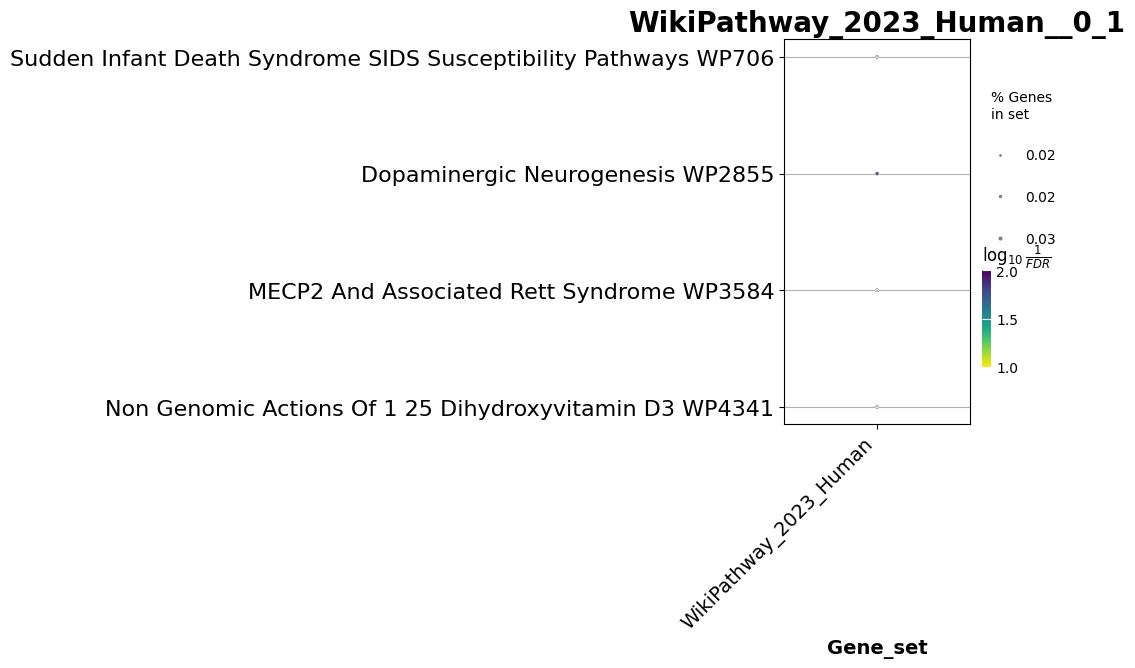

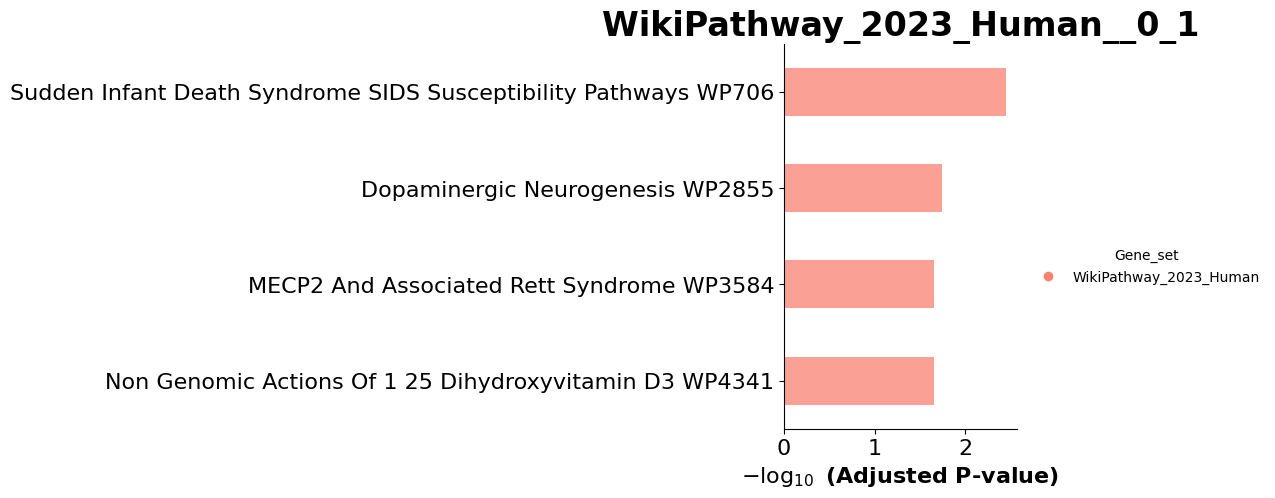

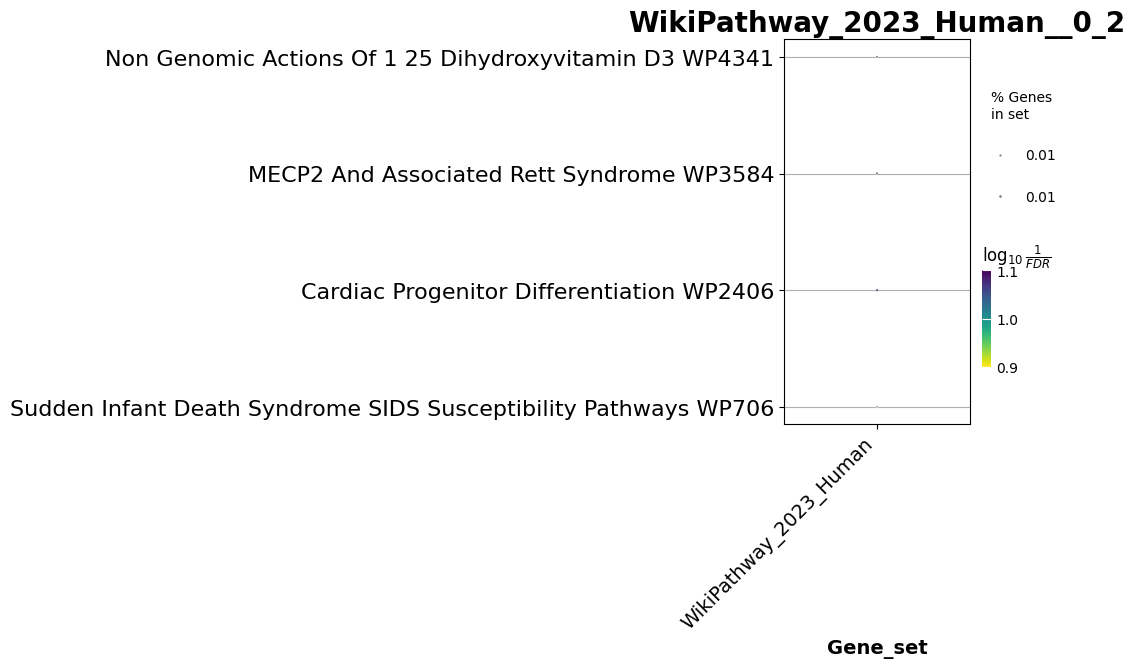

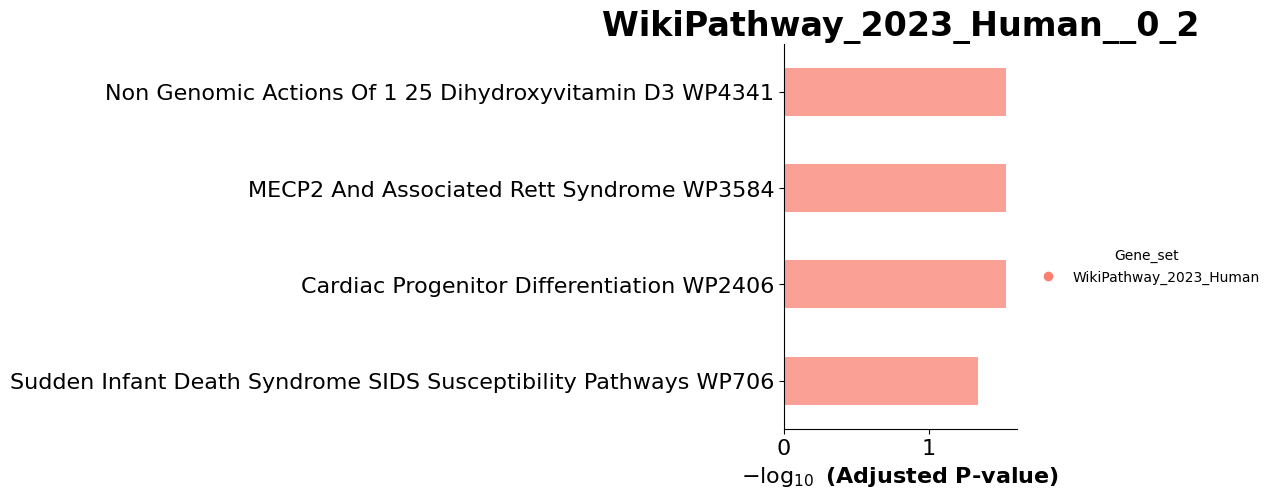

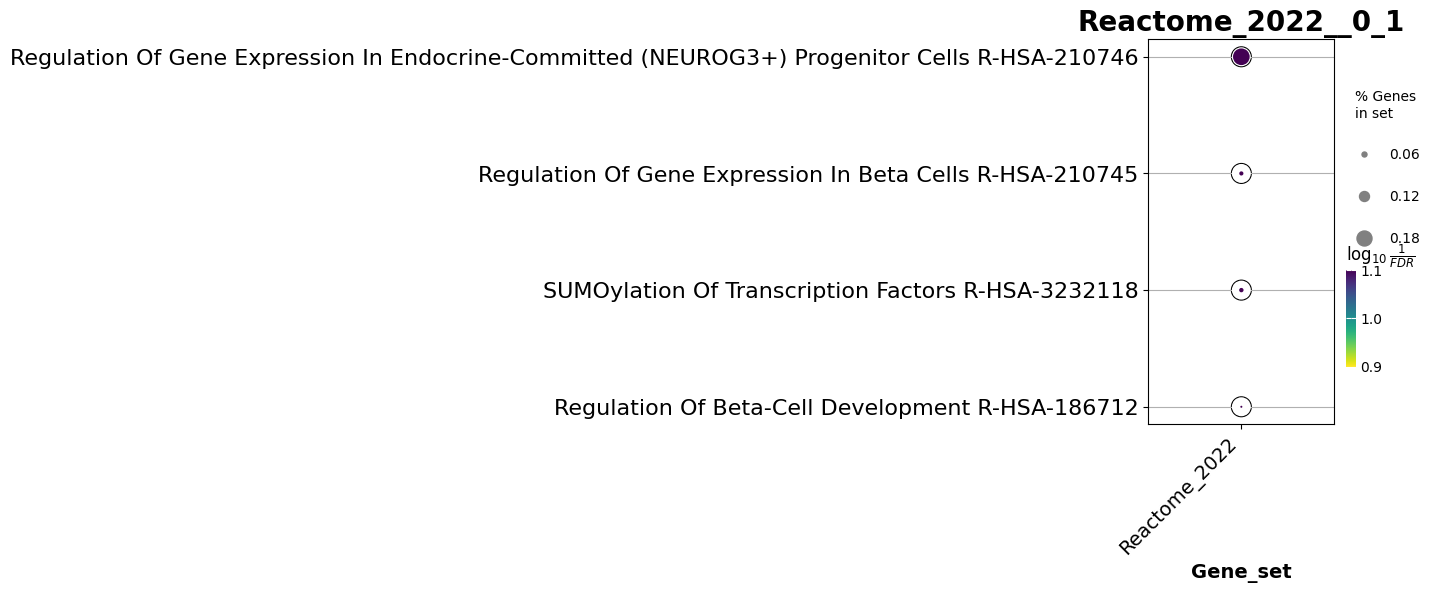

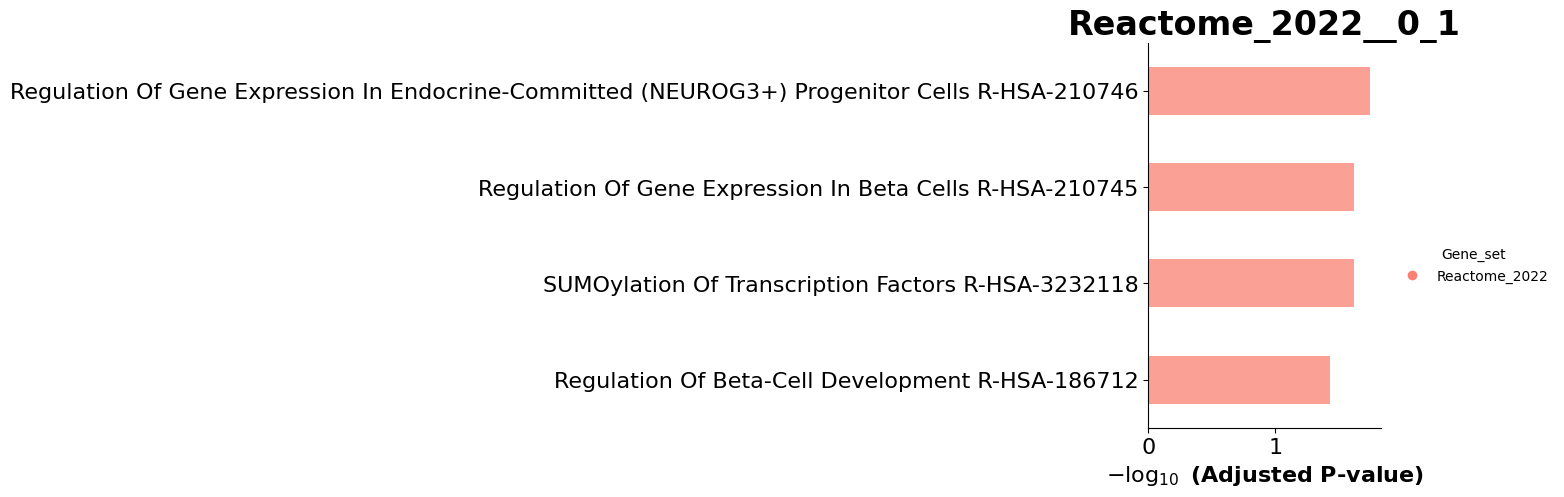

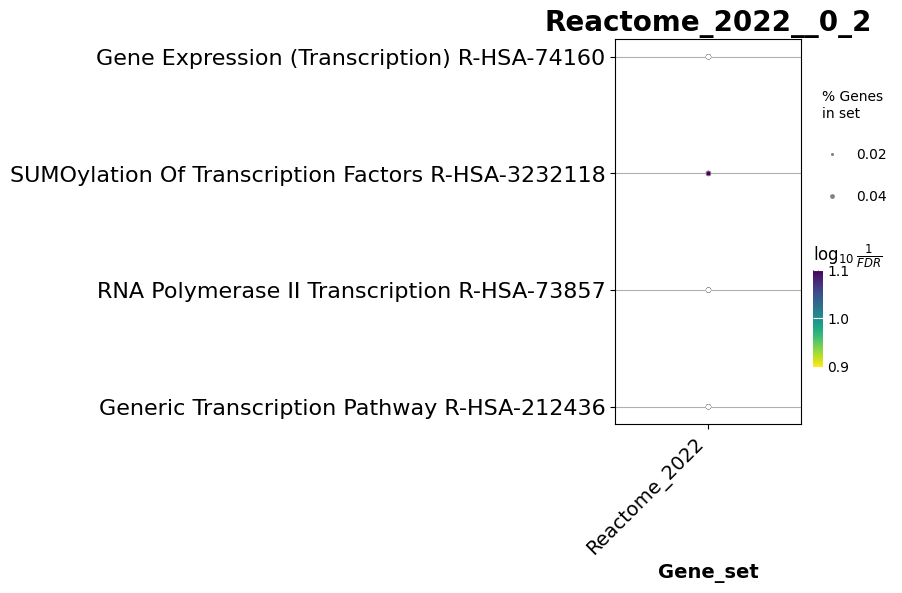

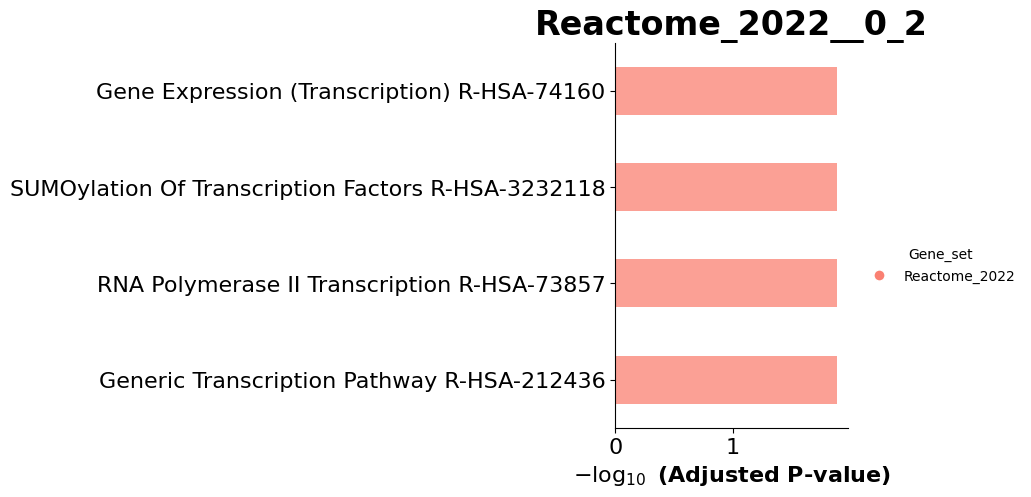

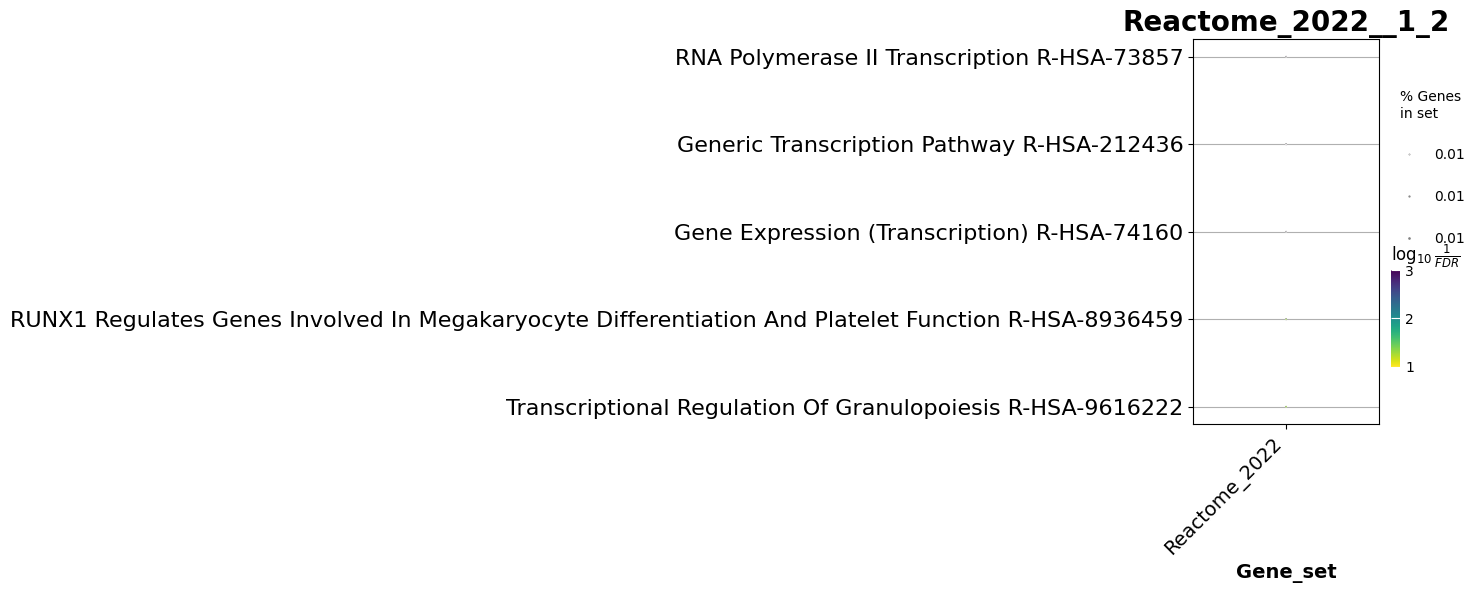

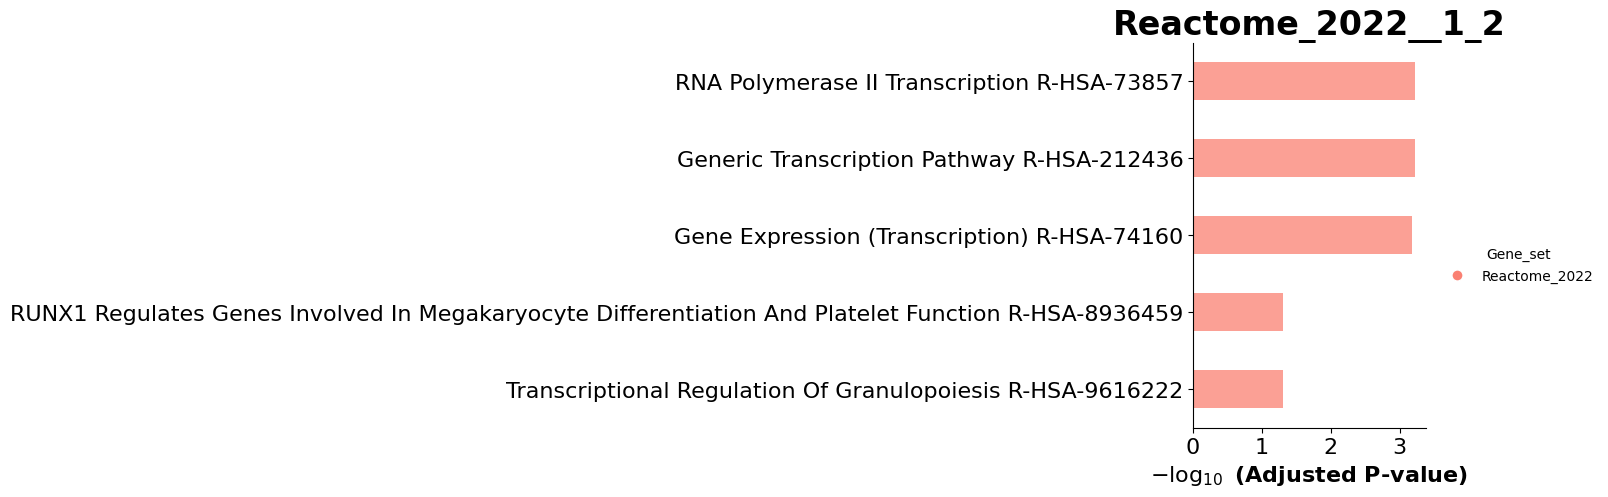

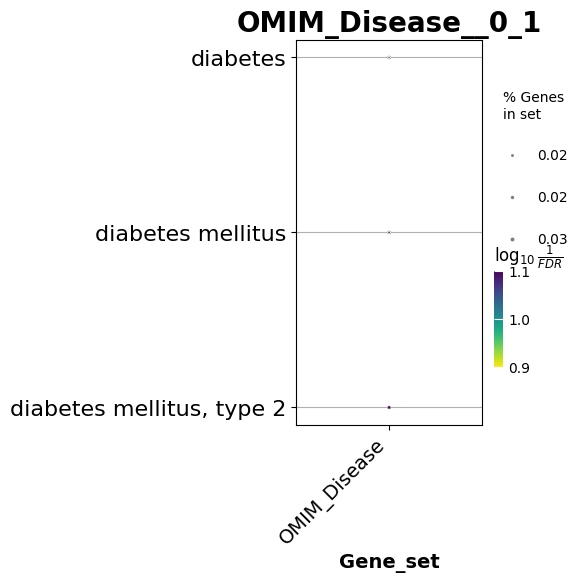

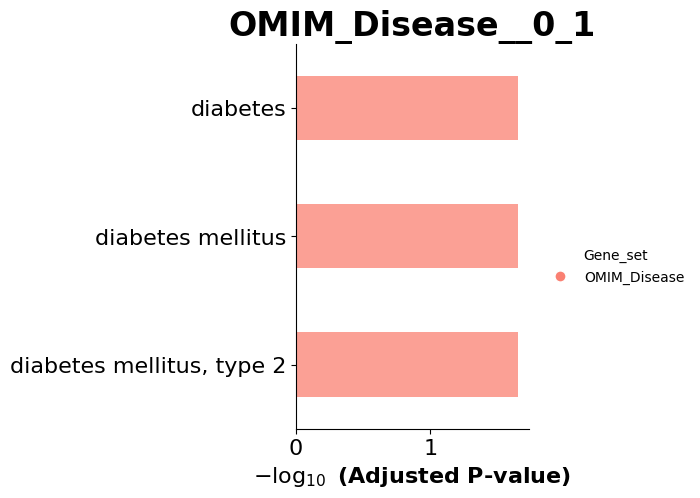

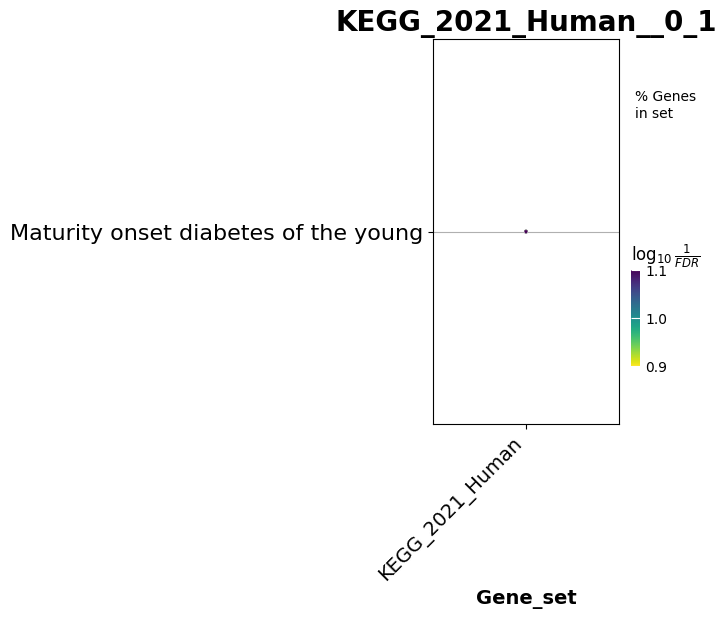

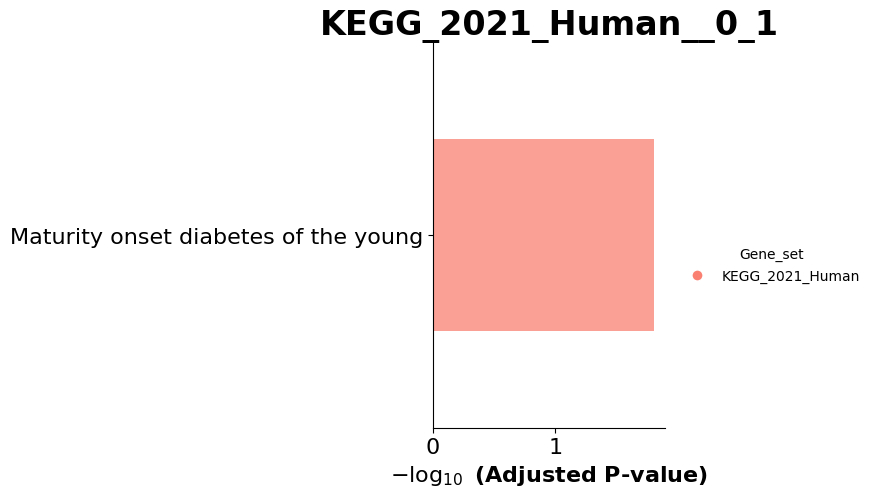

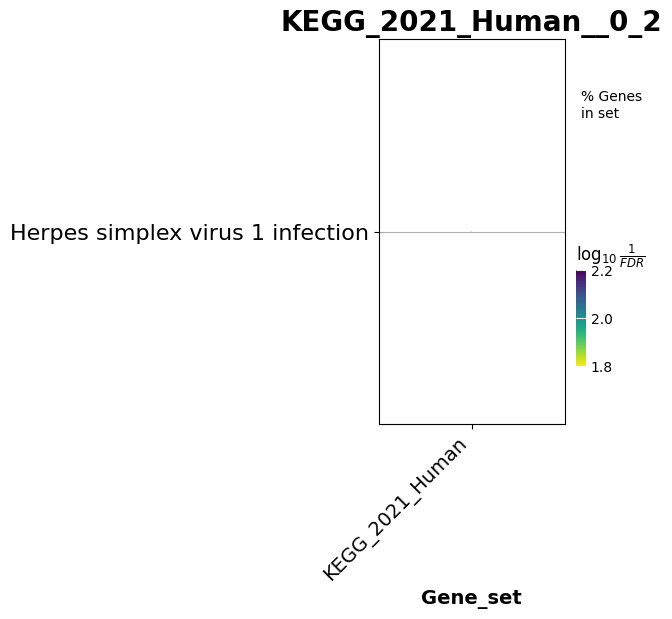

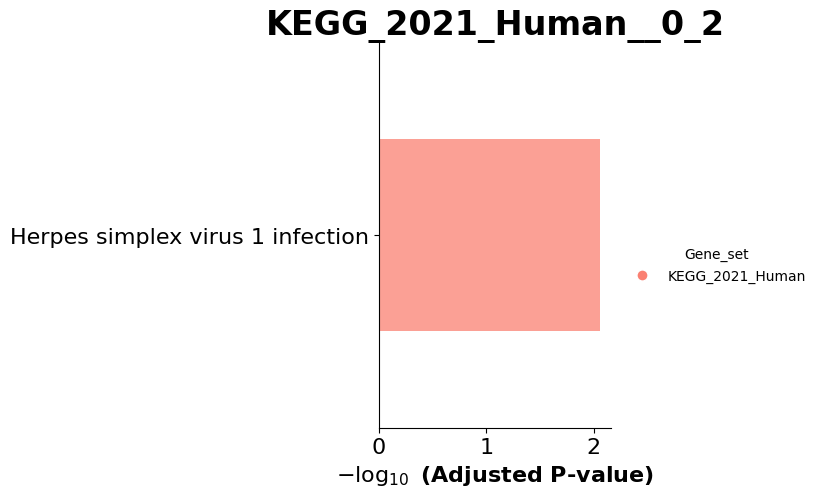

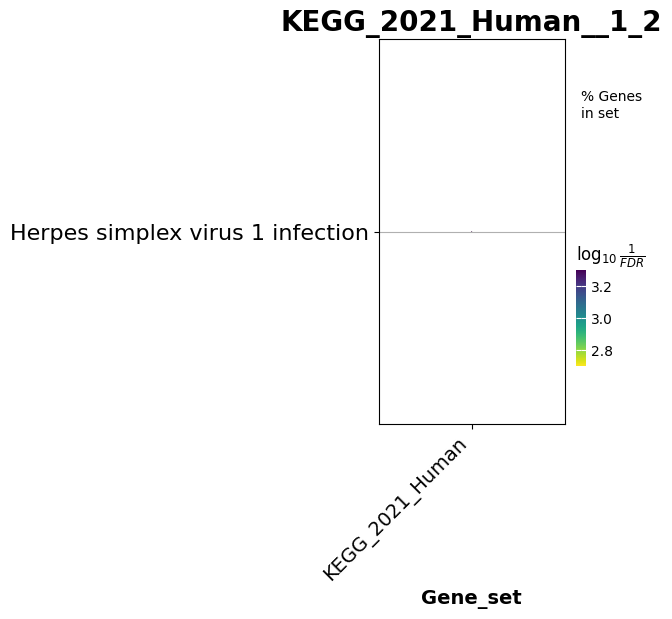

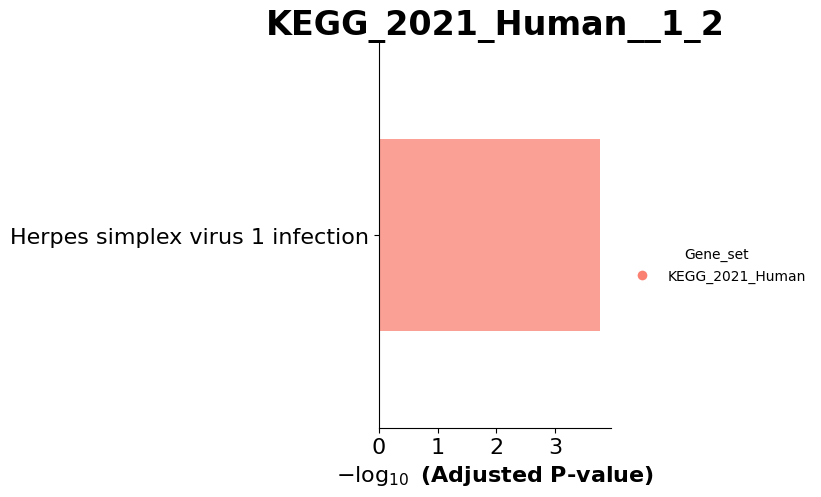

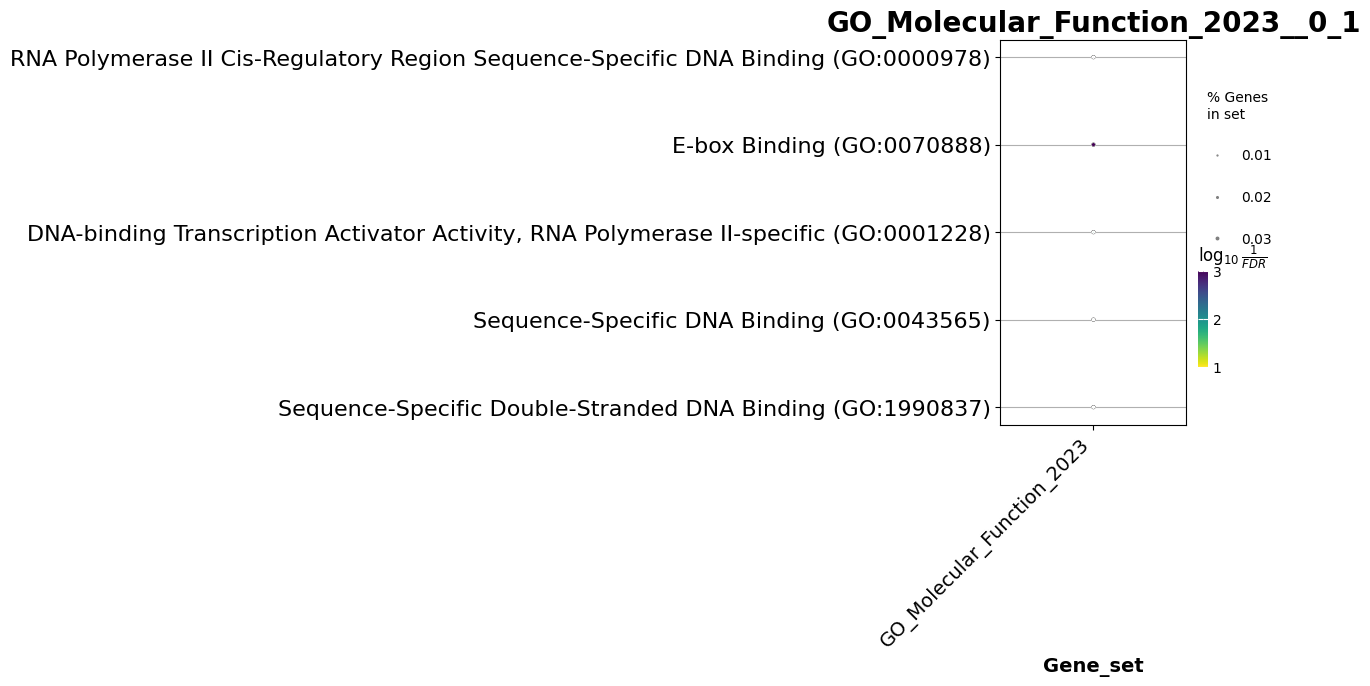

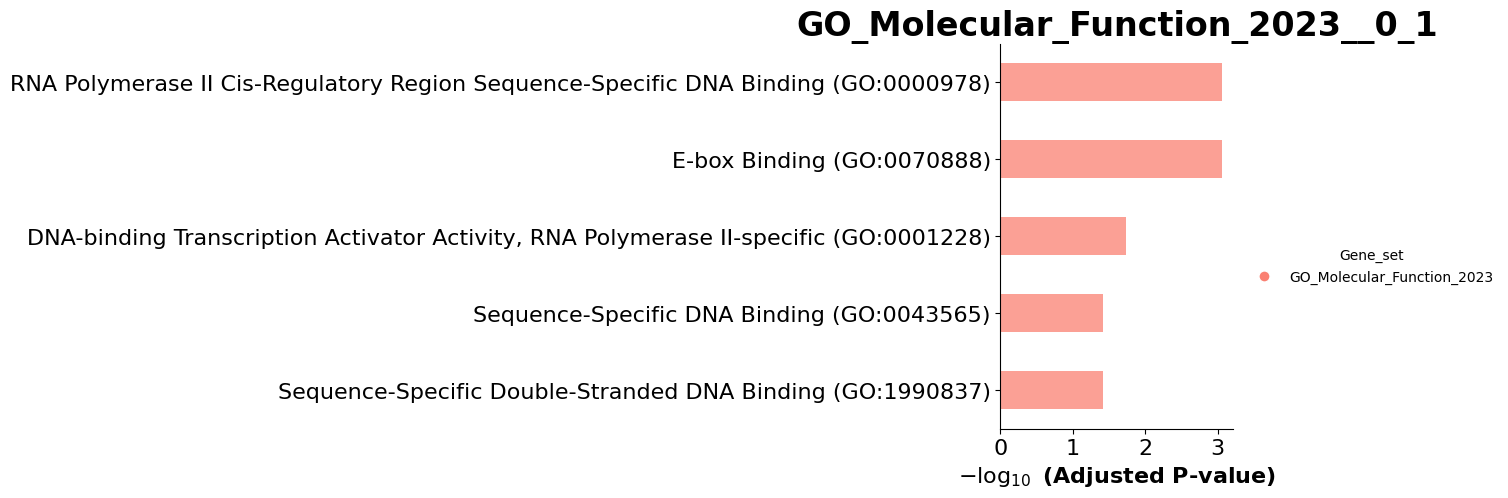

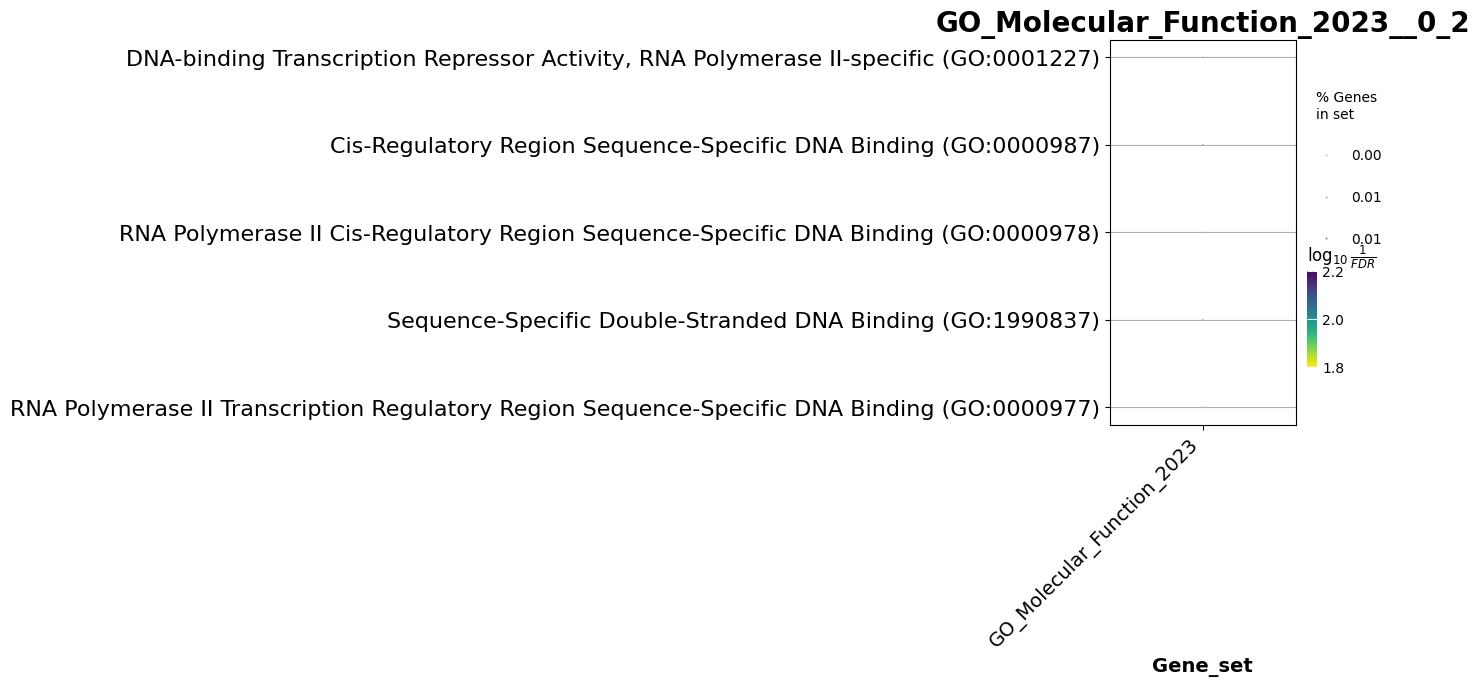

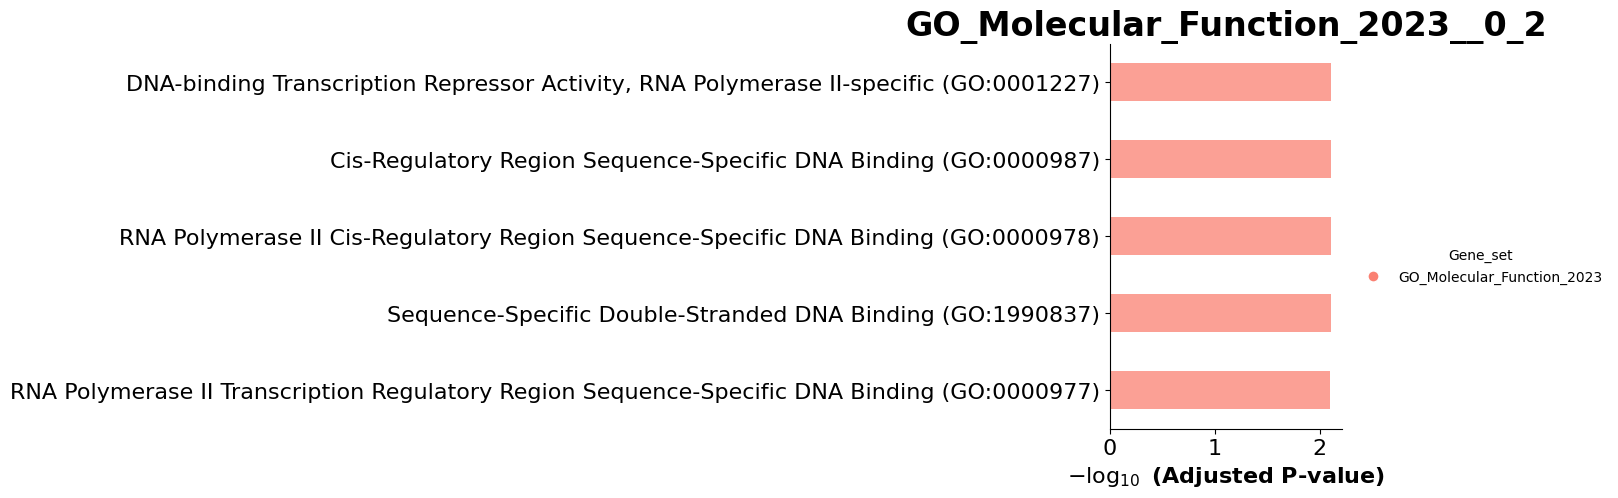

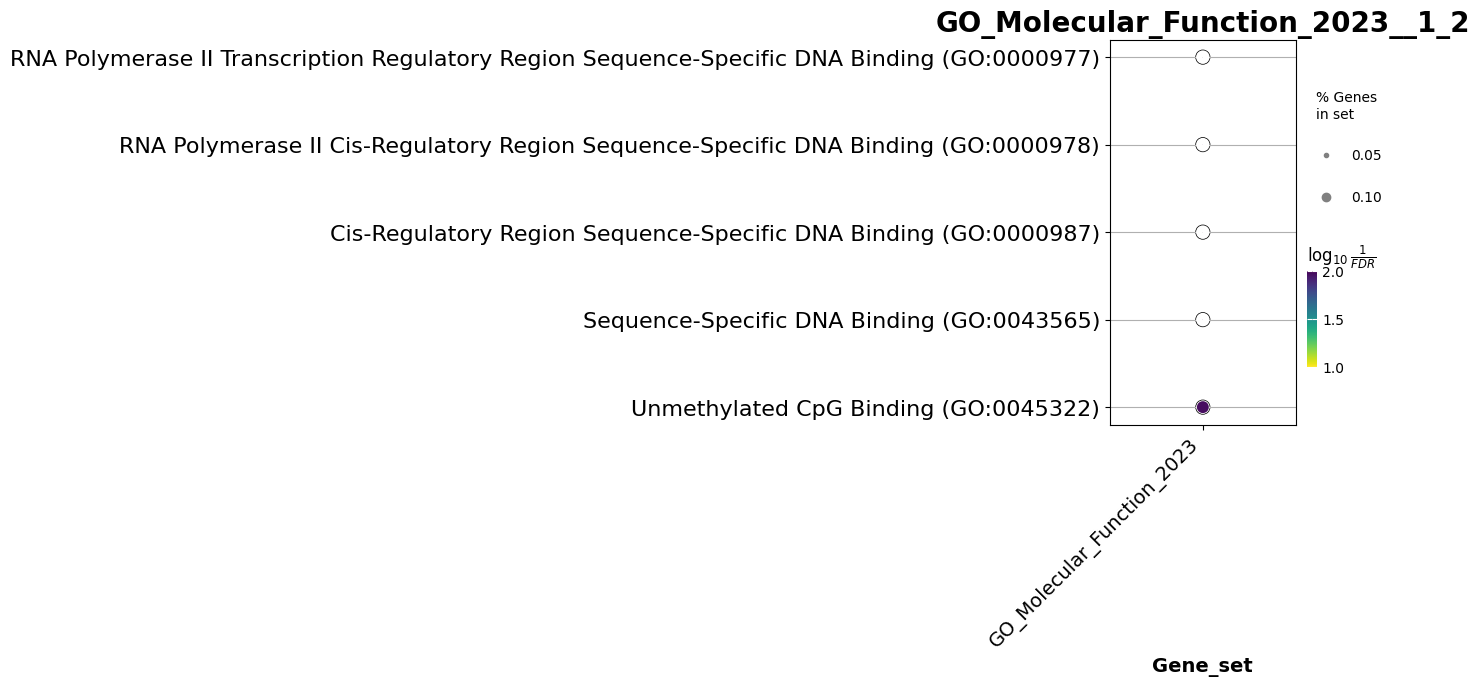

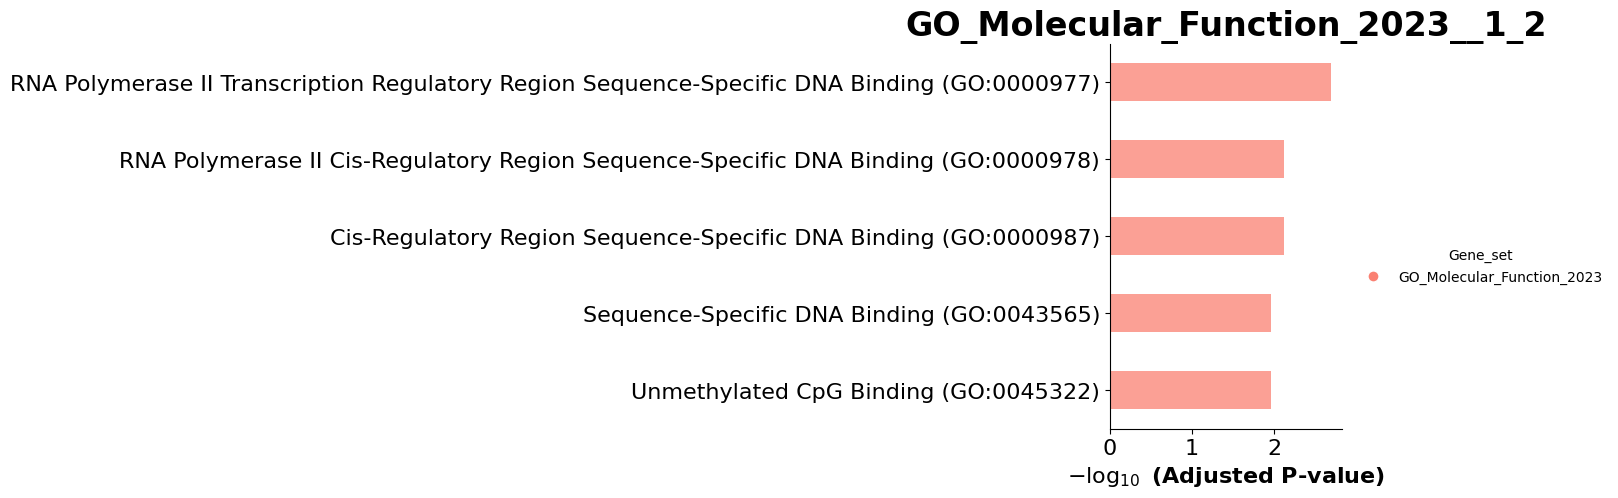

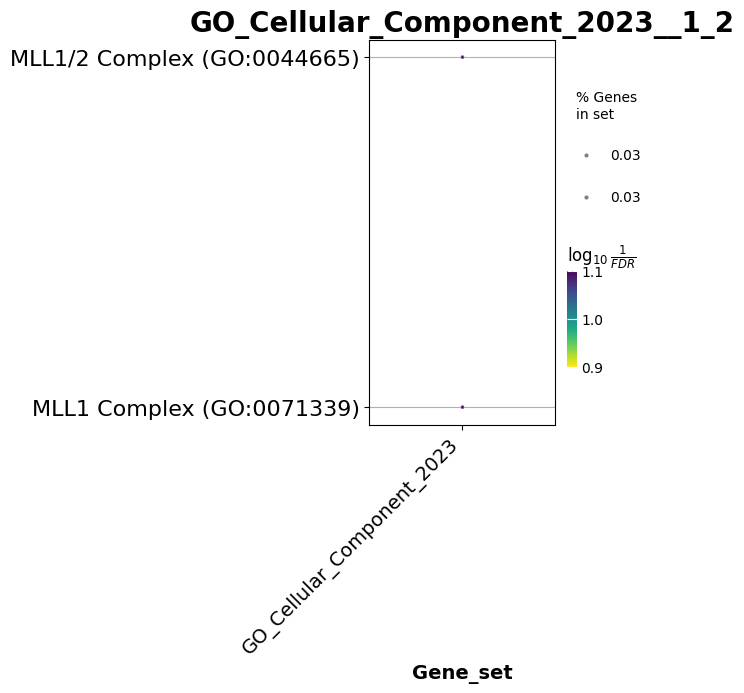

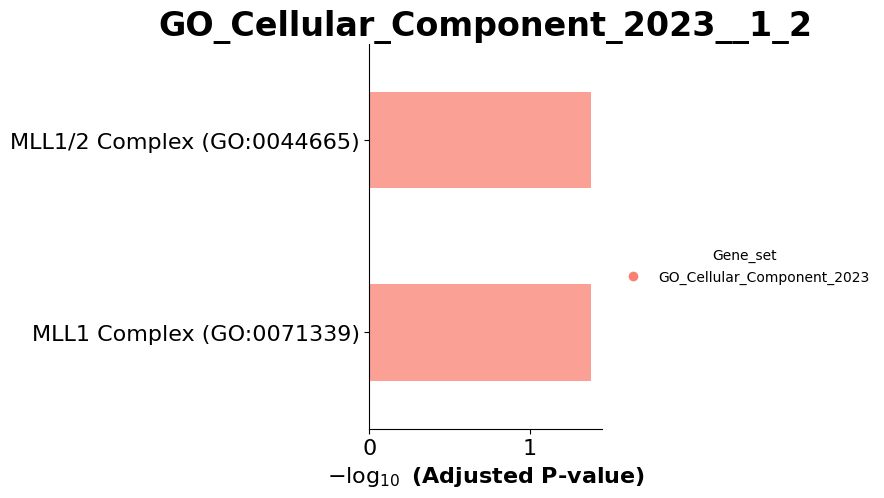

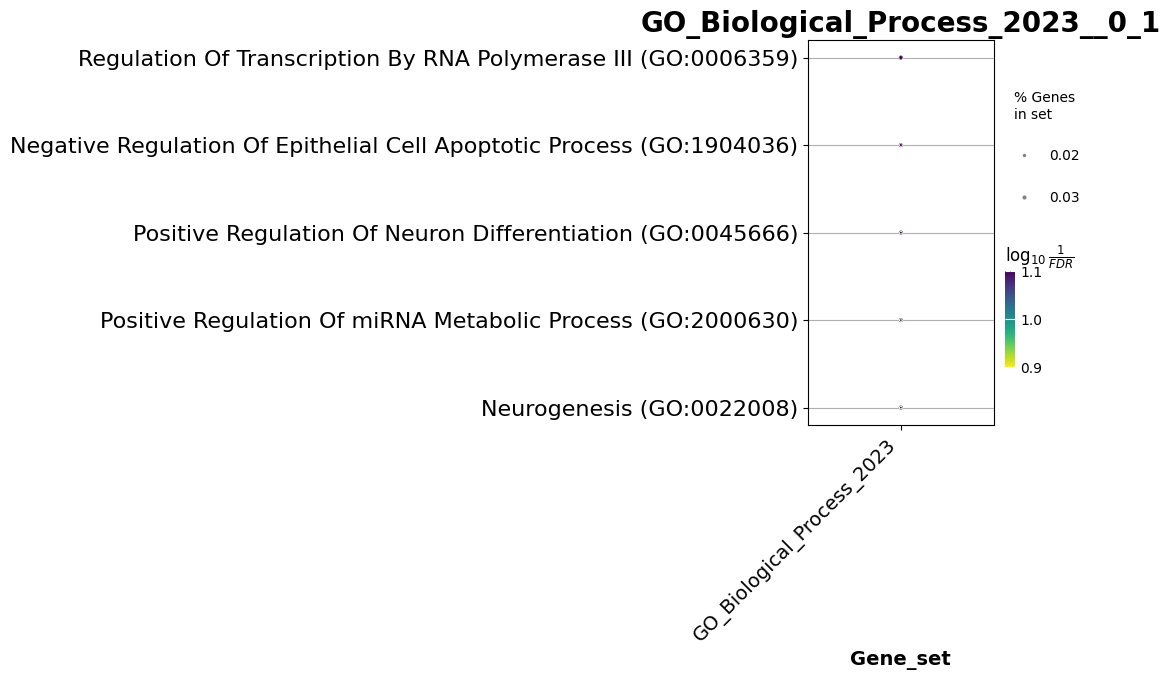

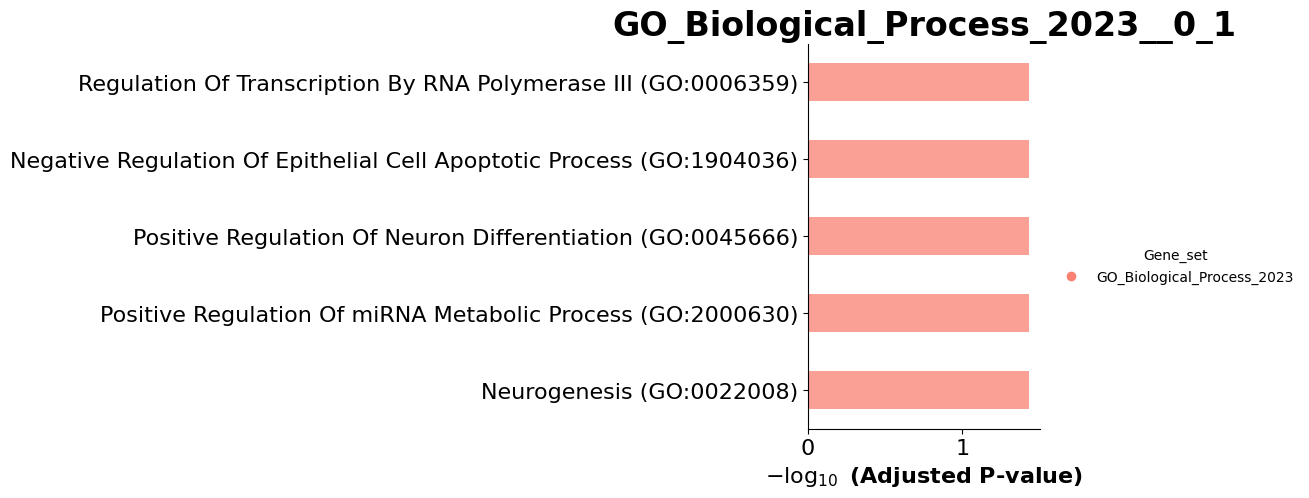

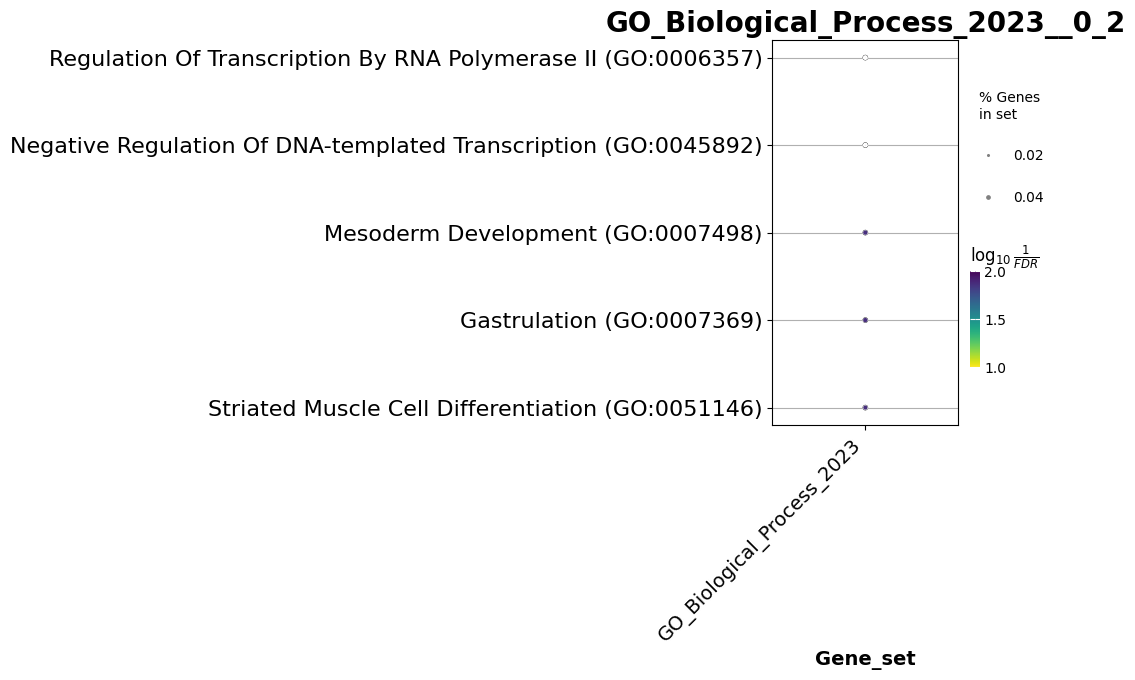

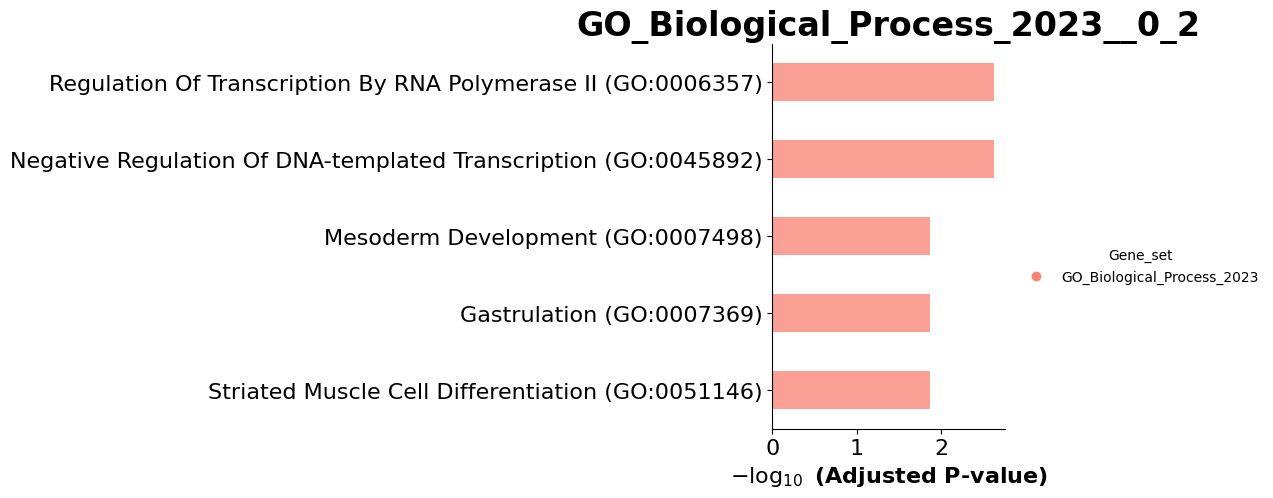

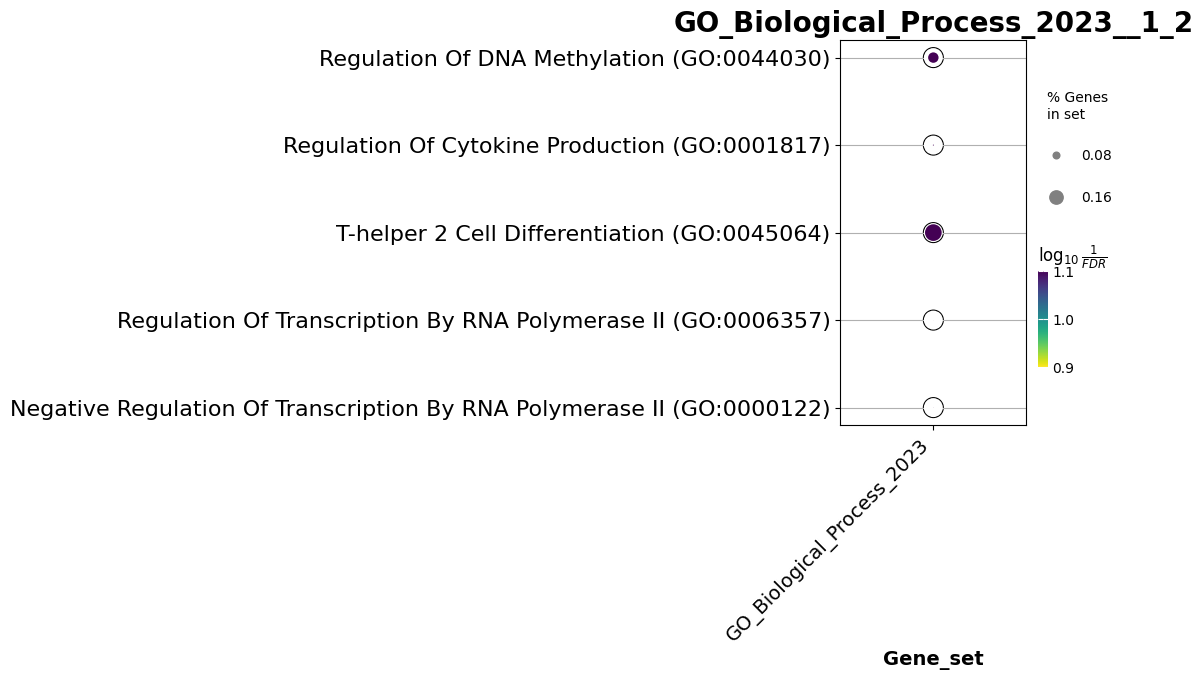

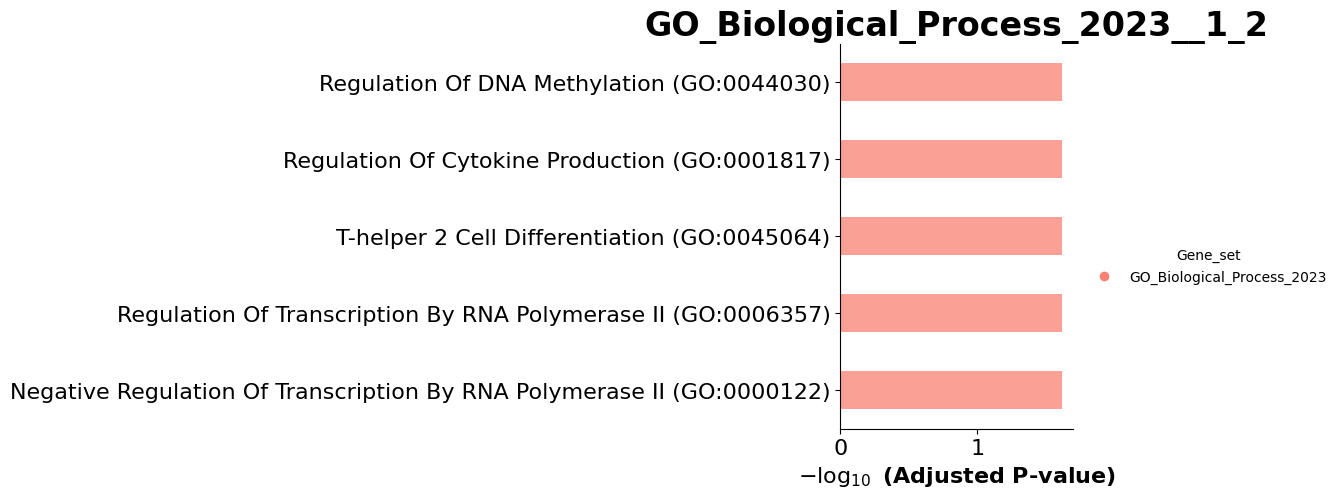

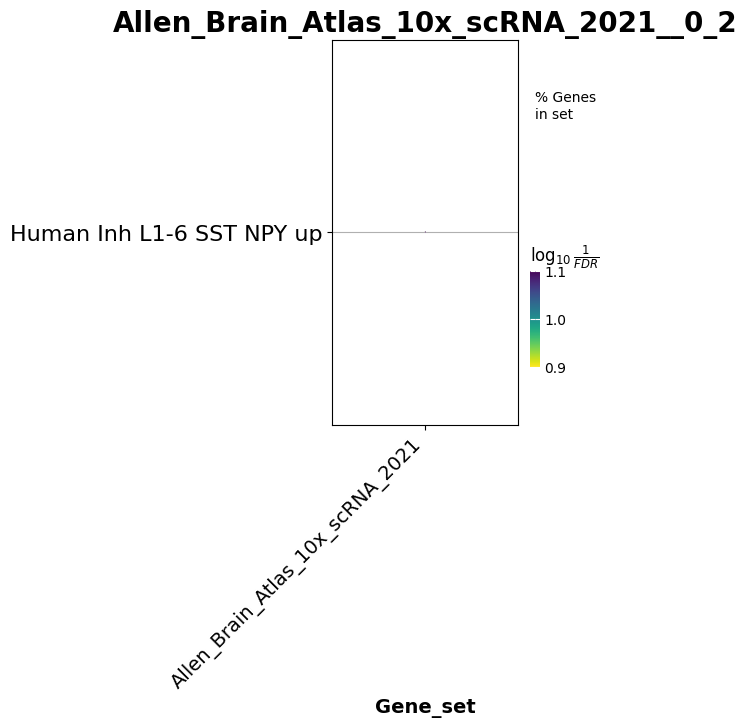

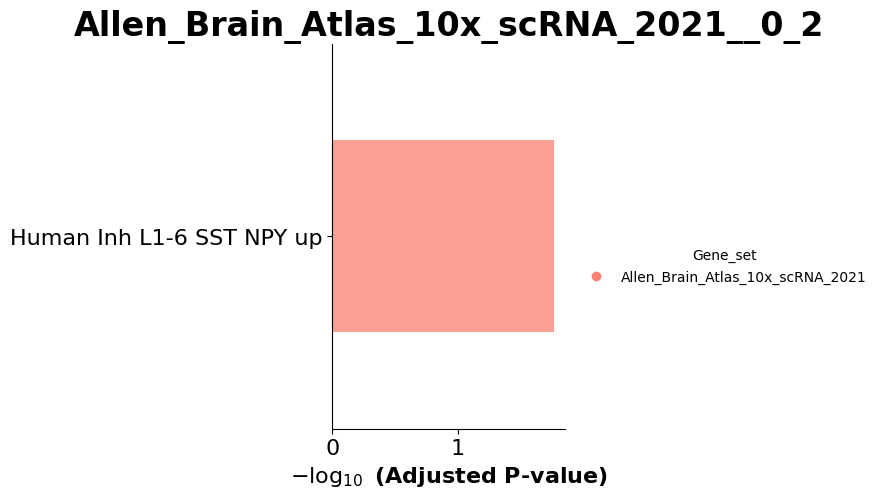

In [72]:
from gseapy import barplot, dotplot

databases = ['WikiPathway_2023_Human', 'Reactome_2022', 'OMIM_Disease', 'KEGG_2021_Human', 'GO_Molecular_Function_2023', 'GO_Cellular_Component_2023',
             'GO_Biological_Process_2023', 'DisGeNET', 'Allen_Brain_Atlas_10x_scRNA_2021']


for i in databases:
    dataframe_tf_0_1= return_enriched_pathways(filtered_tf_set_0_1, adj_p_value = 0.05, gene_sets_databases =[i])
    dataframe_tf_0_2= return_enriched_pathways(filtered_tf_set_0_2, adj_p_value = 0.05, gene_sets_databases =[i])
    dataframe_tf_1_2= return_enriched_pathways(filtered_tf_set_1_2, adj_p_value = 0.05, gene_sets_databases =[i])

    # Plot the results for each gene set comparison
    try:
        plot_dotplot(dataframe_tf_0_1,size=10,top_term=5,fig_size=(3,5), title=str(i)+'_'+'_0_1')
        plot_barplot(dataframe_tf_0_1,size=10,top_term=5,fig_size=(3,5), title=str(i)+'_'+'_0_1')
    except:
        print('No significant results for', i, '_0_1')
    try:
        plot_dotplot(dataframe_tf_0_2,size=10,top_term=5,fig_size=(3,5), title=str(i)+'_'+'_0_2')
        plot_barplot(dataframe_tf_0_2,size=10,top_term=5,fig_size=(3,5), title=str(i)+'_'+'_0_2')
    except:
        print('No significant results for', i, '_0_2')
    
    try:
        plot_dotplot(dataframe_tf_1_2,size=10,top_term=5,fig_size=(3,5), title=str(i)+'_'+'_1_2')
        plot_barplot(dataframe_tf_1_2,size=10,top_term=5,fig_size=(3,5), title=str(i)+'_'+'_1_2')
    except:
        print('No significant results for', i, '_1_2')





Group: ENSG00000162992
310
['CYP51A1', 'MAD1L1', 'M6PR', 'ICA1', 'REXO5', 'ZNF263', 'AGPS', 'OSBPL5', 'LRRC7', 'SLC4A7', 'CAPG', 'NGEF', 'IDH3G', 'ROCK1', 'TCF3', 'FAM50A', 'IL4R', 'OSBPL6', 'PHLPP1', 'GRHL2', 'CHMP5', 'KLHL42', 'SIGLEC1', 'MAVS', 'PXN', 'OSBPL8', 'KRT31', 'TMEM14A', 'SEPTIN3', 'MCAT', 'TSPO', 'IFT27', 'ASB2', 'GSKIP', 'TRPC4AP', 'PRPF6', 'RASSF2', 'PAK5', 'FGF9', 'ELMO3', 'NUTF2', 'USP10', 'CLPTM1', 'LIN7B', 'IL27RA', 'SUGP1', 'ADAP1', 'CHCHD2', 'SPOCK2', 'SORCS1', 'TMEM97', 'MVK', 'CDKN1B', 'TPI1', 'NCOA7', 'CAP2', 'MDFI', 'HBEGF', 'GABRG2', 'ARL6', 'ARMC8', 'CBLB', 'DNAH1', 'SLC4A3', 'GCA', 'TTC31', 'TLX2', 'IL1RL1', 'IL18R1', 'PLCL1', 'DHCR24', 'GALE', 'UTP25', 'STMN1', 'C1orf54', 'FBXO30', 'ABCD4', 'FAM98A', 'MOB3B', 'FABP3', 'HPCA', 'OBSL1', 'MIF4GD', 'DTD1', 'BPIFB9P', 'TRAP1', 'KDM4B', 'DGCR6L', 'MPST', 'STRIP2', 'TMOD2', 'CCNT1', 'NGDN', 'HEATR5A', 'SHFL', 'BRME1', 'ENOSF1', 'MED10', 'LPIN1', 'CTSL', 'PRR5L', 'CCDC142', 'CCM2', 'GARNL3', 'GABBR2', 'TLR2', 'AR

/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.


Group: ENSG00000168874
422
['CYP51A1', 'MAD1L1', 'M6PR', 'ICA1', 'REXO5', 'ZNF263', 'IDS', 'PTBP1', 'AGPS', 'OSBPL5', 'SLC45A4', 'LRRC7', 'SLC4A7', 'CAPG', 'WWC3', 'RRM2B', 'NEXMIF', 'MCF2L2', 'NGEF', 'IDH3G', 'ROCK1', 'TCF3', 'FAM50A', 'GRAMD4', 'IL4R', 'OSBPL6', 'DELE1', 'PHLPP1', 'GRHL2', 'CHMP5', 'KLHL42', 'FER1L4', 'SIGLEC1', 'MAVS', 'PXN', 'OSBPL8', 'KRT31', 'NUBP2', 'TMEM14A', 'CCDC134', 'SEPTIN3', 'MCAT', 'TSPO', 'IFT27', 'HDAC10', 'ASB2', 'GSKIP', 'TRPC4AP', 'PRPF6', 'RASSF2', 'PAK5', 'FGF9', 'ELMO3', 'NUTF2', 'USP10', 'CLPTM1', 'LIN7B', 'IL27RA', 'SUGP1', 'ADAP1', 'CRHR2', 'CHCHD2', 'URGCP', 'SPOCK2', 'SORCS1', 'TMEM97', 'MVK', 'CDKN1B', 'TBC1D30', 'TPI1', 'NCOA7', 'CAP2', 'MDFI', 'HBEGF', 'PDE8B', 'GABRG2', 'ARL6', 'ARMC8', 'CBLB', 'SCAP', 'DNAH1', 'SLC4A3', 'IFIH1', 'GCA', 'TTC31', 'TLX2', 'IL1RL1', 'IL18R1', 'PLCL1', 'DHCR24', 'HPCAL4', 'GALE', 'SLC19A2', 'CNN3', 'UTP25', 'STMN1', 'C1orf54', 'CNR1', 'FBXO30', 'PTPA', 'ALG2', 'ABCD4', 'FAM98A', 'MOB3B', 'FABP3', 'HPCA', 'D

/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.


Group: ENSG00000172845
1
['PANX1']


/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.


Group: ENSG00000178935
359
['CRLF1', 'CACNA2D2', 'FAM76A', 'SPRTN', 'MBTD1', 'PRICKLE3', 'MAN2B2', 'NUB1', 'RALBP1', 'SLC11A1', 'ZDHHC6', 'B4GALT7', 'PSMA4', 'GOPC', 'COL9A2', 'KIF1B', 'KCNH2', 'OGFR', 'SNRNP40', 'BCAT1', 'BTBD1', 'ZMYND12', 'FECH', 'IDH3G', 'FGF22', 'NDST1', 'PTPN18', 'LIMS2', 'SLC25A40', 'PAG1', 'STXBP2', 'ACER3', 'TULP3', 'PIBF1', 'CHMP5', 'TXLNG', 'PIGS', 'ADD1', 'DOCK3', 'FXYD5', 'ARHGAP4', 'CCNK', 'SPAG7', 'ORC6', 'MKNK2', 'GRK3', 'PAPLN', 'PPP4R3A', 'PYGB', 'DIDO1', 'ADNP2', 'ELF4', 'PCYT1B', 'SYTL4', 'SEC14L5', 'PPP1R37', 'TNNT1', 'TMEM205', 'SIPA1L3', 'CDK6', 'TBL2', 'APBA1', 'PALD1', 'NUFIP2', 'BLMH', 'TMEM97', 'NFKB1', 'ZNF330', 'INPP4B', 'PRDM4', 'HINT3', 'MDN1', 'WASF1', 'ERBIN', 'HMGCS1', 'BRD8', 'WWC1', 'CSPG5', 'MAPKAPK3', 'COMMD2', 'FAHD2A', 'TACR1', 'RALGPS2', 'RO60', 'BLZF1', 'NSL1', 'HMGN3', 'PIGZ', 'PPP6C', 'RBM18', 'NR2C1', 'HNRNPA2B1', 'WIPF3', 'GLIPR2', 'SLC12A4', 'STAU1', 'SLC25A19', 'RBM42', 'RAP1B', 'TUBA4A', 'MTERF1', 'YWHAH', 'GAMT', 'PHF1

/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(



Group: ENSG00000198429
430

Group: ENSG00000251247
154
['ATOSB', 'IFRD1', 'GTF2IRD1', 'PAF1', 'TDP1', 'PTPRN', 'BCAT1', 'SLC12A2', 'PABPC1', 'SEPHS1', 'SLC23A2', 'GCN1', 'IGBP1', 'NAT14', 'ANKRD54', 'MLC1', 'PPM1A', 'PPP4R3A', 'TRIP11', 'TNFSF13B', 'DHODH', 'UBFD1', 'GSDMD', 'TNPO2', 'PPP1R9B', 'PANX1', 'UNC50', 'TAF1B', 'SLC1A4', 'TCEANC2', 'TMEM59', 'ZNF684', 'OSBPL9', 'KMT2A', 'GTF3C3', 'TRPM6', 'INVS', 'OGFRL1', 'DNAJC15', 'ETF1', 'MTERF4', 'NT5C3A', 'CHST3', 'SSPN', 'GRM4', 'SEPTIN6', 'CCDC32', 'CDK7', 'ARF3', 'C9orf40', 'TMEM243', 'TAF5L', 'ZFHX2', 'TMOD1', 'MTCH1', 'NARS2', 'TTLL7', 'FAM222A', 'COMMD4', 'CRTC3', 'HDGF', 'ANXA9', 'SCCPDH', 'EXOC6B', 'GRIP2', 'MEGF10', 'CRB2', 'TNKS1BP1', 'TBRG1', 'PRKCA', 'PIP4P2', 'VBP1', 'F11R', 'CIART', 'RECQL4', 'LRRC14', 'RPL8', 'SAP30BP', 'GABRG1', 'GUCY1A1', 'NIPBL', 'BRI3', 'SCN3B', 'WDR88', 'GATAD2A', 'PXK', 'DNAJC21', 'TMEM129', 'CEP120', 'SLC50A1', 'TM2D2', 'SF3B5', 'ALK', 'C5orf34', 'RAB37', 'TOMM20', 'DNAJC30', 'ZNF843', 'ZBTB34', '

/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.

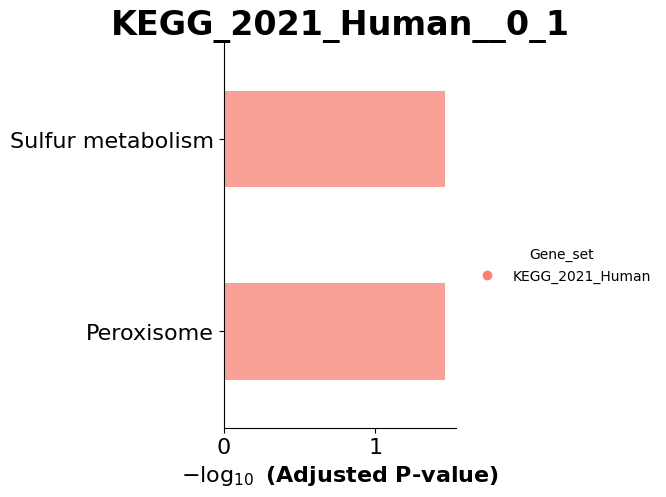

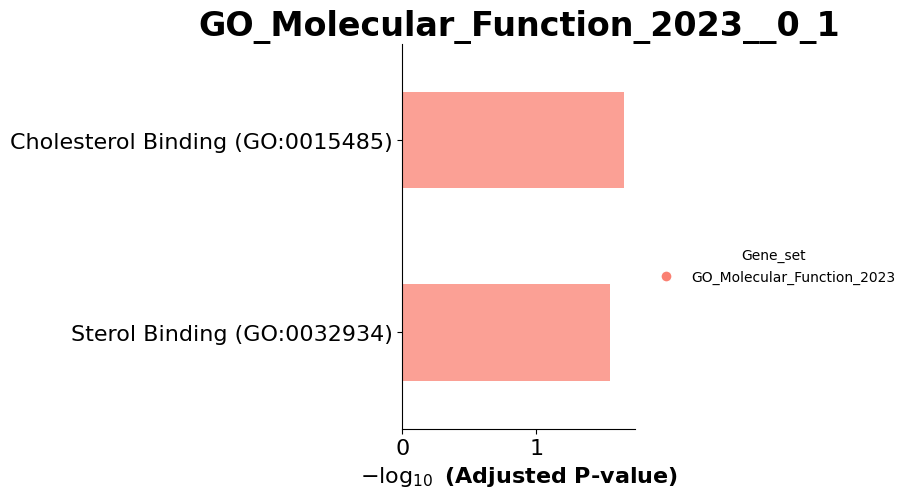

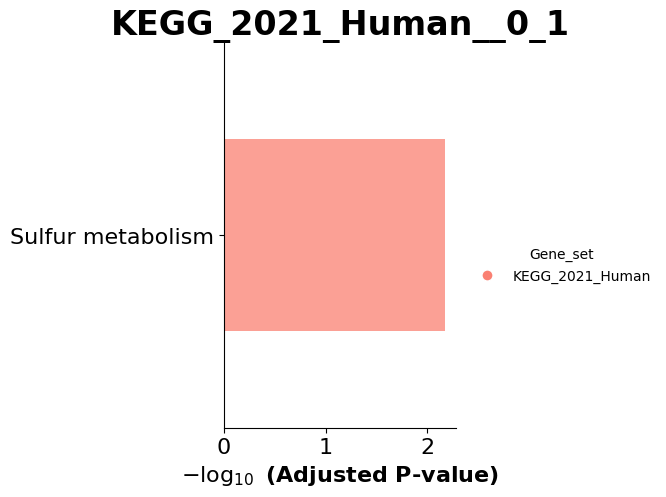

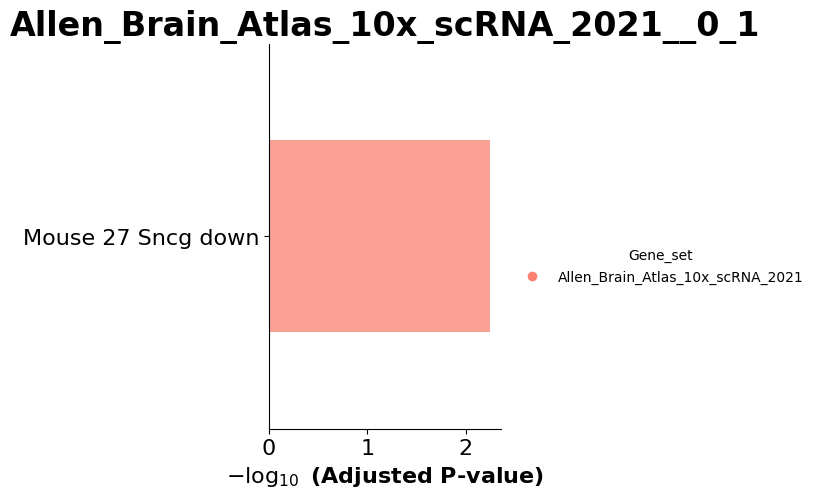

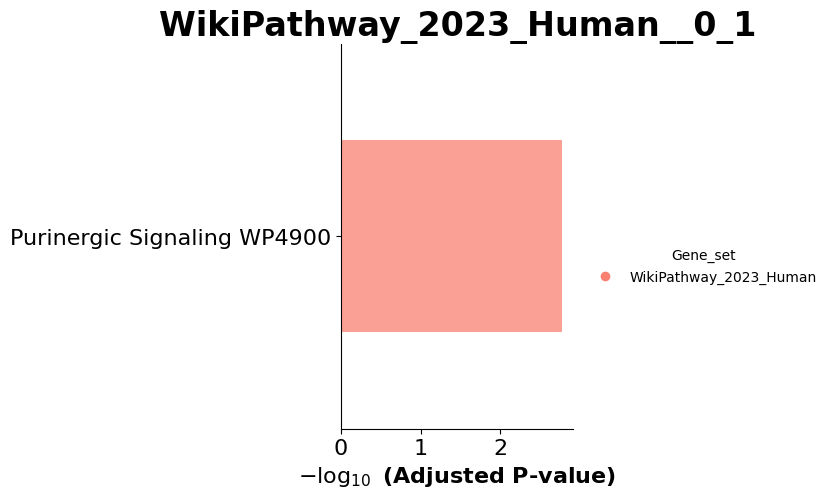

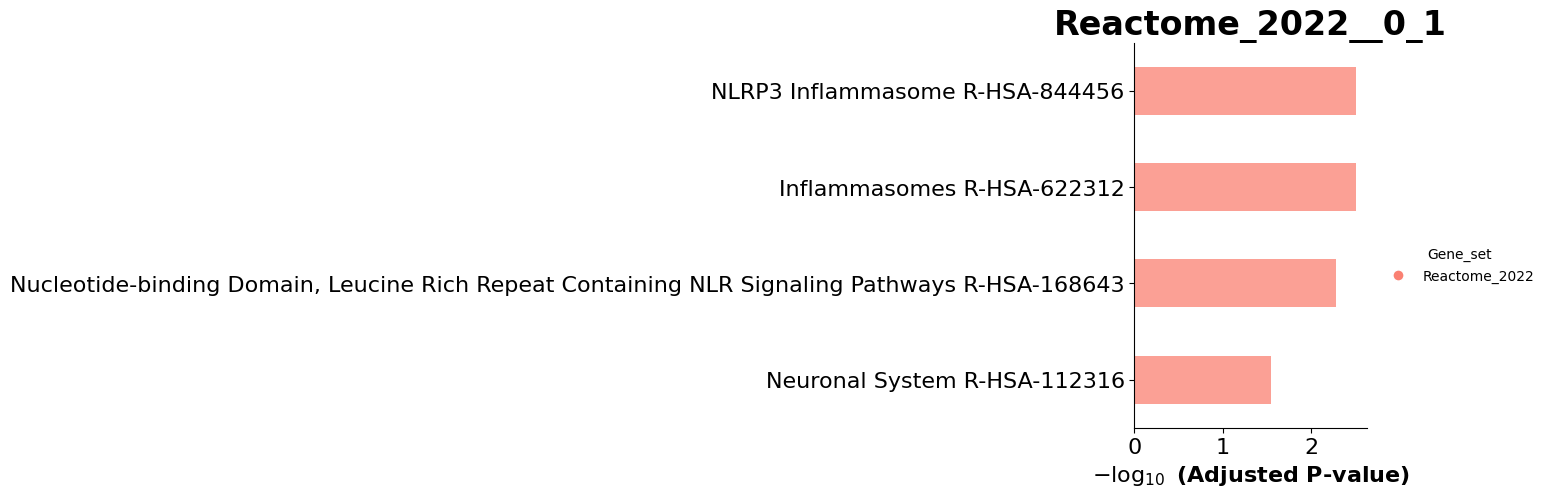

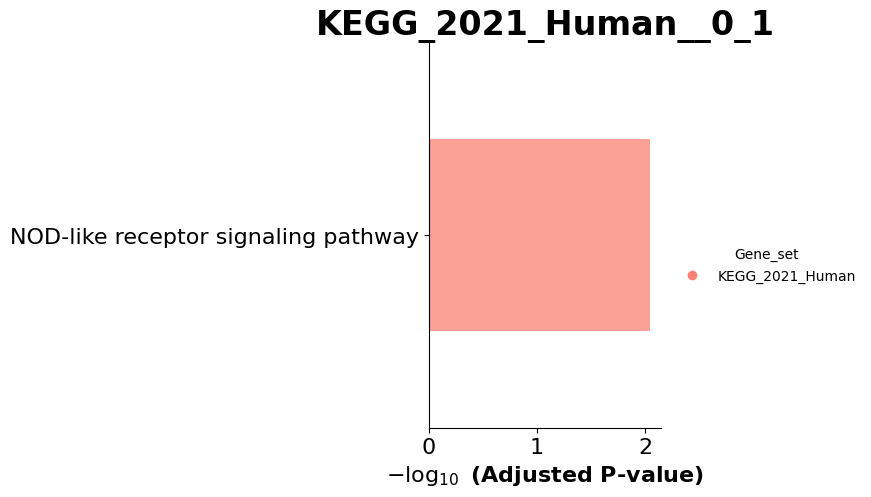

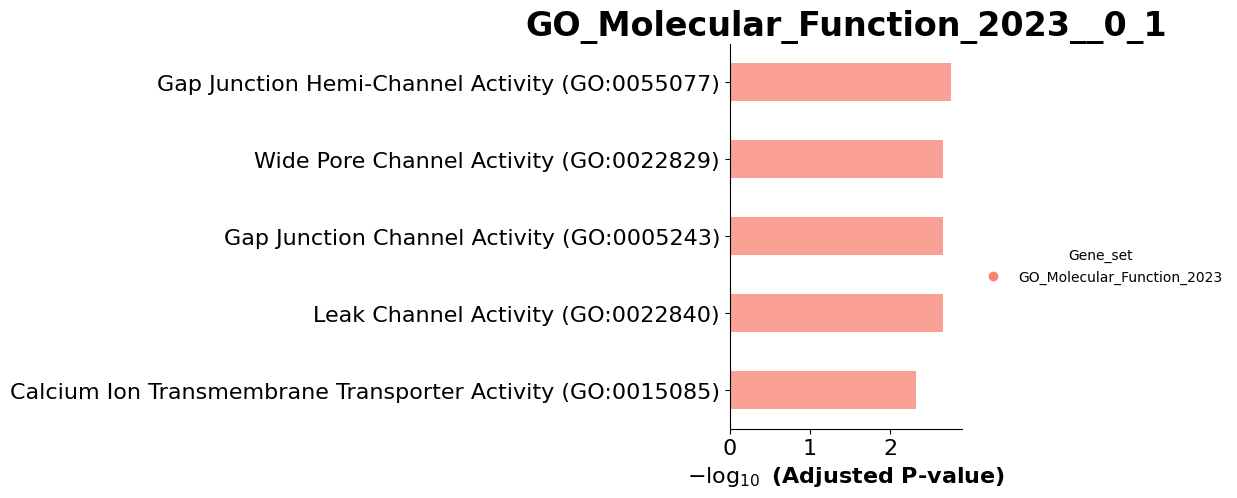

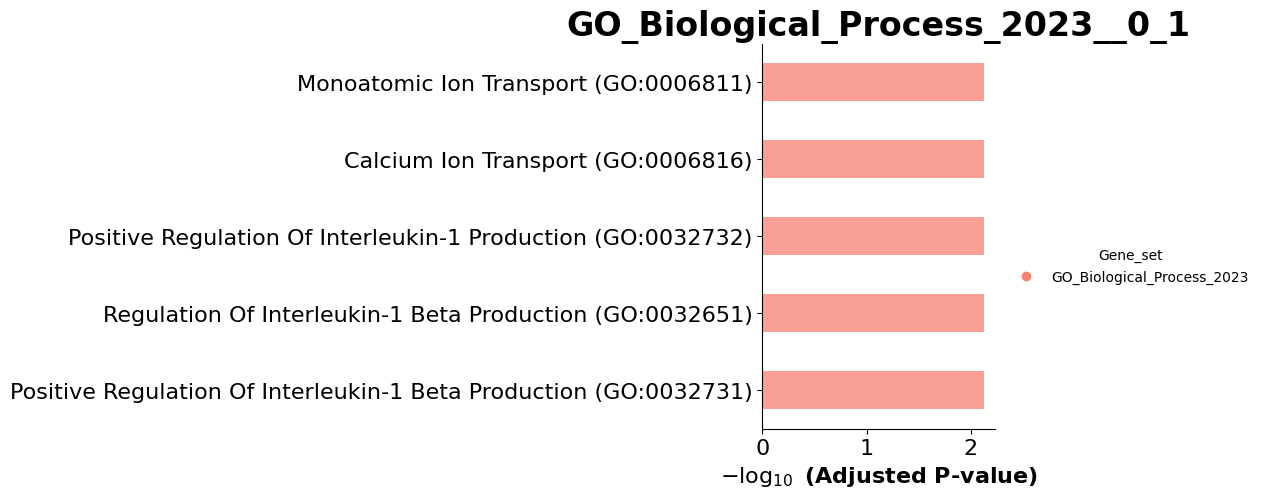

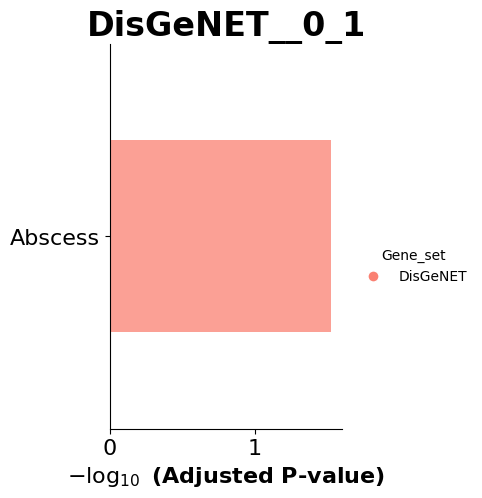

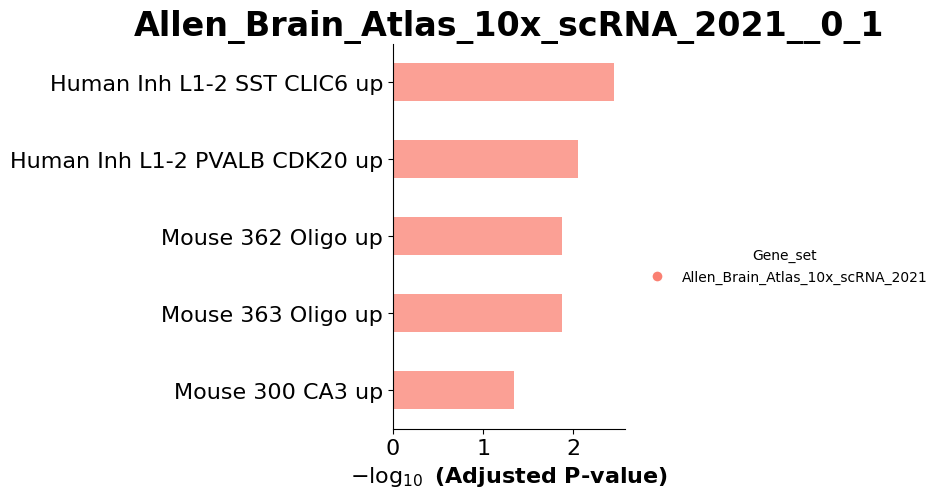

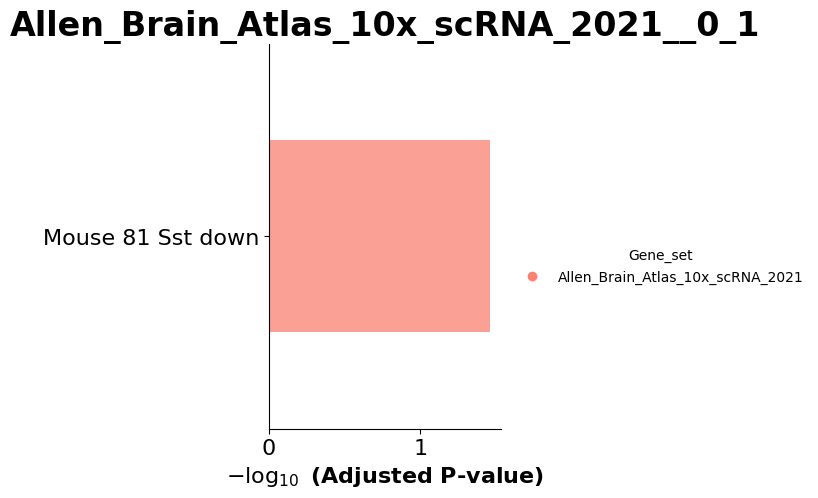

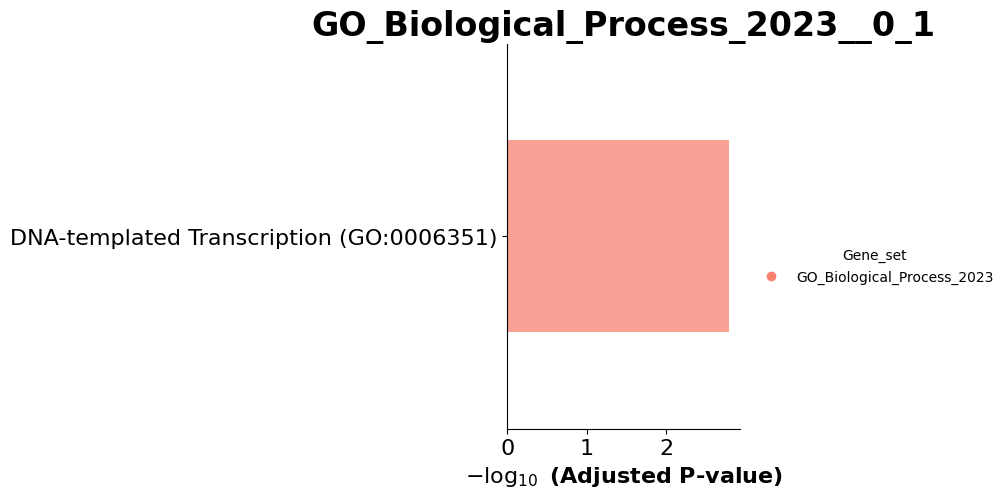

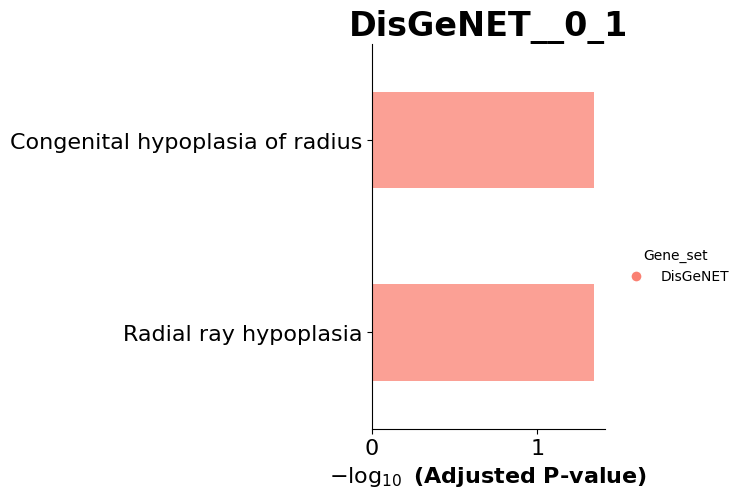

In [73]:
grouped = aggregate_network[aggregate_network.TF.isin(important_TF_0_1)].groupby('TF')
dataframe_0_1 = 0
for name, group in grouped:
    print(f"\nGroup: {name}")
    filtered_gene_set = list(group['Gene'].values)
    print(len(filtered_gene_set))
    try:
     filtered_gene_set = return_gene_name(filtered_gene_set)
    except:
        continue
    print(filtered_gene_set)
    databases = ['WikiPathway_2023_Human', 'Reactome_2022', 'OMIM_Disease', 'KEGG_2021_Human', 'GO_Molecular_Function_2023', 'GO_Cellular_Component_2023',
             'GO_Biological_Process_2023', 'DisGeNET', 'Allen_Brain_Atlas_10x_scRNA_2021']
    
    for i in databases:

        dataframe_tf_gene_0_1 = return_enriched_pathways(filtered_gene_set, adj_p_value = 0.05, gene_sets_databases =[i])
        
      
        try:
            plot_barplot(dataframe_tf_gene_0_1,size=10,top_term=5,fig_size=(3,5), title=str(i)+'_'+'_0_1')
        except:
            continue
        if isinstance(dataframe_0_1, pd.DataFrame):
            dataframe_0_1 = pd.concat([dataframe_0_1,dataframe_tf_gene_0_1])
        else:
            
            dataframe_0_1 = dataframe_tf_gene_0_1


Group: ENSG00000139651
170
['GCLC', 'SOX8', 'DLX6', 'CD9', 'CLCN6', 'GINM1', 'POLR3E', 'POLR1A', 'MBD3', 'EPN2', 'GRAMD4', 'IL12RB2', 'SMAP2', 'HADHA', 'DNAJA1', 'STRN4', 'AARS1', 'DLD', 'PITPNM3', 'CD200', 'TMED1', 'ATP5F1D', 'RASL10A', 'TRIM9', 'LGMN', 'NFKBIA', 'GMPR2', 'NDUFAF5', 'RHBDL1', 'FZD3', 'TIMM44', 'PIAS4', 'RAB3A', 'BLVRA', 'LHX2', 'FBXL15', 'UBTF', 'GABRA4', 'RAPGEF2', 'GLI1', 'CPSF6', 'ZNF346', 'BCL6', 'ATP6V1A', 'ACTR3', 'ACVR1', 'GLS', 'PRRX1', 'CHD5', 'SFPQ', 'RCOR3', 'SLC16A7', 'PIK3CA', 'VAPB', 'WRNIP1', 'NRN1', 'MRPS7', 'GTF3C4', 'GRIA3', 'MAX', 'BECN1', 'ZNF384', 'SEM1', 'UCK1', 'ACTR10', 'PNISR', 'SNAP25', 'AGAP3', 'HRK', 'LRCH1', 'MMD2', 'DMAC1', 'FRS3', 'LRRC49', 'RITA1', 'MTMR6', 'REM2', 'CACNG8', 'ITPKB', 'PIK3R1', 'RASA1', 'GNA12', 'ZNF41', 'PLCH2', 'KIRREL3', 'FERMT3', 'GABRA2', 'PFKM', 'PELO', 'GPR180', 'ENAH', 'ELOC', 'C16orf87', 'FZD7', 'EEF1A1', 'FBXW5', 'ARHGAP27', 'NR2F6', 'GAB3', 'TAL1', 'TFB2M', 'MAPKAPK2', 'TMEM74', 'ZMAT4', 'API5', 'NETO1', 'TME

/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.


Group: ENSG00000166823
182
['MTMR7', 'CNTN1', 'FAS', 'POU2F2', 'RPL26L1', 'WDR37', 'HDAC9', 'IL17RB', 'GPBP1', 'FRMPD1', 'TRIP13', 'WSCD2', 'PLD1', 'DLG1', 'MOK', 'PDS5B', 'WHRN', 'TSPAN15', 'HNRNPM', 'PALM', 'SYNGR1', 'PIGU', 'ADNP2', 'ENTREP2', 'GDAP1', 'MIER2', 'RND2', 'LRP2BP', 'UGDH', 'RPS13', 'PRDM4', 'CDKN1B', 'DDX55', 'RFC5', 'LNPEP', 'RAD1', 'GNAI2', 'MPV17', 'GNLY', 'PLA2G4A', 'OSCP1', 'PADI2', 'SFRP5', 'TEK', 'ZNF706', 'AKAP1', 'SLC12A5', 'NECAB3', 'SGPP1', 'PDLIM4', 'MGAT1', 'CC2D1A', 'HSD17B7', 'HAPLN2', 'PEMT', 'RLIG1', 'ECHDC3', 'TMOD1', 'CNPY3', 'CMTR1', 'RIPK1', 'SEMA6D', 'STAT4', 'CDKL2', 'ANXA3', 'TAPBPL', 'MARCHF9', 'SCAMP2', 'MBD1', 'NTN5', 'CAPN10', 'SUSD4', 'CEP170', 'UBR3', 'GOLGA4', 'ALDH1L1', 'CBR4', 'PCYOX1L', 'NHP2', 'INIP', 'ATM', '', 'FAM124A', 'SLC7A11', 'ITIH2', 'DCLRE1C', 'CAMK4', 'FAM167A', 'OBSCN', 'C21orf91', 'UQCRB', 'C12orf43', 'PEX10', 'ESYT3', 'CBR1', 'PADI4', 'SLC37A1', 'VPS11', 'PRPSAP1', 'ZNF496', 'TMEM169', 'SENP2', 'PLXNB1', 'SYK', 'DIPK1B'

/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.


Group: ENSG00000251247
154
['ATOSB', 'IFRD1', 'GTF2IRD1', 'PAF1', 'TDP1', 'PTPRN', 'BCAT1', 'SLC12A2', 'PABPC1', 'SEPHS1', 'SLC23A2', 'GCN1', 'IGBP1', 'NAT14', 'ANKRD54', 'MLC1', 'PPM1A', 'PPP4R3A', 'TRIP11', 'TNFSF13B', 'DHODH', 'UBFD1', 'GSDMD', 'TNPO2', 'PPP1R9B', 'PANX1', 'UNC50', 'TAF1B', 'SLC1A4', 'TCEANC2', 'TMEM59', 'ZNF684', 'OSBPL9', 'KMT2A', 'GTF3C3', 'TRPM6', 'INVS', 'OGFRL1', 'DNAJC15', 'ETF1', 'MTERF4', 'NT5C3A', 'CHST3', 'SSPN', 'GRM4', 'SEPTIN6', 'CCDC32', 'CDK7', 'ARF3', 'C9orf40', 'TMEM243', 'TAF5L', 'ZFHX2', 'TMOD1', 'MTCH1', 'NARS2', 'TTLL7', 'FAM222A', 'COMMD4', 'CRTC3', 'HDGF', 'ANXA9', 'SCCPDH', 'EXOC6B', 'GRIP2', 'MEGF10', 'CRB2', 'TNKS1BP1', 'TBRG1', 'PRKCA', 'PIP4P2', 'VBP1', 'F11R', 'CIART', 'RECQL4', 'LRRC14', 'RPL8', 'SAP30BP', 'GABRG1', 'GUCY1A1', 'NIPBL', 'BRI3', 'SCN3B', 'WDR88', 'GATAD2A', 'PXK', 'DNAJC21', 'TMEM129', 'CEP120', 'SLC50A1', 'TM2D2', 'SF3B5', 'ALK', 'C5orf34', 'RAB37', 'TOMM20', 'DNAJC30', 'ZNF843', 'ZBTB34', 'AP3S1', 'FAM220A', 'ZNF664',

/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.


Group: ENSG00000256223
251
['ARF5', 'ZMYND10', 'CREBBP', 'MRC2', 'PLEKHB1', 'SLC45A4', 'GRAMD1B', 'BTN3A1', 'TFB1M', 'FUT8', 'DTNBP1', 'LMO3', 'CA11', 'BCL3', 'RNF126', 'PPP2R3A', 'PUM3', 'XPO1', 'NKAIN1', 'MAPRE3', 'FTL', 'RBM41', 'WDR7', 'SMIM24', 'NRP1', 'RBFOX2', 'CINP', 'PRORP', 'GSS', 'ARFGAP1', 'COL20A1', 'CDH20', 'TAF1C', 'PIEZO1', 'SALL1', 'TOX3', 'SF3A2', 'TRMT1', 'ZFR2', 'CD33', 'CFAP69', 'ZNF862', 'SUSD1', 'KDM4C', 'NPM3', 'CAMTA2', 'MMD', 'PMP22', 'NFKB1', 'EHD1', 'CEP164', 'PRPF40B', 'GLI1', 'FOXM1', 'HDDC2', 'CLK4', 'CCNG1', 'PCCB', 'ACAP2', 'CFAP92', 'PSMD14', 'HDLBP', 'COX7A2L', 'ASH1L', 'GPR89A', 'PRRC2C', 'PLPPR4', 'CASP8AP2', 'SLC16A7', 'IQSEC3', 'KCNJ8', 'POLK', 'OCRL', 'SRSF6', 'EDN3', 'KIRREL2', 'NR1D1', 'FLRT1', 'UBR4', 'MRPS12', 'PDE11A', 'THAP10', 'LOXL1', 'KLK14', 'PRKCSH', 'ARHGEF9', 'CHMP1A', 'PTCD3', 'GRSF1', 'VSTM2L', 'SCO1', 'KMT5C', 'MRAP2', 'CD63', 'B4GALNT1', 'EMX1', 'ZNG1B', 'ADAM10', 'LEF1', 'CBLN3', 'DCAF5', 'PIF1', 'PML', 'SLC14A1', 'CSNK1D', 'AR

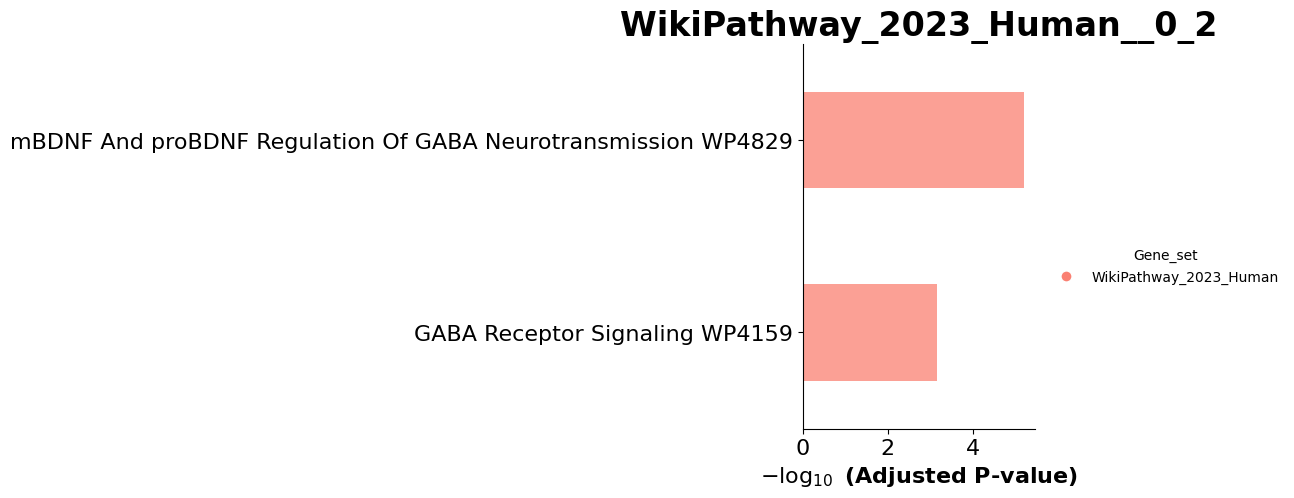

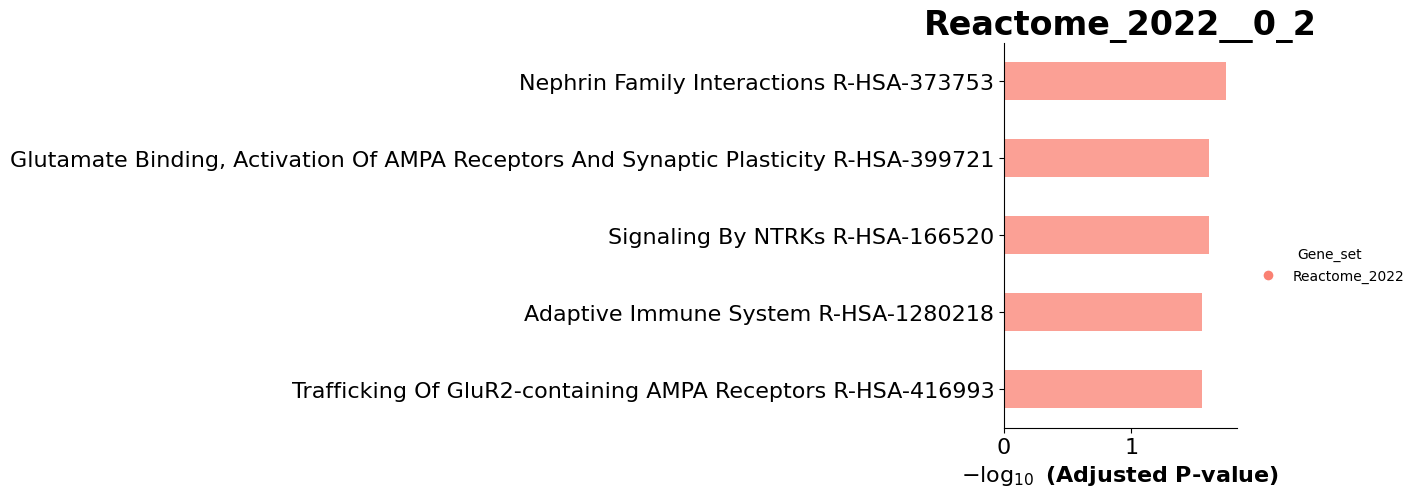

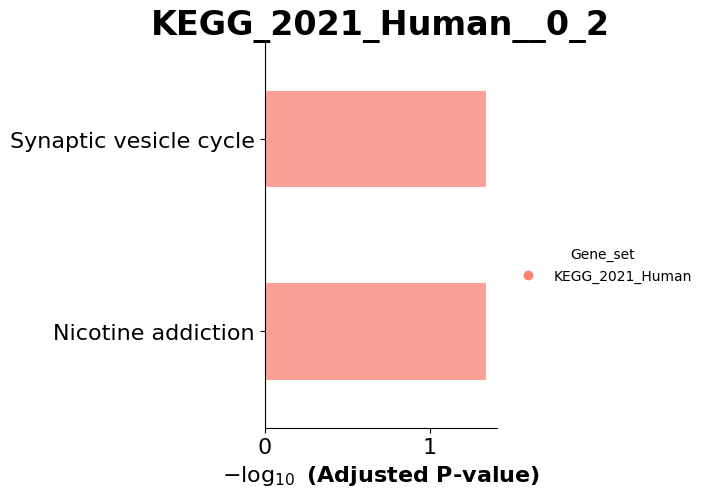

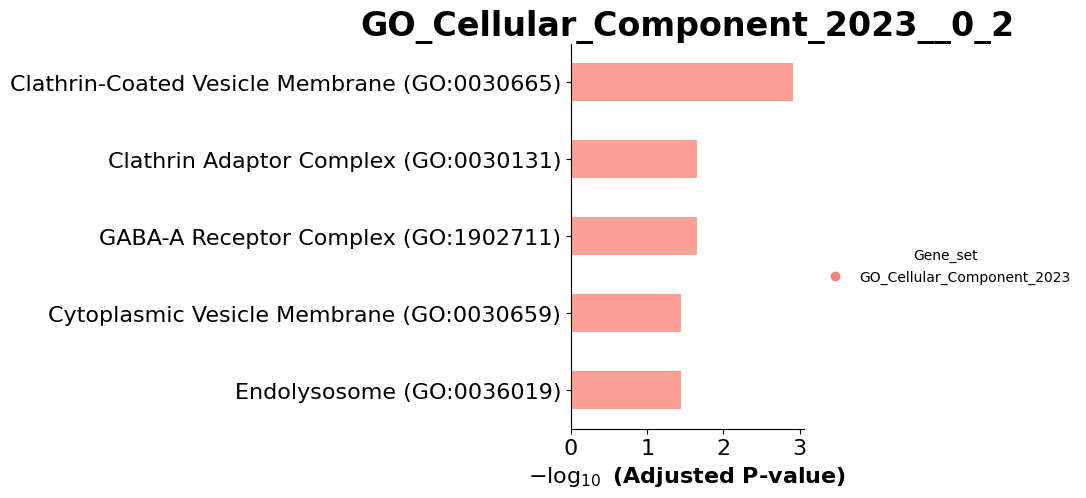

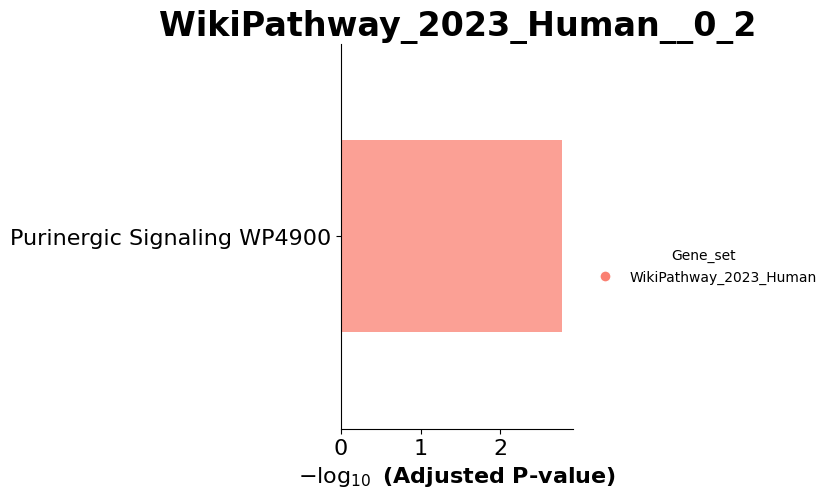

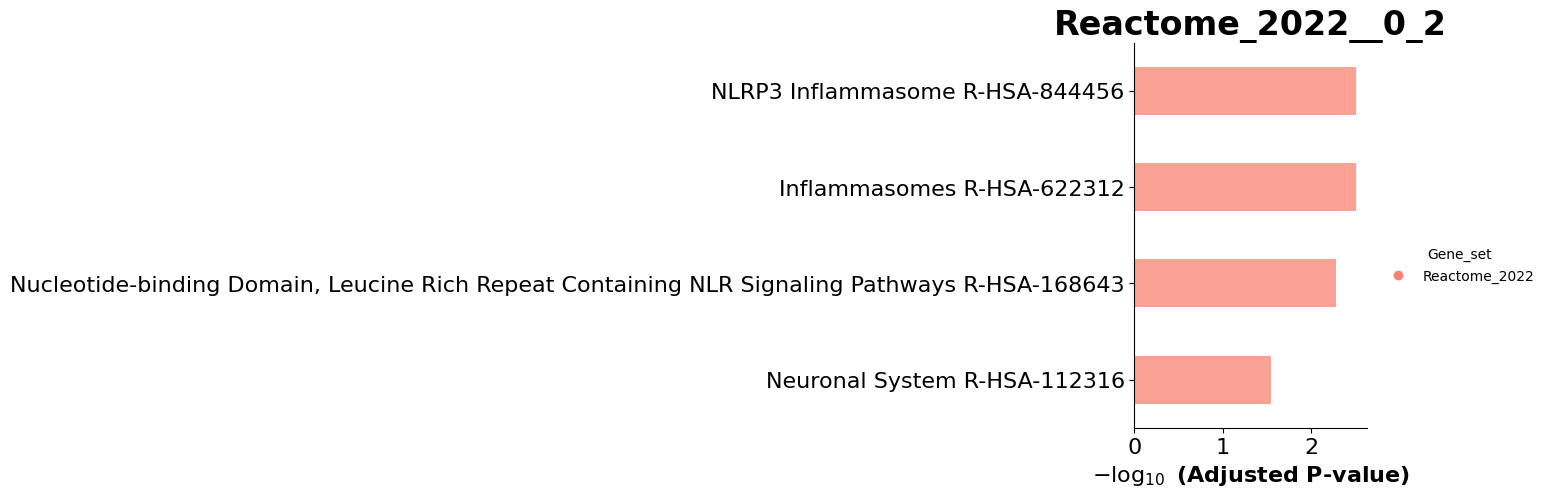

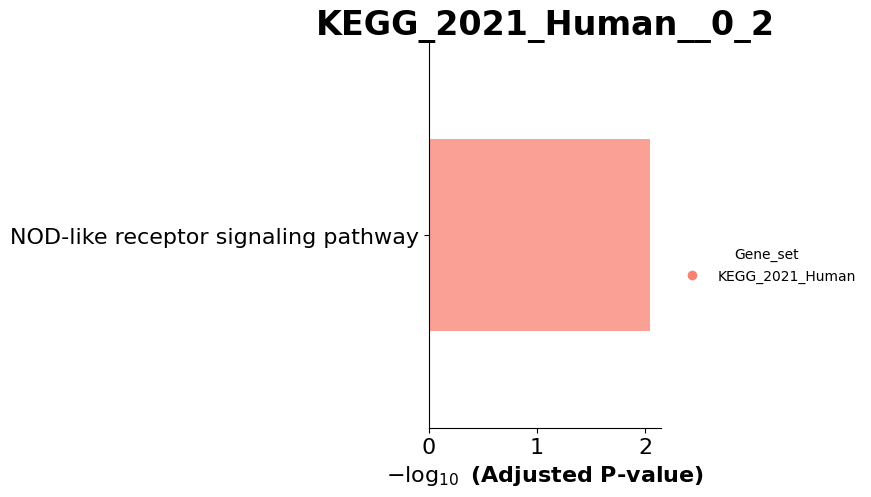

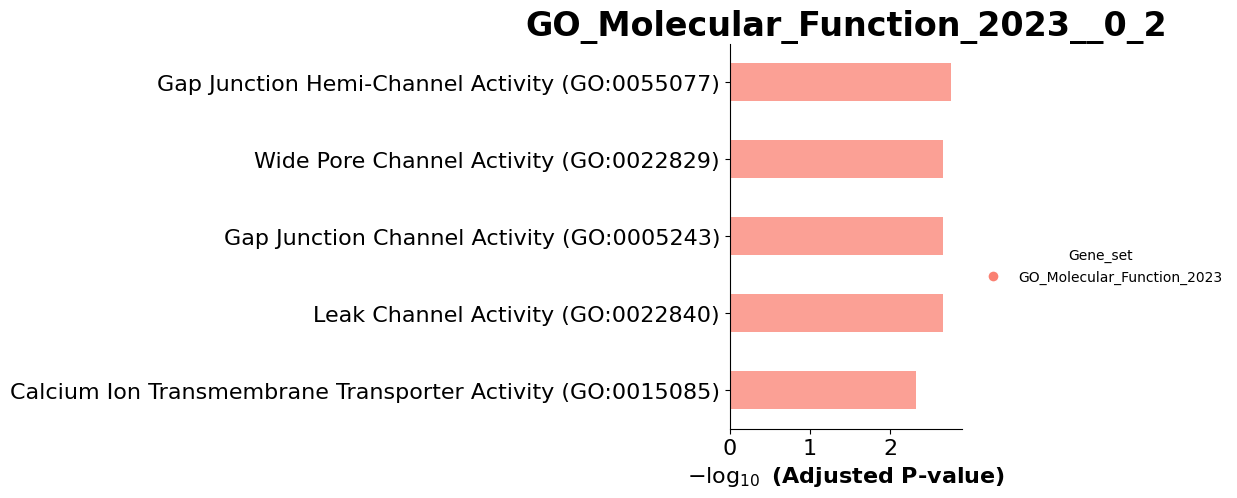

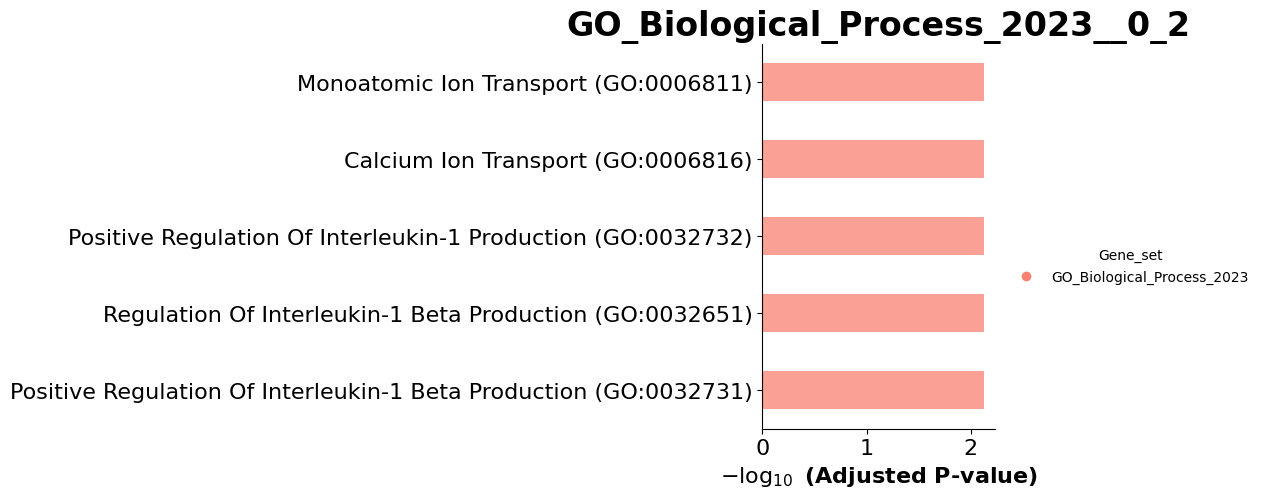

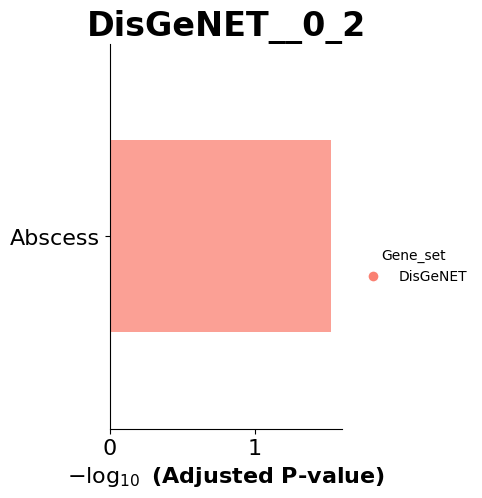

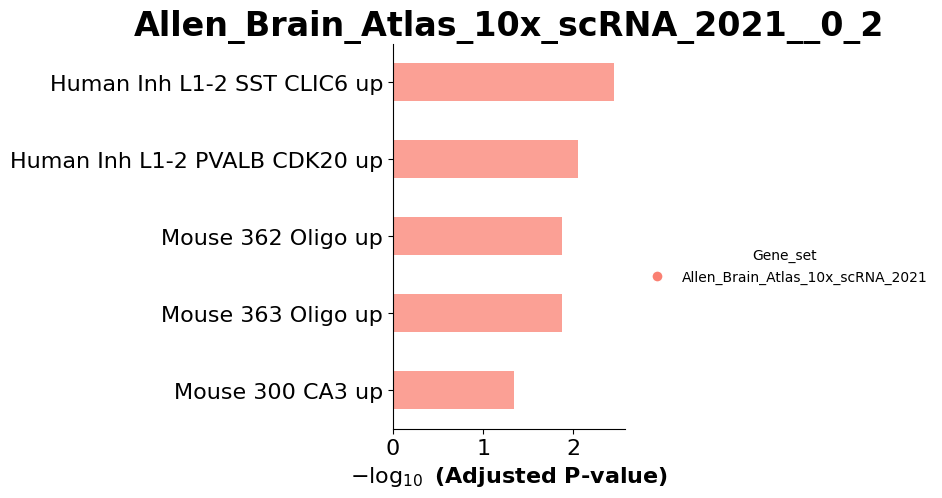

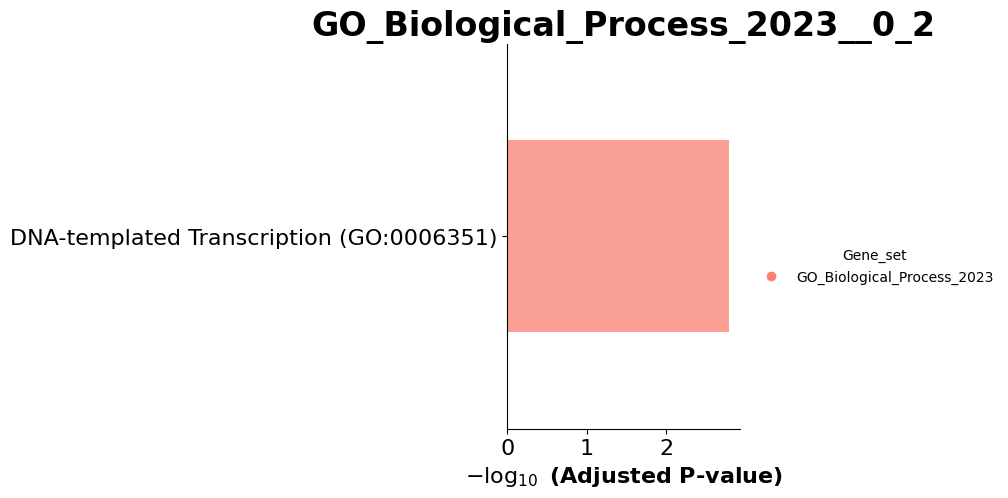

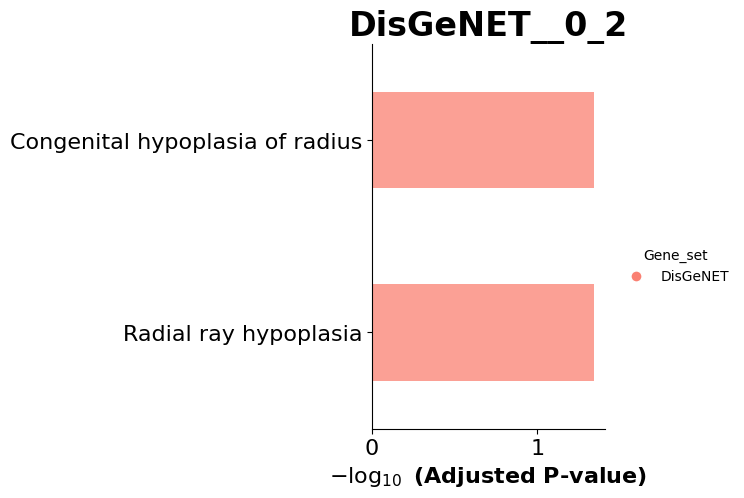

In [74]:
grouped = aggregate_network[aggregate_network.TF.isin(important_TF_0_2)].groupby('TF')
dataframe_0_2 = 0
for name, group in grouped:
    print(f"\nGroup: {name}")
    filtered_gene_set = list(group['Gene'].values)
    print(len(filtered_gene_set))
    try:
     filtered_gene_set = return_gene_name(filtered_gene_set)
    except:
        continue
    print(filtered_gene_set)
    databases = ['WikiPathway_2023_Human', 'Reactome_2022', 'OMIM_Disease', 'KEGG_2021_Human', 'GO_Molecular_Function_2023', 'GO_Cellular_Component_2023',
             'GO_Biological_Process_2023', 'DisGeNET', 'Allen_Brain_Atlas_10x_scRNA_2021']
    
    for i in databases:

        dataframe_tf_gene_0_2 = return_enriched_pathways(filtered_gene_set, adj_p_value = 0.05, gene_sets_databases =[i])
        
      
        try:
            plot_barplot(dataframe_tf_gene_0_2,size=10,top_term=5,fig_size=(3,5), title=str(i)+'_'+'_0_2')
        except:
            continue
        if isinstance(dataframe_0_2, pd.DataFrame):
            dataframe_0_2 = pd.concat([dataframe_0_2,dataframe_tf_gene_0_2])
        else:
            
            dataframe_0_2 = dataframe_tf_gene_0_2


Group: ENSG00000006194
1
['LINC02714']

Group: ENSG00000118058
189
['CELSR3', 'LRRC23', 'RTEL1-TNFRSF6B', 'YTHDC2', 'RSF1', 'CBLN4', 'NCKAP1', 'TSPAN32', 'MARK3', 'PIK3C3', 'PPIE', 'AKR1B1', 'AAMDC', 'EFNB1', 'RNF31', 'SEMA4G', 'NUBP2', 'SGSM3', 'EP300', 'AHSA1', 'DICER1', 'SNTA1', 'SLC32A1', 'METTL4', 'STAG2', 'SCML2', 'PRKD2', 'DDX49', 'GALK1', 'HSPA8', 'ARHGEF17', 'FBXO3', 'GLI1', 'RAB5B', 'SPSB2', 'RFX4', 'RNGTT', 'WASF1', 'CSPG5', 'NKTR', 'REEP6', 'PCSK4', 'OTX1', 'LAMTOR2', 'WLS', 'TTF2', 'HPCAL4', 'CTSD', 'VAMP8', 'SLF2', 'PLXDC2', 'PAIP2', 'RPL5', 'SNAI1', 'ARMC7', 'PRR12', 'PLAAT1', 'PSMG2', 'PLD2', 'NGDN', 'PRRG3', 'UBE2M', 'EDA2R', 'C1QL1', 'KHDC4', 'MED6', 'WNT2B', 'SPIRE1', 'TPGS2', 'MICAL1', 'COX5B', 'TBR1', 'ABI1', 'CFAP68', 'FAM149B1', 'SLC40A1', 'HERC5', 'COMMD4', 'RETREG3', 'PGGHG', 'SNX27', 'KANSL1L', 'EIF2B5', 'LYAR', 'OCIAD2', 'CRIP3', 'SLC18B1', 'IGFBP3', 'TMEM47', 'PLCB3', 'CWC15', 'TMEM218', 'VIPAS39', 'ACSL1', 'CETN3', 'DGKE', 'THY1', 'ROBO3', 'CCDC144CP', 'MO

/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(



Group: ENSG00000136870
114
['MAP3K9', 'ADAM22', 'METTL13', 'DCN', 'GABRA3', 'POLR2B', 'VPS13D', 'HEXB', 'FHIP1B', 'NAV3', 'NUP133', 'SEL1L', 'NUAK1', 'MRPL22', 'HACE1', 'CDV3', 'MRPS18A', 'CBX7', 'CCDC113', 'ZC2HC1A', 'PIP5K1B', 'NPM3', 'PNPO', 'MADD', 'BLTP3B', 'FIG4', 'EPM2A', 'SELENOK', 'ABCC5', 'ERRFI1', 'ETV3', 'ERI3', 'CIT', 'DDX39A', 'AMD1', 'FAM199X', 'SLC12A5', 'TMX4', 'LAMP5', 'BECN1', 'SAFB2', 'VCF1', 'CAMK1', 'SOX5', 'CTSL', 'RAPGEF5', 'ACTR2', 'GLCE', 'KANSL2', 'TCF12', 'GLYR1', 'NOB1', 'RPRD1A', 'IFNAR1', 'PIGK', 'ZNF697', 'ATP10D', 'SLC16A2', 'UGCG', 'BTBD10', 'ALDOA', 'PARP8', 'PTPRR', 'AK5', 'OTUD6B', 'ADK', 'FBRS', 'GPRASP2', 'CCAR2', 'CALM3', 'CHRNB2', 'C1orf115', 'DISC1', 'VCP', 'BORCS5', 'TMEM135', 'MS4A14', 'SLC27A4', 'ATP5MG', 'PRDX2', 'RBPJ', 'GFM1', 'UGP2', 'TM4SF1', 'SPDYE5', 'SIK2', 'LONRF2', 'PRNP', 'TLN2', 'TCEAL1', 'CLEC14A', 'PITPNB', 'YTHDF3', 'ZNF17', 'CCK', 'CENPP', 'IL1RAP', 'SLC35F1', 'SRGAP1', 'GMFB', 'ENTPD4', 'TRIM27', 'MZT1', 'SPDYE18', 'RPL36P6

/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.


Group: ENSG00000177125
254
['NDUFAB1', 'DHX33', 'PKD1', 'NUDCD3', 'PLEKHB1', 'GCLM', 'EHD2', 'B4GALT7', 'ZZZ3', 'CTPS2', 'ANO2', 'EPN3', 'AP5M1', 'PLEKHH1', 'SOAT1', 'ABCA7', 'SLC9A7', 'CACNB1', 'IP6K2', 'NUCB2', 'GBA2', 'RPS6KA2', 'SLC6A15', 'TRNT1', 'AP1M1', 'ADAM11', 'TM9SF3', 'ADCY2', 'MYH7B', 'MKNK1', 'ITGAE', 'MMP2', 'ASAP3', 'C3orf18', 'GANAB', 'COL9A3', 'TEKT2', 'NUP50', 'SIRT1', 'RPL3', 'SOS2', 'C14orf93', 'PYGB', 'POLI', 'ZNF500', 'FBXO31', 'STUB1', 'NUBP1', 'CDIPT', 'TJP1', 'CLPTM1', 'MED25', 'AKT2', 'TMEM205', 'GSK3A', 'RIC1', 'RECQL5', 'PMP22', 'WFS1', 'AADAT', 'PPM1H', 'CCNG1', 'RNF7', 'HYAL1', 'ABTB1', 'CSPG5', 'HEMK1', 'FAHD2A', 'TTC31', 'TRAK2', 'LAMTOR2', 'MIIP', 'MTARC2', 'DCLRE1B', 'HS1BP3', 'ACYP1', 'B4GALT4', 'CRY2', 'LPGAT1', 'SOX9', 'F10', 'CHTF18', 'TUBGCP6', 'ATF4', 'KNSTRN', 'ANAPC13', 'CDKN2D', 'NGDN', 'METTL26', 'NFATC1', 'SH3BP5', 'PDLIM4', 'ZSWIM4', 'ATP8A2', 'TPT1', 'BEX2', 'MACROD1', 'PSRC1', 'AP4B1', 'IL6ST', 'IL15RA', 'MRAP2', 'CCDC142', 'STX6', 'USP

/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.


Group: ENSG00000198633
31
['MRPS35', 'SDHA', 'GABRA4', 'MADD', 'FIG4', 'MEF2D', 'CCND2', 'SLC25A51', 'BTBD3', 'PPP2R1B', 'ZNF697', 'SYTL5', 'ARK2N', 'JAZF1', 'AIFM1', 'CALM3', 'CHRNB2', 'DRAXIN', 'ARL5A', 'TMEM183A', 'PHYHIP', 'TSPAN5', 'GRM5', 'TMEM70', 'KCTD12', 'ZBTB42', 'TNFAIP8L3', 'FAM3C', 'NOP9', 'RNU6ATAC39P', 'NEFL']


/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/home/anwer/.local/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.

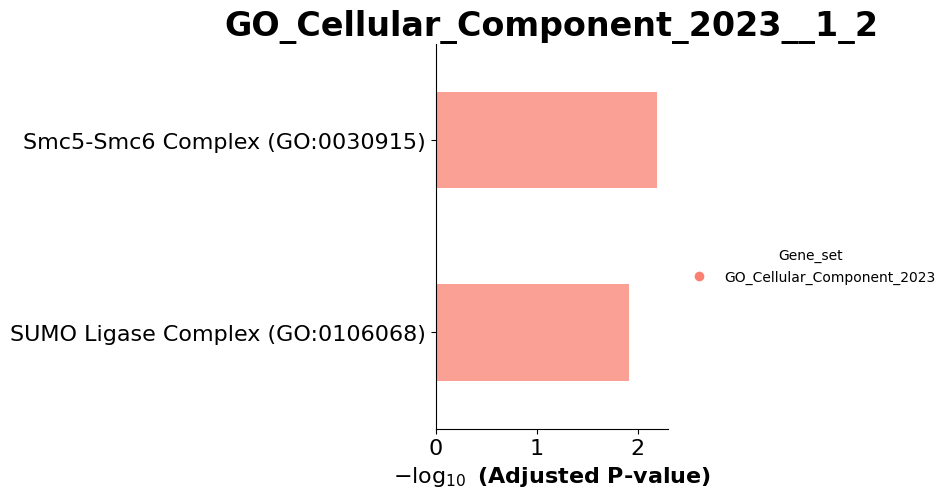

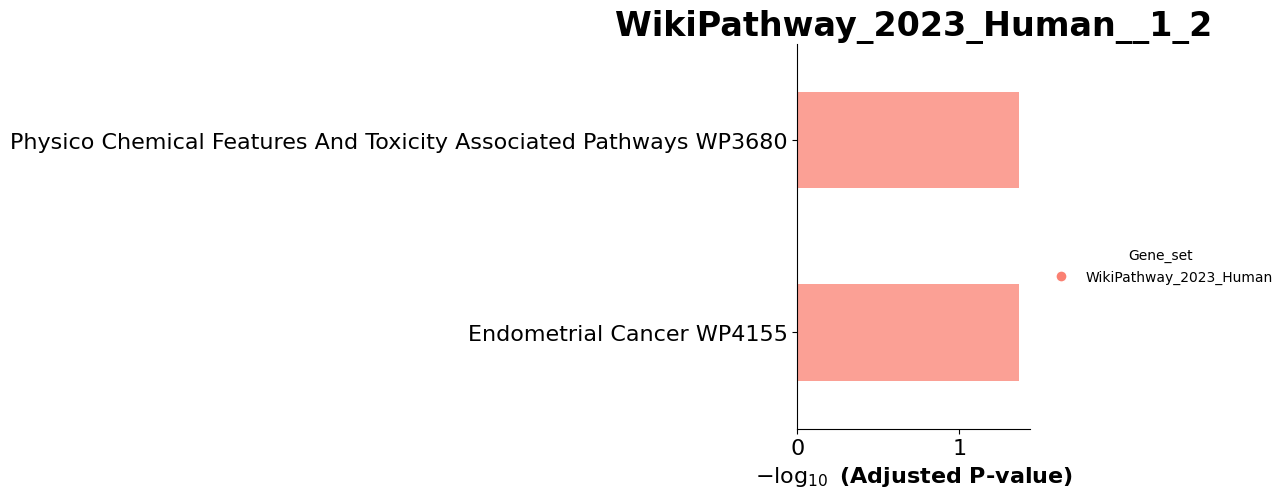

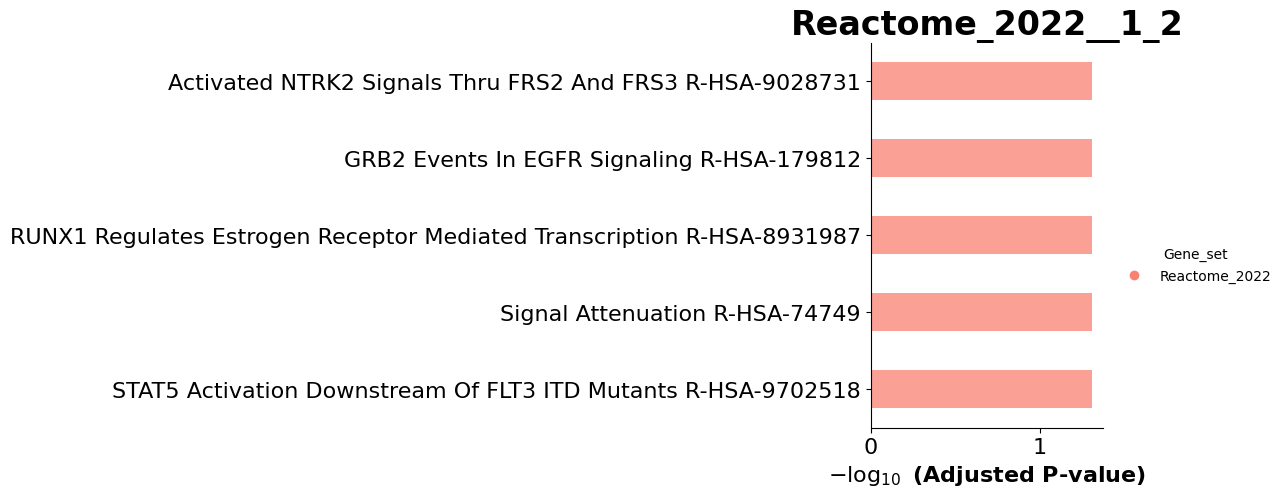

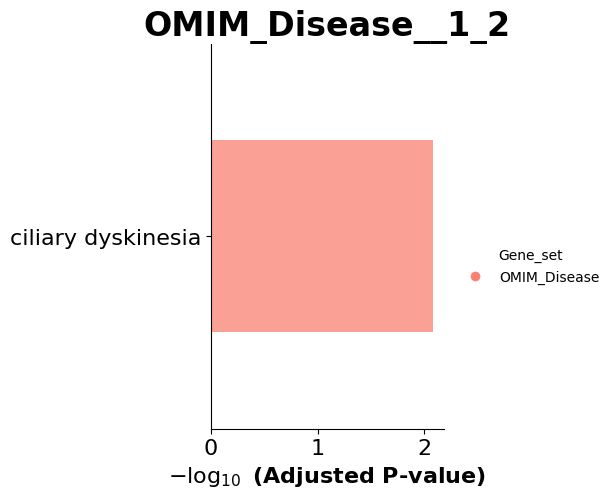

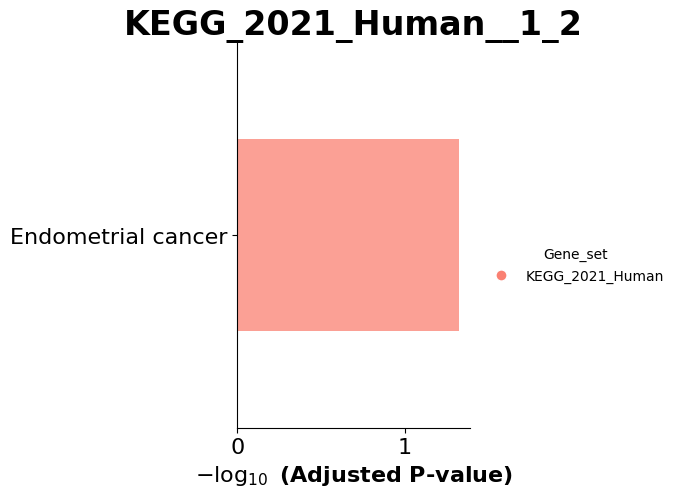

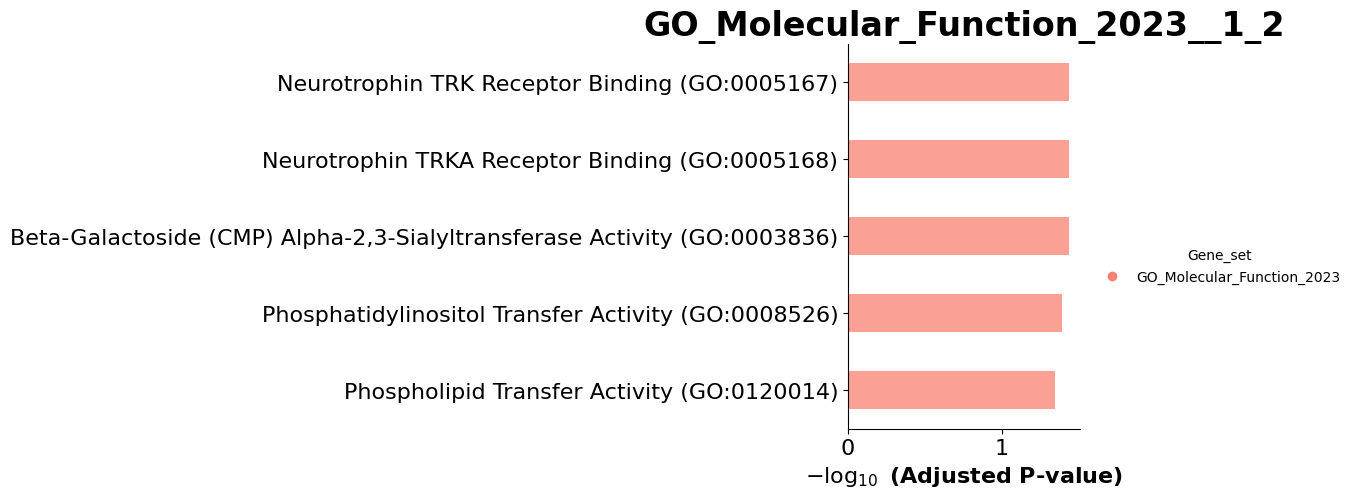

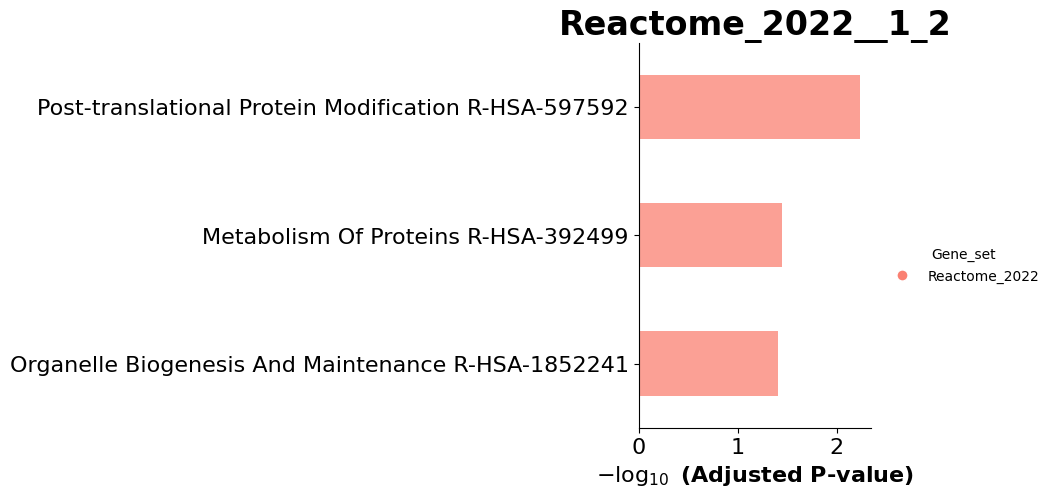

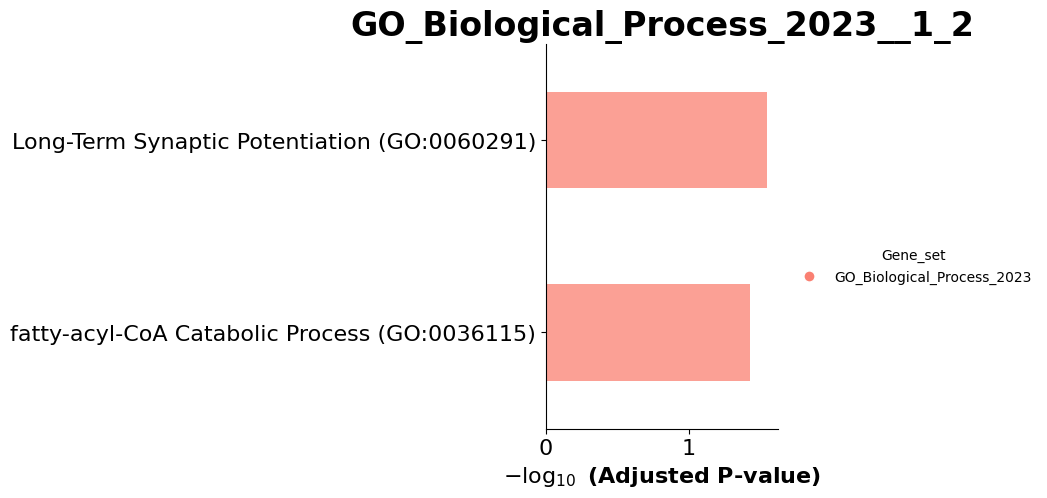

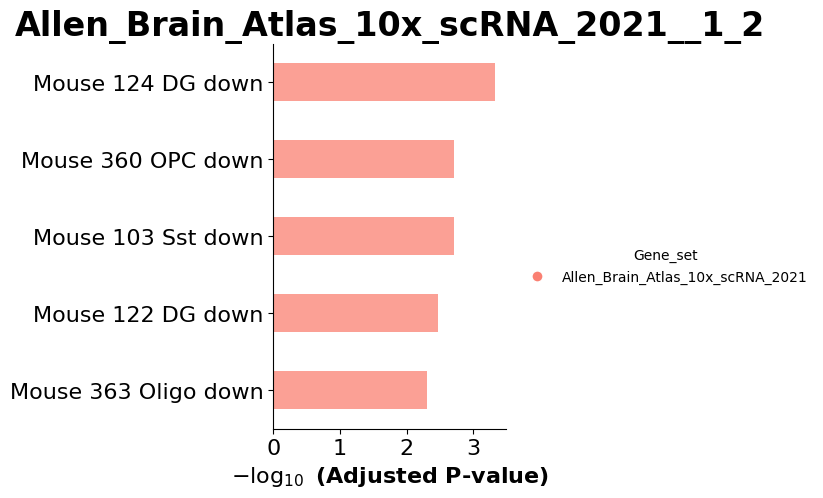

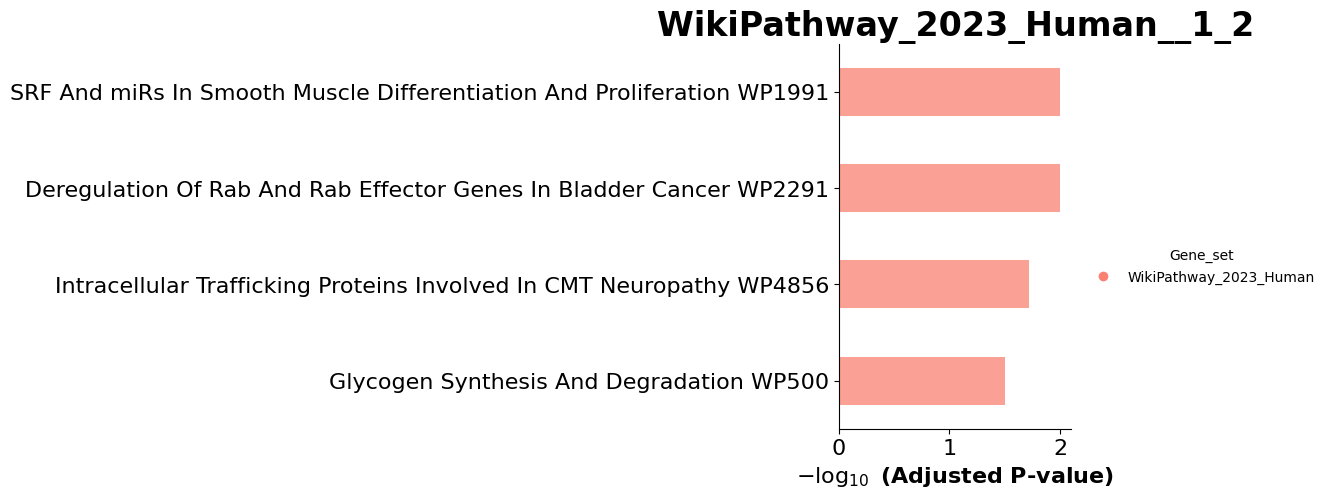

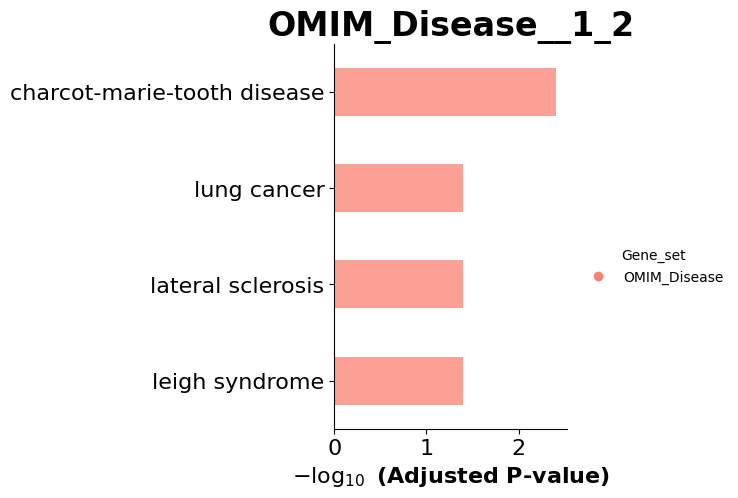

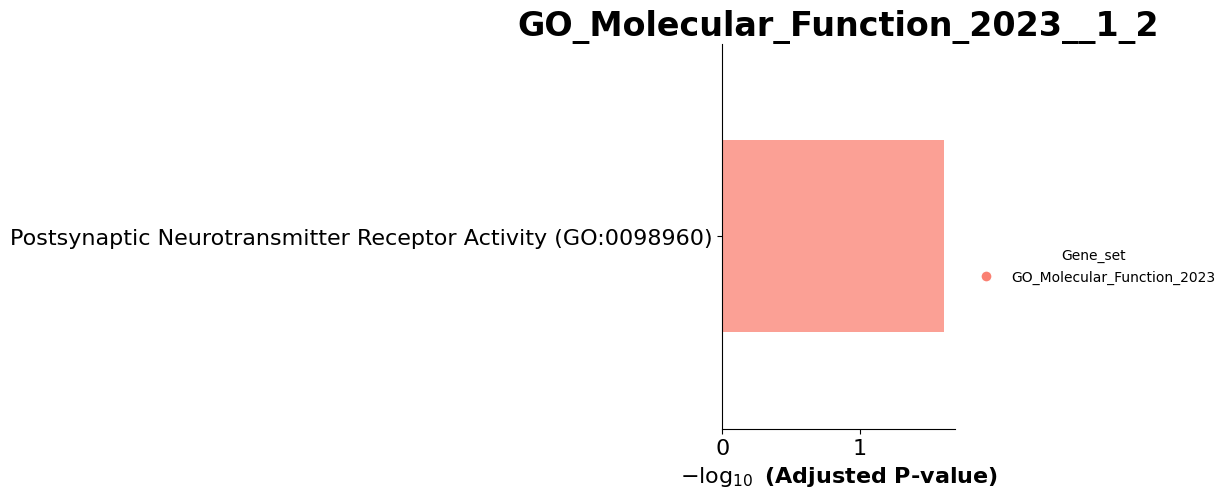

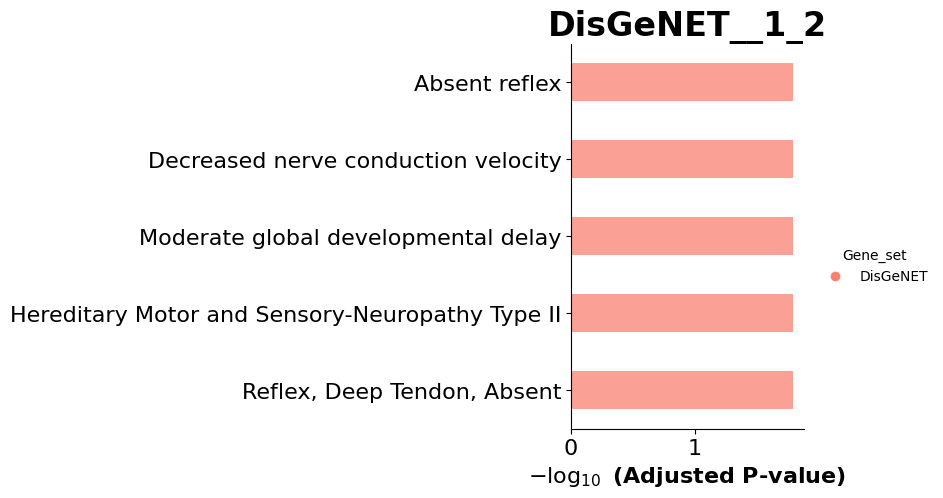

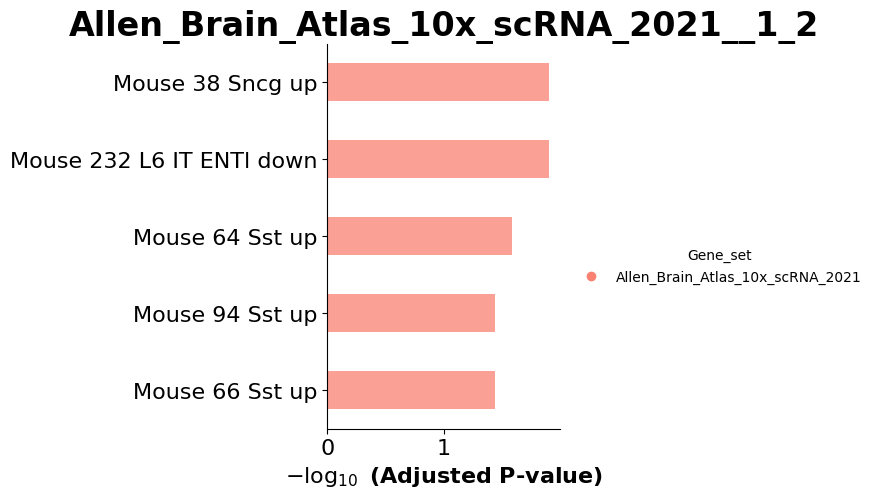

In [75]:
grouped = aggregate_network[aggregate_network.TF.isin(important_TF_1_2)].groupby('TF')
dataframe_1_2 = 0
for name, group in grouped:
    print(f"\nGroup: {name}")
    filtered_gene_set = list(group['Gene'].values)
    print(len(filtered_gene_set))
    try:
     filtered_gene_set = return_gene_name(filtered_gene_set)
    except:
        continue
    print(filtered_gene_set)
    databases = ['WikiPathway_2023_Human', 'Reactome_2022', 'OMIM_Disease', 'KEGG_2021_Human', 'GO_Molecular_Function_2023', 'GO_Cellular_Component_2023',
             'GO_Biological_Process_2023', 'DisGeNET', 'Allen_Brain_Atlas_10x_scRNA_2021']
    
    for i in databases:

        dataframe_tf_gene_1_2 = return_enriched_pathways(filtered_gene_set, adj_p_value = 0.05, gene_sets_databases =[i])
        
      
        try:
            plot_barplot(dataframe_tf_gene_1_2,size=10,top_term=5,fig_size=(3,5), title=str(i)+'_'+'_1_2')
        except:
            continue
        if isinstance(dataframe_1_2, pd.DataFrame):
            dataframe_1_2 = pd.concat([dataframe_1_2,dataframe_tf_gene_1_2])
        else:
            
            dataframe_1_2 = dataframe_tf_gene_1_2

# Differential Expression Analysis

In [76]:
import os
import pickle as pkl

import pandas as pd

from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats


ModuleNotFoundError: No module named 'pydeseq2'

In [ ]:
!mkdir ./output_files
!mkdir ./synthetic_example

In [ ]:
# Replace this with the path to directory where you would like results to be saved
OUTPUT_PATH = "./output_files/synthetic_example/"
os.makedirs(OUTPUT_PATH, exist_ok=True)  # Create path if it doesn't exist

In [ ]:
DATA_PATH = "https://raw.githubusercontent.com/owkin/PyDESeq2/main/datasets/synthetic/"

# %% Loading counts
counts_df = pd.read_csv(os.path.join(DATA_PATH, "test_counts.csv"), index_col=0)
print(counts_df)

In [ ]:
counts_df = counts_df.T
print(counts_df)

# %% Loading annotations
metadata = pd.read_csv(os.path.join(DATA_PATH, "test_metadata.csv"), index_col=0)
print(metadata)

In [ ]:
samples_to_keep = ~metadata.condition.isna()
counts_df = counts_df.loc[samples_to_keep]
metadata = metadata.loc[samples_to_keep]

In [ ]:
metadata

In [ ]:
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=counts_df,
    metadata=metadata,
    design_factors="condition",
    refit_cooks=True,
    inference=inference,
)

In [ ]:
dds.deseq2()

In [ ]:
print(dds)

In [ ]:
print(dds.varm["dispersions"])

# %%

print(dds.varm["LFC"])

In [ ]:
stat_res = DeseqStats(dds, inference=inference)


In [ ]:

stat_res.summary()


In [ ]:
stat_res.results_df.to_csv(os.path.join(OUTPUT_PATH, "results.csv"))

In [64]:
!pwd

/cephyr/NOBACKUP/groups/naiss2023-23-453/Gene_Regulatory_Network_ROSMAP/code/New_GRN_ROSMAP/code/community_detection_Tf
